In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Eric Meinhardt / emeinhardt@ucsd.edu**

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-steps" data-toc-modified-id="Preprocessing-steps-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preprocessing steps</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Outputs" data-toc-modified-id="Outputs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Outputs</a></span></li></ul></li><li><span><a href="#Imports-/-loading-data" data-toc-modified-id="Imports-/-loading-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports / loading data</a></span></li><li><span><a href="#Stitching-together-initial-imports" data-toc-modified-id="Stitching-together-initial-imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stitching together initial imports</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Speaker-/-topic-information" data-toc-modified-id="Speaker-/-topic-information-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Speaker / topic information</a></span></li><li><span><a href="#Annotation-relation-creation" data-toc-modified-id="Annotation-relation-creation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Annotation relation creation</a></span><ul class="toc-item"><li><span><a href="#Turn-nodes" data-toc-modified-id="Turn-nodes-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Turn nodes</a></span></li><li><span><a href="#Syntax-nodes" data-toc-modified-id="Syntax-nodes-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Syntax nodes</a></span></li><li><span><a href="#Terminal-nodes" data-toc-modified-id="Terminal-nodes-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Terminal nodes</a></span></li><li><span><a href="#Phonword-nodes" data-toc-modified-id="Phonword-nodes-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Phonword nodes</a></span></li><li><span><a href="#Syllable-nodes" data-toc-modified-id="Syllable-nodes-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Syllable nodes</a></span></li><li><span><a href="#Phone-nodes" data-toc-modified-id="Phone-nodes-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Phone nodes</a></span></li><li><span><a href="#Disfluency-nodes" data-toc-modified-id="Disfluency-nodes-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Disfluency nodes</a></span></li></ul></li><li><span><a href="#Altogether..." data-toc-modified-id="Altogether...-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Altogether...</a></span></li></ul></li><li><span><a href="#Making-initial-word-and-utterance-relations" data-toc-modified-id="Making-initial-word-and-utterance-relations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Making initial word and utterance relations</a></span><ul class="toc-item"><li><span><a href="#An-initial-wordform-(phonword)-relation" data-toc-modified-id="An-initial-wordform-(phonword)-relation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>An initial wordform (<code>phonword</code>) relation</a></span><ul class="toc-item"><li><span><a href="#Link-annotation-of-phonwords-and-immediately-related-layers" data-toc-modified-id="Link-annotation-of-phonwords-and-immediately-related-layers-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Link annotation of <code>phonwords</code> and immediately related layers</a></span></li><li><span><a href="#Mapping-phonetic-symbols-to-IPA" data-toc-modified-id="Mapping-phonetic-symbols-to-IPA-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Mapping phonetic symbols to IPA</a></span></li><li><span><a href="#Marking-'pauses'-/-non-speech-phonwords" data-toc-modified-id="Marking-'pauses'-/-non-speech-phonwords-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Marking 'pauses' / non-speech <code>phonword</code>s</a></span></li><li><span><a href="#Marking-disfluent/interrupted-phonwords" data-toc-modified-id="Marking-disfluent/interrupted-phonwords-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Marking disfluent/interrupted <code>phonword</code>s</a></span></li><li><span><a href="#Marking-filled-pauses" data-toc-modified-id="Marking-filled-pauses-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Marking filled pauses</a></span></li><li><span><a href="#Marking-wordforms-with-a-clitic" data-toc-modified-id="Marking-wordforms-with-a-clitic-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Marking wordforms with a clitic</a></span></li><li><span><a href="#Cleaning-up-the-orthographic-representation" data-toc-modified-id="Cleaning-up-the-orthographic-representation-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Cleaning up the orthographic representation</a></span></li><li><span><a href="#Marking-unks" data-toc-modified-id="Marking-unks-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Marking <code>unk</code>s</a></span></li><li><span><a href="#Marking-content-words" data-toc-modified-id="Marking-content-words-4.1.9"><span class="toc-item-num">4.1.9&nbsp;&nbsp;</span>Marking content words</a></span></li><li><span><a href="#Lookup-for-annotated-phonword-relations" data-toc-modified-id="Lookup-for-annotated-phonword-relations-4.1.10"><span class="toc-item-num">4.1.10&nbsp;&nbsp;</span>Lookup for annotated <code>phonword</code> relations</a></span></li></ul></li><li><span><a href="#Utterance-segmentation" data-toc-modified-id="Utterance-segmentation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Utterance segmentation</a></span><ul class="toc-item"><li><span><a href="#Link-annotation-of-turn-with-a-linear-sequence-of-terminals-and/or-phonwords" data-toc-modified-id="Link-annotation-of-turn-with-a-linear-sequence-of-terminals-and/or-phonwords-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Link annotation of <code>turn</code> with a linear sequence of <code>terminal</code>s and/or <code>phonword</code>s</a></span></li><li><span><a href="#Filtering-turns-with-missing-phonword-alignments" data-toc-modified-id="Filtering-turns-with-missing-phonword-alignments-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Filtering <code>turn</code>s with missing <code>phonword</code> alignments</a></span></li><li><span><a href="#Filtering-turns-with-no-phonwords-at-all" data-toc-modified-id="Filtering-turns-with-no-phonwords-at-all-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Filtering <code>turn</code>s with no <code>phonword</code>s at all</a></span></li></ul></li><li><span><a href="#An-initial-utterance-relation" data-toc-modified-id="An-initial-utterance-relation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>An initial utterance relation</a></span><ul class="toc-item"><li><span><a href="#Add-speaker-+-topic-information-to-turn-relations" data-toc-modified-id="Add-speaker-+-topic-information-to-turn-relations-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Add speaker + topic information to turn relations</a></span></li><li><span><a href="#Add-utterance-segmentation-information-to-turn-relations" data-toc-modified-id="Add-utterance-segmentation-information-to-turn-relations-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Add utterance segmentation information to turn relations</a></span></li><li><span><a href="#Split-turn-relations-into-utterance-relations-w/-unique-IDs" data-toc-modified-id="Split-turn-relations-into-utterance-relations-w/-unique-IDs-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Split turn relations into utterance relations w/ unique IDs</a></span></li></ul></li></ul></li><li><span><a href="#Gathering-vocabulary,-utterance,-speaker-(speech-rate),-and-word-type-information" data-toc-modified-id="Gathering-vocabulary,-utterance,-speaker-(speech-rate),-and-word-type-information-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Gathering vocabulary, utterance, speaker (speech rate), and word type information</a></span><ul class="toc-item"><li><span><a href="#Vocabulary" data-toc-modified-id="Vocabulary-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Vocabulary</a></span><ul class="toc-item"><li><span><a href="#Comparison-with-Fisher..." data-toc-modified-id="Comparison-with-Fisher...-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Comparison with Fisher...</a></span></li></ul></li><li><span><a href="#Utterance-durations" data-toc-modified-id="Utterance-durations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Utterance durations</a></span></li><li><span><a href="#Speaker-speech-rates" data-toc-modified-id="Speaker-speech-rates-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Speaker speech rates</a></span></li><li><span><a href="#Word-type-duration-distributions" data-toc-modified-id="Word-type-duration-distributions-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Word type duration distributions</a></span></li><li><span><a href="#Add-extreme-speech-rate-annotation-to-utterance-relations-and-extreme-word-duration-annotation-to-word-relations" data-toc-modified-id="Add-extreme-speech-rate-annotation-to-utterance-relations-and-extreme-word-duration-annotation-to-word-relations-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Add extreme speech rate annotation to utterance relations and extreme word duration annotation to word relations</a></span></li></ul></li><li><span><a href="#Adding-utterance(-context)-information-and-exclusion-criteria-information-to-the-word-relation" data-toc-modified-id="Adding-utterance(-context)-information-and-exclusion-criteria-information-to-the-word-relation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Adding utterance(-context) information and exclusion criteria information to the word relation</a></span><ul class="toc-item"><li><span><a href="#n-gram-contexts" data-toc-modified-id="n-gram-contexts-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>n-gram contexts</a></span></li><li><span><a href="#Exclusion-criteria" data-toc-modified-id="Exclusion-criteria-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Exclusion criteria</a></span></li></ul></li><li><span><a href="#Exporting-to-file..." data-toc-modified-id="Exporting-to-file...-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exporting to file...</a></span></li></ul></div>

# Overview

The main goal of this notebook is to produce a version of the NXT Switchboard corpus ('NXT Switchboard' henceforth) whose vocabulary has been normalized with respect to the Fisher corpus. The motivation for doing this is applying a language model trained on (a slightly processed version of) the Fisher corpus to NXT Switchboard.

The second goal of this notebook is to annotate word tokens and utterance tokens with exclusion criteria for a model of reduction.

## Preprocessing steps

In the service of the main goal, 
 1. Interrupted or broken-off wordforms - wordforms that speakers didn't finish production of or that they resumed production somewhere in the middle of have been replaced with `<rem>`.
 2. Words where transcribers were indecisive between multiple transcriptions have been replaced with `<rem>`.
 3. Non-speech noises (e.g. `[laughter]` or `[silence]`) are removed. Note that 'utterances' that in the original contained only things like this are not included in any post-processed data meant to be input to a language model.
 4. Words that transcribers weren't sure of(?) or that seemed like (whole words but) production errors or new coinages are apparently transcribed in curly braces. All such curly braces have been removed.
 5. Some orthographic tokens appear in the corpus with an underscore, e.g.
  - `{'<b_aside>', '<e_aside>', 'about_1', 'because_1', 'depends_1', 'especially_1', 'okay_1', "them's_1", 'them_1', "them_1's"}`
  - `_aside` tokens have been removed altogether and the trailing `_1` has been removed from all others.
 6. All characters are lower-cased.

In [2]:
import re

from collections import OrderedDict

from more_itertools import replace

from funcy import *

In [3]:
# unk = '<unk>'
unk = '<rem>'

In [4]:
interrupted_word_pattern = ".*-$"
resumed_word_pattern = "^-.*"

def isInterrupted(wordform):
    return re.match(interrupted_word_pattern, wordform) is not None

def isResumed(wordform):
    return re.match(resumed_word_pattern, wordform) is not None

def isBroken(wordform):
    return isInterrupted(wordform) or isResumed(wordform)

def hasBrokenWords(speech):
    speech_word_seq = speech.split(' ')
    broken_words = lfilter(isBroken, speech_word_seq)
    return len(broken_words) > 0

def remove_broken_words(speech, insertUnk=True):
    if insertUnk:
        replacement = unk
    else:
        replacement = ""
        
    speech_word_seq = speech.split(' ')
    speech_word_seq_fixed = str_join(' ', replace(speech_word_seq, isBroken, (replacement,)))
    speech_fixed = str_join(' ', [w for w in speech_word_seq_fixed.split(' ') if len(w) > 0])
    return speech_fixed

#FIXME examples
remove_broken_words("we[ll]- well in our area we just introduced the um citywide")
remove_broken_words('[noise] -[o]kay')
remove_broken_words("o[kay]- [noise] -[o]kay well i think this is going to probably be the most difficult topic that i've discussed [laughter-so] [laughter-far] yes well have you returned anything lately")
remove_broken_words("well i just buy those California peeled -[to]ma[toes]- tomatoes")

'<rem> well in our area we just introduced the um citywide'

'[noise] <rem>'

"<rem> [noise] <rem> well i think this is going to probably be the most difficult topic that i've discussed [laughter-so] [laughter-far] yes well have you returned anything lately"

'well i just buy those California peeled <rem> tomatoes'

In [5]:
def hasSquareBrackets(orthword):
    return '[' in orthword or ']' in orthword

def isSquareBracketed(w):
    return w[0] == '[' and w[-1] == ']' if len(w) > 0 else False

def indecisiveOrthographicTranscription(w):
    return isSquareBracketed(w) and '/' in w

def remove_indecisive_transcriptions(speech, insertUnk=True):
    if insertUnk:
        replacement = unk
    else:
        replacement = ""
    
    speech_word_seq = speech.split(' ')
    speech_word_seq_fixed = str_join(' ', replace(speech_word_seq, indecisiveOrthographicTranscription, (replacement,)))
    speech_fixed = str_join(' ', [w for w in speech_word_seq_fixed.split(' ') if len(w) > 0])
    return speech_fixed

#FIXME examples

In [6]:
# def hasSquareBrackets(orthword):
#     return '[' in orthword or ']' in orthword

def isSquareBracketed(w):
    return w[0] == '[' and w[-1] == ']' if len(w) > 0 else False

def remove_non_speech(speech):
    speech_filtered_words = [w for w in speech.split(' ') if len(w) > 0 and w[0] != '[' and w[-1] != ']']
#     speech_filtered_words = [w for w in speech.split(' ') if not hasSquareBrackets(w)]
    speech_out = str_join(' ', speech_filtered_words)
    speech_out = speech_out.rstrip()
    return speech_out

remove_non_speech('[noise] -[o]kay')
remove_non_speech("o[kay]- [noise] -[o]kay well i think this is going to probably be the most difficult topic that i've discussed [laughter-so] [laughter-far] yes well have you returned anything lately")
remove_non_speech("n[ot]- not big[oted]- or very m[ore]- m[ore]- you know more in the twentieth century [laughter-now] let's say or or very [vocalized-noise] {unbigoted} and they even have added uh this uh other")

'-[o]kay'

"o[kay]- -[o]kay well i think this is going to probably be the most difficult topic that i've discussed yes well have you returned anything lately"

"n[ot]- not big[oted]- or very m[ore]- m[ore]- you know more in the twentieth century let's say or or very {unbigoted} and they even have added uh this uh other"

In [7]:
def hasCurlyBraces(wordform):
    return '{' in wordform or '}' in wordform

def isCurlyBraced(wordform):
    if len(wordform) == 0:
        return False
    return wordform[0] == '{' and wordform[-1] == '}'

def removeCurlyBraces(wordform):
    if not isCurlyBraced(wordform):
        return wordform
    return wordform[1:-1]

def remove_curly_braces(speech):
    speech_word_seq = speech.split(' ')
    speech_word_seq_fixed = str_join(' ', lmap(removeCurlyBraces, speech_word_seq))
    speech_fixed = str_join(' ', [w for w in speech_word_seq_fixed.split(' ') if len(w) > 0])
    return speech_fixed

remove_curly_braces("n[ot]- not big[oted]- or very m[ore]- m[ore]- you know more in the twentieth century [laughter-now] let's say or or very [vocalized-noise] {unbigoted} and they even have added uh this uh other")
remove_curly_braces("yeah yes i i know there's a long scientific name but it's like {polytechnochloride} and all that fun stuff um i like")
remove_curly_braces("well it it it'll it'll catch on pretty soon i'll i'll i'll {betcha} i i have a sixteen year old almost sixteen year old Golden Retriever and she's gone the other way because she's so old she doesn't have much control")
remove_curly_braces("that works all right th[ey]- they don't uh w[ant]- want the mothers to be with the little {fishies}")

"n[ot]- not big[oted]- or very m[ore]- m[ore]- you know more in the twentieth century [laughter-now] let's say or or very [vocalized-noise] unbigoted and they even have added uh this uh other"

"yeah yes i i know there's a long scientific name but it's like polytechnochloride and all that fun stuff um i like"

"well it it it'll it'll catch on pretty soon i'll i'll i'll betcha i i have a sixteen year old almost sixteen year old Golden Retriever and she's gone the other way because she's so old she doesn't have much control"

"that works all right th[ey]- they don't uh w[ant]- want the mothers to be with the little fishies"

In [8]:
def hasUnderscore(wordform):
    return '_' in wordform

def fixUnderscore(wordform):
    if not hasUnderscore(wordform):
        return wordform
    fixed = wordform.replace('_1', '')
    return fixed

def fix_underscores(speech):
    speech_word_seq = speech.split(' ')
    speech_word_seq_filtered = [w for w in speech_word_seq if w != '<b_aside>' and w != '<e_aside>']
    speech_word_seq_fixed = str_join(' ', list(map(fixUnderscore, speech_word_seq_filtered)))
    speech_fixed = str_join(' ', [w for w in speech_word_seq_fixed.split(' ') if len(w) > 0])
    return speech_fixed

fix_underscores("because_1 yes dogs need training but cats usually don't even need any training seem like they automatically go to their little litter box they think yeah")
fix_underscores('to feed me or to pick me up and love me <b_aside> yes you sweet thing <e_aside>')

"because yes dogs need training but cats usually don't even need any training seem like they automatically go to their little litter box they think yeah"

'to feed me or to pick me up and love me yes you sweet thing'

In [9]:
def lowercase(speech):
    return speech.lower()

In [10]:
# process = compose(lowercase, fix_underscores, remove_curly_braces, remove_non_speech, remove_indecisive_transcriptions, remove_broken_words)

#ugggggly AF but works with joblib, unlike funcy's compose
def process(speech):
    return lowercase(fix_underscores(remove_curly_braces(remove_non_speech(remove_indecisive_transcriptions(remove_broken_words(speech))))))

process("we[ll]- well in our area we just introduced the um citywide")
process('[noise] -[o]kay')
process("o[kay]- [noise] -[o]kay well i think this is going to probably be the most difficult topic that i've discussed [laughter-so] [laughter-far] yes well have you returned anything lately")
process("well i just buy those California peeled -[to]ma[toes]- tomatoes")
process("n[ot]- not big[oted]- or very m[ore]- m[ore]- you know more in the twentieth century [laughter-now] let's say or or very [vocalized-noise] {unbigoted} and they even have added uh this uh other")
process("yeah yes i i know there's a long scientific name but it's like {polytechnochloride} and all that fun stuff um i like")
process("well it it it'll it'll catch on pretty soon i'll i'll i'll {betcha} i i have a sixteen year old almost sixteen year old Golden Retriever and she's gone the other way because she's so old she doesn't have much control")
process("that works all right th[ey]- they don't uh w[ant]- want the mothers to be with the little {fishies}")
process("because_1 yes dogs need training but cats usually don't even need any training seem like they automatically go to their little litter box they think yeah")
process('to feed me or to pick me up and love me <b_aside> yes you sweet thing <e_aside>')

'<rem> well in our area we just introduced the um citywide'

'<rem>'

"<rem> <rem> well i think this is going to probably be the most difficult topic that i've discussed yes well have you returned anything lately"

'well i just buy those california peeled <rem> tomatoes'

"<rem> not <rem> or very <rem> <rem> you know more in the twentieth century let's say or or very unbigoted and they even have added uh this uh other"

"yeah yes i i know there's a long scientific name but it's like polytechnochloride and all that fun stuff um i like"

"well it it it'll it'll catch on pretty soon i'll i'll i'll betcha i i have a sixteen year old almost sixteen year old golden retriever and she's gone the other way because she's so old she doesn't have much control"

"that works all right <rem> they don't uh <rem> want the mothers to be with the little fishies"

"because yes dogs need training but cats usually don't even need any training seem like they automatically go to their little litter box they think yeah"

'to feed me or to pick me up and love me yes you sweet thing'

## Dependencies
 - `more_itertools`, `funcy`, `joblib` and Unix shell command cell/line magics are used throughout, though none have essential functionality that couldn't relatively easily be replaced by something else if necessary.

## Outputs

If run successfully, this notebook will create nine files as outputs:
 1. A .json file containing a list of objects (Python dictionaries), where each object is a finitary relation describing an utterance (and associated metadata) in the NXT Switchboard corpus.
 2. A .json file containing a list of objects (Python dictionaries), where each object is a finitary relation describing a wordform token (and associated metadata) in the NXT Switchboard corpus.
 3. A .txt file containing one utterance from NXT Switchboard per line.
 4. A .txt file containing the vocabulary (one wordform per line) of the previous file.
 5. A .json file containing a further-annotated version of the word relation (#2 above) for other research purposes.
 6. A set of .txt files containing the unigram, bigram, trigram, and fourgram contexts that occur in file #3 from both the left and right sides.

# Imports / loading data

In [11]:
repo_dir = '/mnt/cube/home/AD/emeinhar/switchboard-lm'

In [12]:
import os
import csv
import json
import codecs

In [13]:
def exportDict(fn, d):
    with codecs.open(fn, 'w', encoding='utf-8') as f:
        json.dump(d, f, ensure_ascii = False, indent = 4)
        
def importDict(fn):
    with open(fn, encoding='utf-8') as data_file:
        d_in = json.loads(data_file.read())
    return d_in

In [14]:
import xml.etree.ElementTree as ET

In [15]:
from tqdm import tqdm

from itertools import filterfalse, chain

In [16]:
from collections import Counter

In [17]:
os.getcwd()

switchboard_lm_dir = '/mnt/cube/home/AD/emeinhar/switchboard-lm'

'/mnt/cube/home/AD/emeinhar/switchboard-lm'

In [18]:
from joblib import Parallel, delayed

J = -1
BACKEND = 'multiprocessing'
# BACKEND = 'loky'
V = 10
PREFER = 'processes'
# PREFER = 'threads'

def par(gen_expr):
    return Parallel(n_jobs=J, backend=BACKEND, verbose=V, prefer=PREFER)(gen_expr)

In [19]:
from copy import deepcopy

In [20]:
import pandas as pd
from plotnine import *

# Stitching together initial imports

## Background

The NXT Switchboard corpus has an enormous amount of annotation on it. See
 - http://groups.inf.ed.ac.uk/switchboard/structure.html
 - http://groups.inf.ed.ac.uk/switchboard/datasum.html
 - http://groups.inf.ed.ac.uk/switchboard/coverage.html
 - .../switchboard_NXT_annotations/nxt_switchboard_ann/xml/swbd-metadata.xml

for more on the structure of the annotations.


We want (minimally, at this point) to relate
 - each `conversation id` in the corpus
 - with the set of `turn`s by each `speaker` in the associated conversation

We also want to associate 
 - each `turn` 
 - with `start`/`stop` times and a sequence of `terminal`s (by way of `NT`s)
 
and
 - each (`word`) `terminal`
 - with a `POS` tag (and maybe `start`/`stop` times) and `phonword`s.

and
 - each `phonword`
 - with `start`/`stop` times and a sequence of `phones`
 
and
 - each `phone`
 - with `start`/`stop` times

In [21]:
nxt_dir = "/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann"

In [22]:
os.chdir(nxt_dir)
os.listdir()

['docs',
 'lib',
 'xml',
 'index.html',
 'nxt_1.4.3.tgz',
 'switchboard-guis.bat',
 'switchboard-guis.sh']

As you can see below, each layer of corpus annotations sits inside its own folder, with each conversation and speaker per conversation getting its own `.xml` file.

In [23]:
os.chdir(nxt_dir + '/' + 'xml')
os.listdir()
os.listdir('phonwords')[:10]

['accent',
 'active',
 'breaks',
 'coreference',
 'corpus-resources',
 'dialAct',
 'disfluency',
 'kontrast',
 'markable',
 'movement',
 'phones',
 'phonwords',
 'phrase',
 'prosnotes',
 'syllables',
 'syntax',
 'terminals',
 'turns',
 'swbd-metadata.xml',
 'swconfig.xml']

['sw2065.B.phonwords.xml',
 'sw2005.A.phonwords.xml',
 'sw2067.A.phonwords.xml',
 'sw2005.B.phonwords.xml',
 'sw2067.B.phonwords.xml',
 'sw2008.A.phonwords.xml',
 'sw2072.A.phonwords.xml',
 'sw2008.B.phonwords.xml',
 'sw2073.A.phonwords.xml',
 'sw2010.A.phonwords.xml']

In [24]:
def extract_conversation_IDs_from_filename(fn):
    return fn[2:6]

def conversations_covered_in_fp(fp):
    return set(map(extract_conversation_IDs_from_filename,
                   os.listdir(fp)))

def getFileInfo(conversation_id, speaker, annotation, justFileName=True):
    assert speaker in {'A', 'B'}, 'Speaker must be either "A" or "B", got {0}'.format(speaker)
    assert annotation in {'turns', 'phonwords', 'phones', 'syllables', 'syntax', 'terminals', 'disfluency'}, "Annotation must be one of 'turns', 'phonwords', 'phones','syllables', or 'disfluency', got {0}".format(annotation)
    
    annotation_dir = nxt_dir + '/xml/' + annotation
    covered_conversations = conversations_covered_in_fp(annotation_dir)
    assert conversation_id in covered_conversations, 'Conversation id {0} does not have annotations for {1}'.format(conversation_id, annotation)
    
    fn = 'sw' + conversation_id + '.' + speaker + '.' + annotation + '.xml'
    
    info = (annotation_dir, fn)
    assert os.path.isfile(os.path.join(*info)), 'Filename\n\t{0}\n does not exist in\n\t{1}'.format(fn, annotation_dir)
    
    if justFileName:
        return fn
    return annotation_dir, fn

In [25]:
getFileInfo('2079', 'B', 'turns')
# getFileInfo('2001', 'A', 'kontrast')
# os.path.join(*getFileInfo('2079', 'B', 'turns'))
# os.path.isfile( os.path.join(*getFileInfo('2079', 'B', 'turns')) )

'sw2079.B.turns.xml'

In [26]:
nite = '{http://nite.sourceforge.net/}'
nite_id = nite + 'id'
nite_start = nite + 'start'
nite_end = nite + 'end'
nite_child = nite + 'child'
nite_pointer = nite + 'pointer'

## Speaker / topic information

In [27]:
os.chdir(os.path.join(nxt_dir, 'xml', 'corpus-resources'))
os.listdir()

['dialogues.xml', 'speakers.xml', 'topics.xml']

In [28]:
%cat -n 'dialogues.xml' | head -25

     1	<?xml version="1.0" encoding="utf-8"?>
     2	<nite:dialogue_stream xmlns:nite="http://nite.sourceforge.net/" nite:id="swbd-dialogue">
     3	<dialogue nite:id="dial2005" swbdid="2005">
     4	  <nite:pointer href="topics.xml#id(top305)" role="topic"/>
     5	  <nite:pointer href="speakers.xml#id(spkr1169)" role="A"/>
     6	  <nite:pointer href="speakers.xml#id(spkr1133)" role="B"/>
     7	</dialogue>
     8	<dialogue nite:id="dial2008" swbdid="2008">
     9	  <nite:pointer href="topics.xml#id(top303)" role="topic"/>
    10	  <nite:pointer href="speakers.xml#id(spkr1176)" role="A"/>
    11	  <nite:pointer href="speakers.xml#id(spkr1057)" role="B"/>
    12	</dialogue>
    13	<dialogue nite:id="dial2010" swbdid="2010">
    14	  <nite:pointer href="topics.xml#id(top348)" role="topic"/>
    15	  <nite:pointer href="speakers.xml#id(spkr1027)" role="A"/>
    16	  <nite:pointer href="speakers.xml#id(spkr1039)" role="B"/>
    17	</dialogue>
    18	<dialogue nite:id="dial2012" swbdid="2

In [29]:
%cat -n 'speakers.xml' | head -25

     1	<?xml version="1.0" encoding="utf-8"?>
     2	<nite:speaker_stream xmlns:nite="http://nite.sourceforge.net/" nite:id="swbd-speaker">
     3	  <speaker nite:id="spkr1000" sex="F" dob="1954" dialect="SOUTH"/>
     4	  <speaker nite:id="spkr1001" sex="M" dob="1940" dialect="WESTERN"/>
     5	  <speaker nite:id="spkr1002" sex="F" dob="1963" dialect="SOUTHERN"/>
     6	  <speaker nite:id="spkr1004" sex="F" dob="1958" dialect="NORTHERN"/>
     7	  <speaker nite:id="spkr1005" sex="F" dob="1956" dialect="WESTERN"/>
     8	  <speaker nite:id="spkr1008" sex="F" dob="1939" dialect="MIXED"/>
     9	  <speaker nite:id="spkr1010" sex="M" dob="1932" dialect="NEW"/>
    10	  <speaker nite:id="spkr1011" sex="F" dob="1964" dialect="SOUTH"/>
    11	  <speaker nite:id="spkr1013" sex="F" dob="1957" dialect="SOUTH"/>
    12	  <speaker nite:id="spkr1014" sex="F" dob="1947" dialect="MIXED"/>
    13	  <speaker nite:id="spkr1015" sex="F" dob="1967" dialect="NEW"/>
    14	  <speaker nite:id="spkr1016" sex

In [30]:
%cat -n 'topics.xml' | head -25

     1	<?xml version="1.0" encoding="utf-8"?>
     2	<nite:topic_stream xmlns:nite="http://nite.sourceforge.net/" nite:id="swbd-topic">
     3	<topic nite:id="top301"
     4	    abstract="AIDS"
     5	    question="PLEASE DISCUSS FUNDING FOR AIDS RESEARCH.  SHOULD THE US SPEND MORE, LESS, OR ABOUT THE SAME AMOUNT OF MONEY IT CURRENTLY IS?  WHY DO YOU THINK SO?"/>
     6	<topic nite:id="top302"
     7	    abstract="AIR POLLUTION"
     8	    question="PLEASE DISCUSS AIR POLLUTION.  FIND OUT WHAT SUBSTANCES THE OTHER CALLER THINKS CONTRIBUTE THE MOST TO AIR POLLUTION TODAY.  WHAT CAN INDIVIDUALS OR SOCIETY DO TO IMPROVE AIR QUALITY?"/>
     9	<topic nite:id="top303"
    10	    abstract="CLOTHING AND DRESS"
    11	    question="THE TOPIC IS CLOTHING.  PLEASE FIND OUT HOW THE OTHER CALLER TYPICALLY DRESSES FOR WORK.  HOW MUCH VARIATION IS THERE FROM DAY TO DAY?  HOW MUCH VARIATION IS THERE FROM SEASON TO SEASON?"/>
    12	<topic nite:id="top304"
    13	    abstract="CREDIT CARD USE"
    14	

In [31]:
def speaker_node_to_rel(sn):
    rel = {'id':sn.attrib[nite_id],
           'sex':sn.attrib['sex'],
           'dob':int(sn.attrib['dob']),
           'dialect':sn.attrib['dialect']}
    return rel

def find_speaker_rel(speaker_id):
    matches = lfilter(lambda sr: sr['id'] == speaker_id, speaker_relation)
    assert len(matches) == 1
    match = matches[0]
    return match

speaker_relation = lmap(speaker_node_to_rel, 
                        ET.parse('speakers.xml').getroot().getchildren())
speaker_relation[:5]

find_speaker_rel('spkr1002')

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  from ipykernel import kernelapp as app


[{'id': 'spkr1000', 'sex': 'F', 'dob': 1954, 'dialect': 'SOUTH'},
 {'id': 'spkr1001', 'sex': 'M', 'dob': 1940, 'dialect': 'WESTERN'},
 {'id': 'spkr1002', 'sex': 'F', 'dob': 1963, 'dialect': 'SOUTHERN'},
 {'id': 'spkr1004', 'sex': 'F', 'dob': 1958, 'dialect': 'NORTHERN'},
 {'id': 'spkr1005', 'sex': 'F', 'dob': 1956, 'dialect': 'WESTERN'}]

{'id': 'spkr1002', 'sex': 'F', 'dob': 1963, 'dialect': 'SOUTHERN'}

In [32]:
def topic_node_to_rel(tn):
    rel = {'id':tn.attrib[nite_id],
           'abstract':tn.attrib['abstract'],
           'question':tn.attrib['question']}
    return rel

topic_relation = lmap(topic_node_to_rel, ET.parse('topics.xml').getroot().getchildren())
topic_relation[:5]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  import sys


[{'id': 'top301',
  'abstract': 'AIDS',
  'question': 'PLEASE DISCUSS FUNDING FOR AIDS RESEARCH.  SHOULD THE US SPEND MORE, LESS, OR ABOUT THE SAME AMOUNT OF MONEY IT CURRENTLY IS?  WHY DO YOU THINK SO?'},
 {'id': 'top302',
  'abstract': 'AIR POLLUTION',
  'question': 'PLEASE DISCUSS AIR POLLUTION.  FIND OUT WHAT SUBSTANCES THE OTHER CALLER THINKS CONTRIBUTE THE MOST TO AIR POLLUTION TODAY.  WHAT CAN INDIVIDUALS OR SOCIETY DO TO IMPROVE AIR QUALITY?'},
 {'id': 'top303',
  'abstract': 'CLOTHING AND DRESS',
  'question': 'THE TOPIC IS CLOTHING.  PLEASE FIND OUT HOW THE OTHER CALLER TYPICALLY DRESSES FOR WORK.  HOW MUCH VARIATION IS THERE FROM DAY TO DAY?  HOW MUCH VARIATION IS THERE FROM SEASON TO SEASON?'},
 {'id': 'top304',
  'abstract': 'CREDIT CARD USE',
  'question': 'PLEASE DISCUSS CREDIT CARDS.  FIND OUT HOW THE OTHER CALLER MAKES USE OF CREDIT CARDS.  HOW DO THEY COMPARE TO YOUR OWN?'},
 {'id': 'top305',
  'abstract': 'CARE OF THE ELDERLY',
  'question': 'PLEASE DISCUSS CARE OF T

In [33]:
def dialogue_node_to_rel(dn):
    children = dn.getchildren()
    topic_child = children[0]
    speaker_A = children[1]
    speaker_B = children[2]
    
    topic_id = topic_child.attrib['href'][14:-1]
    speaker_A_id = speaker_A.attrib['href'][16:-1]
    speaker_B_id = speaker_B.attrib['href'][16:-1]
    
    rel = {'id':dn.attrib[nite_id],
           'swbdid':dn.attrib['swbdid'],
           'topic_id':topic_id,
           'speaker_A_id':speaker_A_id,
           'speaker_B_id':speaker_B_id}
    return rel

dialogue_relation = lmap(dialogue_node_to_rel, ET.parse('dialogues.xml').getroot().getchildren())
dialogue_relation[:5]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


[{'id': 'dial2005',
  'swbdid': '2005',
  'topic_id': 'top305',
  'speaker_A_id': 'spkr1169',
  'speaker_B_id': 'spkr1133'},
 {'id': 'dial2008',
  'swbdid': '2008',
  'topic_id': 'top303',
  'speaker_A_id': 'spkr1176',
  'speaker_B_id': 'spkr1057'},
 {'id': 'dial2010',
  'swbdid': '2010',
  'topic_id': 'top348',
  'speaker_A_id': 'spkr1027',
  'speaker_B_id': 'spkr1039'},
 {'id': 'dial2012',
  'swbdid': '2012',
  'topic_id': 'top336',
  'speaker_A_id': 'spkr1110',
  'speaker_B_id': 'spkr1119'},
 {'id': 'dial2015',
  'swbdid': '2015',
  'topic_id': 'top336',
  'speaker_A_id': 'spkr1122',
  'speaker_B_id': 'spkr1112'}]

In [34]:
def conversation_and_speaker_to_speaker_id(conversation_id, speaker):
    assert speaker in {'A','B'}
    matching_dialogue_rels = lfilter(lambda dr: dr['swbdid'] == conversation_id, 
                                     dialogue_relation)
    assert len(matching_dialogue_rels) == 1, f'{matching_dialogue_rels}'
    matching_dr = matching_dialogue_rels[0]
    speaker_id = matching_dr['speaker_A_id'] if speaker == 'A' else matching_dr['speaker_B_id']
    return speaker_id

def conversation_to_speaker_ids(conversation_id):
    matching_dialogue_rels = lfilter(lambda dr: dr['swbdid'] == conversation_id, 
                                     dialogue_relation)
    assert len(matching_dialogue_rels) == 1, f'{matching_dialogue_rels}'
    matching_dr = matching_dialogue_rels[0]
    speaker_id_A, speaker_id_B = matching_dr['speaker_A_id'], matching_dr['speaker_B_id']
    return (speaker_id_A, speaker_id_B)

def conversation_and_speaker_to_interlocutor_id(conversation_id, speaker):
    assert speaker in {'A', 'B'}
    speaker_id_A, speaker_id_B = conversation_to_speaker_ids(conversation_id)
    my_speaker_id = conversation_and_speaker_to_speaker_id(conversation_id, speaker)
    my_interlocutor_id = speaker_id_A if speaker == 'B' else speaker_id_B
    return my_interlocutor_id

def conversation_id_to_topic(conversation_id, returnAs = 'topic_abstract'):
    assert returnAs in {'topic_id', 'topic_abstract'}
    matching_dialogue_rels = lfilter(lambda dr: dr['swbdid'] == conversation_id,
                                     dialogue_relation)
    assert len(matching_dialogue_rels) == 1
    matching_dr = matching_dialogue_rels[0]
    matching_topic_id = matching_dr['topic_id']
    if returnAs == 'topic_id':
        return matching_topic_id
    matching_topic_rels = lfilter(lambda tr: tr['id'] == matching_topic_id,
                                  topic_relation)
    assert len(matching_topic_rels) == 1
    matching_tr = matching_topic_rels[0]
    return matching_tr['abstract']

conversation_and_speaker_to_speaker_id('2005', 'A')
conversation_and_speaker_to_speaker_id('2005', 'B')
conversation_to_speaker_ids('2005')
conversation_and_speaker_to_interlocutor_id('2005', 'A')
conversation_id_to_topic('2005', 'topic_id')
conversation_id_to_topic('2005', 'topic_abstract')

'spkr1169'

'spkr1133'

('spkr1169', 'spkr1133')

'spkr1133'

'top305'

'CARE OF THE ELDERLY'

In [35]:
def conversation_id_and_speaker_to_speaker_and_topic_info(conversation_id, speaker):
    c = conversation_id
    s = speaker
    speaker_id = conversation_and_speaker_to_speaker_id(c, s)
    interlocutor_id = conversation_and_speaker_to_interlocutor_id(c, s)
    
    speaker_rel = find_speaker_rel(speaker_id)
    topic = conversation_id_to_topic(c, 'topic_abstract')
    
    info_rel = omit(speaker_rel, 'id')
    info_rel['speaker_id'] = speaker_id
    info_rel['interlocutor_id'] = interlocutor_id
    info_rel['topic'] = topic
    return info_rel

conversation_id_and_speaker_to_speaker_and_topic_info('2005', 'A')

{'sex': 'M',
 'dob': 1961,
 'dialect': 'NORTH',
 'speaker_id': 'spkr1169',
 'interlocutor_id': 'spkr1133',
 'topic': 'CARE OF THE ELDERLY'}

In [36]:
# speaker_node_to_rel(speaker_xml_r_child0)

## Annotation relation creation

In this subsection I will turn directories full of xml files on one layer of annotation into a flat relational structure (a list of dictionaries).

### Turn nodes

In [37]:
turn_dir = os.path.join(nxt_dir, 'xml' + '/' + 'turns')
os.chdir(turn_dir)
os.listdir()[:10]

['sw2079.B.turns.xml',
 'sw2005.A.turns.xml',
 'sw2079.A.turns.xml',
 'sw2005.B.turns.xml',
 'sw2095.A.turns.xml',
 'sw2008.A.turns.xml',
 'sw2095.B.turns.xml',
 'sw2008.B.turns.xml',
 'sw2102.A.turns.xml',
 'sw2010.A.turns.xml']

In [38]:
conversations_with_turns = conversations_covered_in_fp(turn_dir)
len(conversations_with_turns) #this is the `core` set of coverage -> http://groups.inf.ed.ac.uk/switchboard/coverage.html

642

In [39]:
sorted(list(conversations_with_turns))[:10]

['2005',
 '2008',
 '2010',
 '2012',
 '2015',
 '2018',
 '2020',
 '2022',
 '2024',
 '2027']

In [40]:
getFileInfo('2005','A','turns')
sw2005a_turns = ET.parse(getFileInfo('2005','A','turns'))
r = sw2005a_turns.getroot()

turns = r.getchildren() #better to use sw2005a_turns.iter ??
t0 = turns[0]

'sw2005.A.turns.xml'

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  """


In [41]:
def conversation_and_speaker_to_turn_nodes(conversation_id, speaker):
    assert speaker in {'A', 'B'}, 'Speaker must be either "A" or "B", got {0}'.format(speaker)
    
    my_turns = ET.parse(os.path.join(*getFileInfo(conversation_id, speaker, 'turns', False)))
    r = my_turns.getroot()
    turn_nodes = r.getchildren() #better to use my_turns.iter ?
    return turn_nodes

conversation_and_speaker_to_turn_nodes('2005', 'A')[:3]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


[<Element 'turn' at 0x7fd2bef06650>,
 <Element 'turn' at 0x7fd2bef067d0>,
 <Element 'turn' at 0x7fd2bef068f0>]

In [42]:
def turn_node_to_turn_info(tn):
    n_id = tn.attrib[nite_id]
    if nite_start not in tn.attrib:
#         print(f"n_id = {n_id}")
        n_start = None
        n_end = None
        n_dur = None
    else:
        n_start = float(tn.attrib[nite_start])
        n_end = float(tn.attrib[nite_end])
        n_dur = n_end - n_start
    n_info = {'type':'turn', 'id':n_id, 
              'start':n_start, 'end':n_end, 'duration':n_dur}
    
    if 'approx' in tn.attrib:
        n_approx = True if tn.attrib['approx'] == 'true' else False
        if n_approx:
#             print(n_approx)
#             print(n_id)
#             print(tn.attrib)
#             print()
            if tn.attrib['firstKnownStart'] != '':
                n_firstKnownStart = float(tn.attrib['firstKnownStart'])
            else:
                n_firstKnownStart = None
            if tn.attrib['lastKnownEnd'] != '':
                n_lastKnownEnd = float(tn.attrib['lastKnownEnd'])
            else:
                n_lastKnownEnd = None
            n_info['firstKnownStart'] = n_firstKnownStart
            n_info['lastKnownEnd'] = n_lastKnownEnd
    else:
        n_approx = None
    n_info['approx'] = n_approx
    
    return n_info

turn_node_to_turn_info(t0)

{'type': 'turn',
 'id': 't1',
 'start': 0.8,
 'end': 10.85,
 'duration': 10.049999999999999,
 'approx': False}

In [43]:
def turn_node_to_turn_info(tn):
    n_id = tn.attrib[nite_id]
    if nite_start not in tn.attrib:
#         print(f"n_id = {n_id}")
        n_start = None
        n_end = None
        n_dur = None
    else:
        n_start = float(tn.attrib[nite_start])
        n_end = float(tn.attrib[nite_end])
        n_dur = n_end - n_start
    n_info = {'type':'turn', 'id':n_id, 
              'start':n_start, 'end':n_end, 'duration':n_dur}
    
    if 'approx' in tn.attrib:
        n_approx = True if tn.attrib['approx'] == 'true' else False
        if n_approx:
#             print(n_approx)
#             print(n_id)
#             print(tn.attrib)
#             print()
            if tn.attrib['firstKnownStart'] != '':
                n_firstKnownStart = float(tn.attrib['firstKnownStart'])
            else:
                n_firstKnownStart = None
            if tn.attrib['lastKnownEnd'] != '':
                n_lastKnownEnd = float(tn.attrib['lastKnownEnd'])
            else:
                n_lastKnownEnd = None
            n_info['firstKnownStart'] = n_firstKnownStart
            n_info['lastKnownEnd'] = n_lastKnownEnd
    else:
        n_approx = None
    n_info['approx'] = n_approx
    
    return n_info

turn_node_to_turn_info(t0)

{'type': 'turn',
 'id': 't1',
 'start': 0.8,
 'end': 10.85,
 'duration': 10.049999999999999,
 'approx': False}

In [44]:
def turn_node_to_sentence_info(tn):
    c = tn.getchildren()[0]
    sentence_info_node = c.attrib['href']
    syn_fn = sentence_info_node[:19] #conversation ids are *always* 4 digits
    syn_xml_fp = nxt_dir + '/xml/syntax/' + syn_fn
    syn_id_span = sentence_info_node[20:].split('..')
    assert 1 <= len(syn_id_span) <= 2, f"len(syn_id_span) != 1 or 2, is instead {len(syn_id_span)}\n\tsyn_fn = {syn_fn}\n\ts_id_span_str = {syn_id_span}"
    
    syn_id_span_ints = list(map(lambda syn_id_str: int(syn_id_str[4:-1]), syn_id_span))
    syn_id_range_ints = list(range(syn_id_span_ints[0], syn_id_span_ints[-1] + 1))
    syn_id_range_str = list(map(lambda syn_id_int: "id(s" + str(syn_id_int) + ")", syn_id_range_ints))
    
    syn_id_span = list(map(lambda syn_id_str: syn_id_str[3:-1], syn_id_span))
    syn_id_range_str = list(map(lambda syn_id_str: syn_id_str[3:-1], syn_id_range_str))
    
    sentence_info = {
        'child_type':'syntax',
        'child_fp':syn_xml_fp, 
        'child_fn':syn_fn, 
        'child_id_span':syn_id_span, 
        'child_id_range':syn_id_range_str
    }
    return sentence_info

# turn_node_to_sentence_info(c)
turn_node_to_sentence_info(t0)

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


{'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s1', 's2'],
 'child_id_range': ['s1', 's2']}

In [45]:
def turn_node_to_turn_rel(tn):
    ti = turn_node_to_turn_info(tn)     #turn id, start time, end time
    si = turn_node_to_sentence_info(tn) #syn_fp, syn_fn, sentence id span
    turn_rel = merge(ti, si)
    return turn_rel

turn_node_to_turn_rel(t0)

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


{'type': 'turn',
 'id': 't1',
 'start': 0.8,
 'end': 10.85,
 'duration': 10.049999999999999,
 'approx': False,
 'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s1', 's2'],
 'child_id_range': ['s1', 's2']}

In [46]:
def add_conversation_id_and_speaker_to_rel(conversation_id, speaker, rel):
    info = {'conversation_id':conversation_id,
            'speaker':speaker}
    return merge(info, rel)

In [47]:
def conversation_and_speaker_to_turn_rels(conversation_id, speaker):
    TNs = conversation_and_speaker_to_turn_nodes(conversation_id, speaker)
    annotate = partial(add_conversation_id_and_speaker_to_rel, conversation_id, speaker)
    turn_rels = lmap(compose(annotate, turn_node_to_turn_rel), 
                     TNs)
    return turn_rels

conversation_and_speaker_to_turn_rels('2005', 'A')

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'id': 't1',
  'start': 0.8,
  'end': 10.85,
  'duration': 10.049999999999999,
  'approx': False,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
  'child_fn': 'sw2005.A.syntax.xml',
  'child_id_span': ['s1', 's2'],
  'child_id_range': ['s1', 's2']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'id': 't3',
  'start': 21.540875,
  'end': 22.677375,
  'duration': 1.1365000000000016,
  'approx': False,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
  'child_fn': 'sw2005.A.syntax.xml',
  'child_id_span': ['s4', 's5'],
  'child_id_range': ['s4', 's5']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'id': 't5',
  'start': 31.92675,
  'end': 32.42675,
  'duration': 0.5,
  'approx': False,
  'child_

### Syntax nodes

In [48]:
nxt_dir + '/nxt/syntax'

'/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/syntax'

In [49]:
%pwd

'/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/turns'

In [50]:
nxt_dir + '/nxt/terminals'

'/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals'

In [51]:
syntax_phantom_info_fn = repo_dir + '/' + 'nxt_swbd_syntax_phantom_info.json'

if os.path.exists(syntax_phantom_info_fn):
    print('Importing syntax_phantom_info')
    syntax_phantom_info = importDict(syntax_phantom_info_fn)
    
    #For each entry here, the indicated syntax node for the indicated conversation and speaker
    # lists the indicated terminal node ids as children, but no such terminal node actually exists

    # this was produced from 
    #   syntax_error_info = parent_child_symmetry_checker(cs_to_syntax_relations, 
    #                                                     cs_to_terminal_relations, 
    #                                                     send_error_info=True)
    # 
    #   syntax_phantom_info = list(map(funcy.partial(funcy.omit, keys=['estranged_child_ids']), #project off empty column
    #                                  syntax_error_info))
    #
    #   exportDict(repo_dir + '/' + 'nxt_swbd_syntax_phantom_info.json', syntax_phantom_info)
    #
    # It's used as a simple/hacky form of annotation error correction.

    syntax_phantom_info[0]
    
else:
    print('WARNING: syntax phantom info file not found in repository! You will have to create it yourself from code further below and then re-run the notebook at least from here down again...')

Importing syntax_phantom_info


{'conversation_id': '2012',
 'speaker': 'B',
 'pr_id': 's186',
 'missing_child_ids': ['s186_15']}

In [52]:
def conversation_and_speaker_to_parse_nodes(conversation_id, speaker):
    assert speaker in {'A', 'B'}, 'Speaker must be either "A" or "B", got {0}'.format(speaker)
    
    my_parses = ET.parse(os.path.join(*getFileInfo(conversation_id, speaker, 'syntax', False)))
    r = my_parses.getroot()
    parse_nodes = r.getchildren() #better to use my_turns.iter ?
    return parse_nodes

conversation_and_speaker_to_parse_nodes('2005', 'A')

def parse_node_to_parse_info(pn):
    n_id = pn.attrib[nite_id]
    s_node = pn.getchildren()[0]
    
    s_id = s_node.attrib[nite_id]
    
    if nite_start not in s_node.attrib:
        s_start = None
    elif s_node.attrib[nite_start] == '?':
        s_start = s_node.attrib[nite_start]
    else:
        s_start = float(s_node.attrib[nite_start])
    
    if nite_end not in s_node.attrib:
        s_end = None
    elif s_node.attrib[nite_end] == '?':
        s_end = s_node.attrib[nite_end]
    else:
        s_end = float(s_node.attrib[nite_end])
        
    if 'wc' not in s_node.attrib:
#         print(f"n_id = {n_id}")
#         print(f"s_id = {s_id}")
        wc = None
    else:
        wc = int(s_node.attrib['wc'])
    
    flattened_parse_tree = list(s_node.iter())
    my_terminals = [n for n in flattened_parse_tree 
                    if 'href' in n.keys()]
    terminal_fn = my_terminals[0].attrib['href'][:22]
    terminal_fp = nxt_dir + '/nxt/terminals' + '/' + terminal_fn
    terminal_ids = lmap(lambda terminal_n: terminal_n.attrib['href'][23:],
                        my_terminals)
    
    terminal_ids = lmap(lambda id_str: id_str[3:-1], terminal_ids)
    
    parse_info = {
        'type':'syntax',
        'id':n_id, 
        'nt_id':s_id, 'wc':wc, 'start':s_start, 'end':s_end, 
        'child_type':'terminal',
        'child_fp':terminal_fp, 'child_fn':terminal_fn,
        'child_id_span':[terminal_ids[0], terminal_ids[-1]],
        'child_id_range':terminal_ids
    }
    
    
    return parse_info

def sanitize_parse_rel(conversation_id, speaker, parse_rel):
#   For conversation `2012`, speaker `B`, `s186_15` is listed as 
#   the `id` of a terminal-type child node of a syntax/parse node 
#   with `id` `s186`, but there is *absolutely no node with 
#   that `id`* to be found in `sw2012.B.terminals.xml`
#   
#   There are ~700 other such examples....

    c = conversation_id
    s = speaker
    p_id = parse_rel['id']
    matching_phantom_rels = lfilter(lambda spi: spi['conversation_id'] == c and spi['speaker'] == s and spi['pr_id'] == p_id,
                                    syntax_phantom_info)
    if len(matching_phantom_rels) == 0:
        return parse_rel
    
    assert len(matching_phantom_rels) == 1, f"# matching phantom syntax rels = {len(matching_phantom_rels)}\n\t{matching_phantom_rels}"
    
    matching_rel = matching_phantom_rels[0]
    phantom_child_terminal_node_ids = matching_rel['missing_child_ids']
    
    if 'child_id_span' in parse_rel:
        parse_rel['child_id_span'] = [el for el in parse_rel['child_id_span'] 
                                      if el not in phantom_child_terminal_node_ids]
    if 'child_id_range' in parse_rel:
        parse_rel['child_id_range'] = [el for el in parse_rel['child_id_range']
                                       if el not in phantom_child_terminal_node_ids]
    return parse_rel

def conversation_and_speaker_to_parse_rels(conversation_id, speaker):
    parse_nodes = conversation_and_speaker_to_parse_nodes(conversation_id, speaker)
    annotate = partial(add_conversation_id_and_speaker_to_rel, conversation_id, speaker)
    sanitize_pr = partial(sanitize_parse_rel, conversation_id, speaker)
    parse_rels = lmap(compose(sanitize_pr, annotate, parse_node_to_parse_info),
                      parse_nodes)
        
    return parse_rels
    

'---'
conversation_and_speaker_to_parse_nodes('2005', 'A')[1]
conversation_and_speaker_to_parse_nodes('2005', 'A')[1].attrib
conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()
conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()[0] #s_node
conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()[0].attrib
conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()[0].getchildren()
list(conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()[0].iter())
'-----'
list(conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()[0].iter())[0].attrib
list(conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()[0].iter())[1].attrib
list(conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()[0].iter())[2].attrib
terms = [c for c in list(conversation_and_speaker_to_parse_nodes('2005', 'A')[1].getchildren()[0].iter())
 if 'href' in c.keys()]
terms[0].attrib
terms[1].attrib
terms[1].attrib['href'][:22]
terms[1].attrib['href'][23:]
'----'
parse_node_to_parse_info(conversation_and_speaker_to_parse_nodes('2005', 'A')[1])
'----'
lmap(parse_node_to_parse_info, conversation_and_speaker_to_parse_nodes('2005', 'A'))[:5]
'===='
conversation_and_speaker_to_parse_rels('2005', 'A')[:3]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


[<Element 'parse' at 0x7fd2bf7cf9b0>,
 <Element 'parse' at 0x7fd2bf7cf1d0>,
 <Element 'parse' at 0x7fd2beec6110>,
 <Element 'parse' at 0x7fd2beec6290>,
 <Element 'parse' at 0x7fd2beec6410>,
 <Element 'parse' at 0x7fd2beec6650>,
 <Element 'parse' at 0x7fd2beec6890>,
 <Element 'parse' at 0x7fd2beec6ad0>,
 <Element 'parse' at 0x7fd2beec6d10>,
 <Element 'parse' at 0x7fd2beec6f50>,
 <Element 'parse' at 0x7fd2bee5b1d0>,
 <Element 'parse' at 0x7fd2bee5b410>,
 <Element 'parse' at 0x7fd2bee5b650>,
 <Element 'parse' at 0x7fd2bee5b890>,
 <Element 'parse' at 0x7fd2bee49410>,
 <Element 'parse' at 0x7fd2bee4db30>,
 <Element 'parse' at 0x7fd2bee5a3b0>,
 <Element 'parse' at 0x7fd2bee611d0>,
 <Element 'parse' at 0x7fd2bee6c2f0>,
 <Element 'parse' at 0x7fd2bee6ca10>,
 <Element 'parse' at 0x7fd2bee75470>,
 <Element 'parse' at 0x7fd2bee7b8f0>,
 <Element 'parse' at 0x7fd2bee7fad0>,
 <Element 'parse' at 0x7fd2bee86f50>,
 <Element 'parse' at 0x7fd2bee0d4d0>,
 <Element 'parse' at 0x7fd2bee15050>,
 <Element 'p

'---'

<Element 'parse' at 0x7fd2bf7cfad0>

{'{http://nite.sourceforge.net/}id': 's2'}

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:103: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


[<Element 'nt' at 0x7fd2beebfb90>]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:104: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


<Element 'nt' at 0x7fd2beeaebf0>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:105: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'{http://nite.sourceforge.net/}start': '1.280000',
 '{http://nite.sourceforge.net/}end': '10.850000',
 'cat': 'S',
 '{http://nite.sourceforge.net/}id': 's2_500',
 'wc': '26'}

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:106: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


[<Element 'nt' at 0x7fd2bebf3590>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebf3410>,
 <Element 'nt' at 0x7fd2bebf32f0>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebf3710>,
 <Element 'nt' at 0x7fd2bebf3890>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bec982f0>,
 <Element 'nt' at 0x7fd2bec98a10>,
 <Element 'nt' at 0x7fd2bedbfb30>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebf85f0>]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:107: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


[<Element 'nt' at 0x7fd2bebf8a10>,
 <Element 'nt' at 0x7fd2bebf8470>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebf8b90>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebf8410>,
 <Element 'nt' at 0x7fd2bebf8230>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebf8f50>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebf8830>,
 <Element 'nt' at 0x7fd2bf761c50>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebe6350>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bebe6050>,
 <Element 'nt' at 0x7fd2bebe6a70>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bee21770>,
 <Element 'nt' at 0x7fd2bee21a10>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bee21dd0>,
 <Element 'nt' at 0x7fd2bee21a70>,
 <Element 'nt' at 0x7fd2bee21b30>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bee21b90>,
 <Element 'nt' at 0x7fd2bee21cb0>,
 <Element '{http://nite.sourceforge.net/}child' at 0x7fd2bee21e30>,
 <Ele

'-----'

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:109: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'{http://nite.sourceforge.net/}start': '1.280000',
 '{http://nite.sourceforge.net/}end': '10.850000',
 'cat': 'S',
 '{http://nite.sourceforge.net/}id': 's2_500',
 'wc': '26'}

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:110: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'{http://nite.sourceforge.net/}start': '1.280000',
 '{http://nite.sourceforge.net/}end': '1.500000',
 'cat': 'INTJ',
 '{http://nite.sourceforge.net/}id': 's2_501',
 'wc': '1'}

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:111: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'href': 'sw2005.A.terminals.xml#id(s2_1)'}

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:112: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'href': 'sw2005.A.terminals.xml#id(s2_1)'}

{'href': 'sw2005.A.terminals.xml#id(s2_2)'}

'sw2005.A.terminals.xml'

'id(s2_2)'

'----'

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  del sys.path[0]


{'type': 'syntax',
 'id': 's2',
 'nt_id': 's2_500',
 'wc': 26,
 'start': 1.28,
 'end': 10.85,
 'child_type': 'terminal',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
 'child_fn': 'sw2005.A.terminals.xml',
 'child_id_span': ['s2_1', 's2_44'],
 'child_id_range': ['s2_1',
  's2_2',
  's2_3',
  's2_4',
  's2_5',
  's2_6',
  's2_7',
  's2_8',
  's2_9',
  's2_10',
  's2_11',
  's2_12',
  's2_13',
  's2_14',
  's2_15',
  's2_16',
  's2_17',
  's2_18',
  's2_19',
  's2_21',
  's2_22',
  's2_24',
  's2_25',
  's2_26',
  's2_28',
  's2_29',
  's2_30',
  's2_31',
  's2_32',
  's2_33',
  's2_34',
  's2_35',
  's2_36',
  's2_37',
  's2_38',
  's2_39',
  's2_40',
  's2_41',
  's2_42',
  's2_43',
  's2_44']}

'----'

[{'type': 'syntax',
  'id': 's1',
  'nt_id': 's1_500',
  'wc': 1,
  'start': 0.8,
  'end': 1.28,
  'child_type': 'terminal',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
  'child_fn': 'sw2005.A.terminals.xml',
  'child_id_span': ['s1_1', 's1_2'],
  'child_id_range': ['s1_1', 's1_2']},
 {'type': 'syntax',
  'id': 's2',
  'nt_id': 's2_500',
  'wc': 26,
  'start': 1.28,
  'end': 10.85,
  'child_type': 'terminal',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
  'child_fn': 'sw2005.A.terminals.xml',
  'child_id_span': ['s2_1', 's2_44'],
  'child_id_range': ['s2_1',
   's2_2',
   's2_3',
   's2_4',
   's2_5',
   's2_6',
   's2_7',
   's2_8',
   's2_9',
   's2_10',
   's2_11',
   's2_12',
   's2_13',
   's2_14',
   's2_15',
   's2_16',
   's2_17',
   's2_18',
   's2_19',
   's2_21',
   's2_22',
   's2_24',
   's2_25',
   's2_26',
   's2_28'

'===='

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'syntax',
  'id': 's1',
  'nt_id': 's1_500',
  'wc': 1,
  'start': 0.8,
  'end': 1.28,
  'child_type': 'terminal',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
  'child_fn': 'sw2005.A.terminals.xml',
  'child_id_span': ['s1_1', 's1_2'],
  'child_id_range': ['s1_1', 's1_2']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'syntax',
  'id': 's2',
  'nt_id': 's2_500',
  'wc': 26,
  'start': 1.28,
  'end': 10.85,
  'child_type': 'terminal',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
  'child_fn': 'sw2005.A.terminals.xml',
  'child_id_span': ['s2_1', 's2_44'],
  'child_id_range': ['s2_1',
   's2_2',
   's2_3',
   's2_4',
   's2_5',
   's2_6',
   's2_7',
   's2_8',
   's2_9',
   's2_10',
   's2_11',
   's2_12',
   's2_13',
   's2_14',
   's2_15',
   's2_16',
   's2_17',


### Terminal nodes

In [53]:
def conversation_and_speaker_to_terminal_nodes(conversation_id, speaker):
    assert speaker in {'A', 'B'}, 'Speaker must be either "A" or "B", got {0}'.format(speaker)
    
    my_terminals = ET.parse(os.path.join(*getFileInfo(conversation_id, speaker, 'terminals', False)))
    r = my_terminals.getroot()
    terminal_nodes = r.getchildren() #better to use my_turns.iter ?
    return terminal_nodes

def terminal_node_to_terminal_info(tn):
    t_info = dict()
    t_info['type'] = 'terminal'
    t_info['tag'] = tn.tag
    t_info['id'] = tn.attrib[nite_id]
    
    if tn.tag == 'sil' or tn.tag == 'trace':
        if tn.tag == 'sil':
            t_info['orth'] = '<SIL>'
        else:
            t_info['orth'] = ''
        return t_info
    elif tn.tag == 'punc':
        t_info['orth'] = tn.text
        return t_info
    elif tn.tag == 'word':
        t_info['POS'] = tn.attrib['pos']
        t_info['orth'] = tn.attrib['orth']
        t_info['msstate'] = tn.attrib['msstate']
        t_info['msstateID'] = tn.attrib['msstateID']
        if t_info['msstateID'] == 'non-aligned':
            t_info['aligned'] = False
            t_info['child_type'] = 'phonword'
            t_info['child_fn'] = None
            t_info['child_fp'] = None
            t_info['child_id_span'] = None
            t_info['child_id_range'] = None
            return t_info
        else:
            t_info['aligned'] = True
            t_info['child_type'] = 'phonword'
            t_info['child_fn'] = tn.getchildren()[0].attrib['href'][:22]
            t_info['child_fp'] = nxt_dir + '/nxt/phonwords' + '/' + tn.getchildren()[0].attrib['href'][:22]
            phonword_range = tn.getchildren()[0].attrib['href'][23:].split('..')
            phonword_range = lmap(lambda id_str: id_str[3:-1], phonword_range)
            t_info['child_id_span'] = phonword_range
            assert 1 <= len(phonword_range) <= 2, f"{phonword_range}"
            t_info['child_id_range'] = phonword_range
            return t_info
    else:
        raise Exception(f'Encountered unknown terminal node tag type = {tn.tag}')

def conversation_and_speaker_to_terminal_rels(conversation_id, speaker):
    terminal_nodes = conversation_and_speaker_to_terminal_nodes(conversation_id, speaker)
    annotate = partial(add_conversation_id_and_speaker_to_rel, conversation_id, speaker)
    terminal_rels = lmap(compose(annotate, terminal_node_to_terminal_info),
                         terminal_nodes)
    return terminal_rels
        
sw2005a_terminals = conversation_and_speaker_to_terminal_nodes('2005', 'A')
len(sw2005a_terminals)
sw2005a_terminals[:10]
sw2005a_terminals[0].tag
sw2005a_terminals[0].attrib
list(sw2005a_terminals[0].iter())
terminal_node_to_terminal_info(sw2005a_terminals[0])
'---'
sw2005a_terminals[1].tag
sw2005a_terminals[1].attrib
sw2005a_terminals[1].attrib[nite_id]
sw2005a_terminals[1].getchildren()
terminal_node_to_terminal_info(sw2005a_terminals[1])
'---'
sw2005a_terminals[3].tag
sw2005a_terminals[3].attrib
terminal_node_to_terminal_info(sw2005a_terminals[3])
'===='
lmap(terminal_node_to_terminal_info, sw2005a_terminals)[:10]
'------'
conversation_and_speaker_to_terminal_rels('2005', 'A')[:5]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


1407

[<Element 'word' at 0x7fd2beeae7d0>,
 <Element 'punc' at 0x7fd2beeae530>,
 <Element 'word' at 0x7fd2beeaeb90>,
 <Element 'sil' at 0x7fd2beeaec50>,
 <Element 'word' at 0x7fd2beeae6b0>,
 <Element 'sil' at 0x7fd2bebf87d0>,
 <Element 'word' at 0x7fd2bebf8a10>,
 <Element 'sil' at 0x7fd2bebf89b0>,
 <Element 'word' at 0x7fd2bebf81d0>,
 <Element 'word' at 0x7fd2bebf84d0>]

'word'

{'pos': 'UH',
 '{http://nite.sourceforge.net/}id': 's1_1',
 'msstateID': 'sw2005A-ms98-a-0001-2',
 'msstate': 'sw2005A-ms98-a-0001',
 '{http://nite.sourceforge.net/}end': '1.280000',
 '{http://nite.sourceforge.net/}start': '0.800000',
 'orth': 'Okay'}

[<Element 'word' at 0x7fd2beeae7d0>,
 <Element '{http://nite.sourceforge.net/}pointer' at 0x7fd2beeae9b0>]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'type': 'terminal',
 'tag': 'word',
 'id': 's1_1',
 'POS': 'UH',
 'orth': 'Okay',
 'msstate': 'sw2005A-ms98-a-0001',
 'msstateID': 'sw2005A-ms98-a-0001-2',
 'aligned': True,
 'child_type': 'phonword',
 'child_fn': 'sw2005.A.phonwords.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
 'child_id_span': ['ms1A_pw1'],
 'child_id_range': ['ms1A_pw1']}

'---'

'punc'

{'{http://nite.sourceforge.net/}id': 's1_2'}

's1_2'

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:69: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


[]

{'type': 'terminal', 'tag': 'punc', 'id': 's1_2', 'orth': '.'}

'---'

'sil'

{'{http://nite.sourceforge.net/}id': 's2_2'}

{'type': 'terminal', 'tag': 'sil', 'id': 's2_2', 'orth': '<SIL>'}

'===='

[{'type': 'terminal',
  'tag': 'word',
  'id': 's1_1',
  'POS': 'UH',
  'orth': 'Okay',
  'msstate': 'sw2005A-ms98-a-0001',
  'msstateID': 'sw2005A-ms98-a-0001-2',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
  'child_id_span': ['ms1A_pw1'],
  'child_id_range': ['ms1A_pw1']},
 {'type': 'terminal', 'tag': 'punc', 'id': 's1_2', 'orth': '.'},
 {'type': 'terminal',
  'tag': 'word',
  'id': 's2_1',
  'POS': 'UH',
  'orth': 'Uh',
  'msstate': 'sw2005A-ms98-a-0001',
  'msstateID': 'sw2005A-ms98-a-0001-3',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
  'child_id_span': ['ms1A_pw2'],
  'child_id_range': ['ms1A_pw2']},
 {'type': 'terminal', 'tag': 'sil', 'id': 's2_2', 'or

'------'

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'word',
  'id': 's1_1',
  'POS': 'UH',
  'orth': 'Okay',
  'msstate': 'sw2005A-ms98-a-0001',
  'msstateID': 'sw2005A-ms98-a-0001-2',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
  'child_id_span': ['ms1A_pw1'],
  'child_id_range': ['ms1A_pw1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'punc',
  'id': 's1_2',
  'orth': '.'},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'word',
  'id': 's2_1',
  'POS': 'UH',
  'orth': 'Uh',
  'msstate': 'sw2005A-ms98-a-0001',
  'msstateID': 'sw2005A-ms98-a-0001-3',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords

### Phonword nodes

In [54]:
def conversation_and_speaker_to_phonword_nodes(conversation_id, speaker):
    assert speaker in {'A', 'B'}, 'Speaker must be either "A" or "B", got {0}'.format(speaker)
    
    my_phonwords = ET.parse(os.path.join(*getFileInfo(conversation_id, speaker, 'phonwords', False)))
    r = my_phonwords.getroot()
    phonword_nodes = r.getchildren() #better to use my_turns.iter ?
    return phonword_nodes

s2005a_phonwords = conversation_and_speaker_to_phonword_nodes('2005', 'A')
len(s2005a_phonwords)
s2005a_phonwords[:5]
pw0 = s2005a_phonwords[0]
pw0.tag
pw0.attrib
pw0.getchildren()
pw0.getchildren()[0]
pw0.getchildren()[0].tag
pw0.getchildren()[0].attrib

def phonword_node_to_phonword_info(pn):
    pn_info = dict()
    pn_info['type'] = 'phonword'
    pn_info['tag'] = pn.tag
    pn_info['id'] = pn.attrib[nite_id]
    pn_info['start'] = float(pn.attrib[nite_start])
    pn_info['end'] = float(pn.attrib[nite_end])
    pn_info['duration'] = pn_info['end'] - pn_info['start']
    if pn.tag == 'noise':
        pn_info['orth_orig'] = pn.attrib['orth']
        pn_info['orth'] = '<NOISE>'
        pn_info['phonRange'] = pn.attrib['phonRange']
        return pn_info
    elif pn.tag == 'laughter':
        pn_info['orth_orig'] = pn.attrib['orth']
        pn_info['orth'] = '<LAUGHTER>'
        pn_info['phonRange'] = pn.attrib['phonRange']
        return pn_info
    else:
#         if 'msstate' not in pn.attrib:
#             print(f"pn_info[p_id] = {pn_info['p_id']}")
        pn_info['msstate'] = pn.attrib['msstate']
        pn_info['orth'] = pn.attrib['orth']
#         pn_info['start'] = float(pn.attrib[nite_start])
#         pn_info['end'] = float(pn.attrib[nite_end])
#         pn_info['duration'] = pn_info['end'] - pn_info['start']
        
        if 'stressProfile' not in pn.attrib:
    #         print(f"pn_info[p_id] = {pn_info['p_id']}")
            pn_info['stress'] = None
        else:
            pn_info['stress'] = pn.attrib['stressProfile']

        pn_info['child_type'] = 'syllable'
        if len(pn.getchildren()) == 0:
#             print(f"pn_info = {pn_info}") #FIXME
            pn_info['missing_syllable_info'] = True
            pn_info['child_fn'] = None
            pn_info['child_fp'] = None
            pn_info['child_id_span'] = None
        else:
            pn_info['missing_syllable_info'] = False
            syllable_str = pn.getchildren()[0].attrib['href']
            syllable_fn = syllable_str[:22]
            syllable_fp = nxt_dir + '/xml/syllables' + '/' + syllable_fn
            pn_info['child_fn'] = syllable_fn
            pn_info['child_fp'] = syllable_fp

            syllable_span_str = syllable_str[23:].split('..')
            syllable_id_span = list(map(lambda id_str: id_str[3:-1], syllable_span_str))
            pn_info['child_id_span'] = syllable_id_span
            
            syllable_id_stem = syllable_id_span[0].split('_sy')[0] + '_sy'
            get_int = lambda syllable_id: int(syllable_id.split(syllable_id_stem)[1])
            syllable_id_span_ints = lmap(get_int, syllable_id_span)
            syllable_id_range_ints = range(syllable_id_span_ints[0], syllable_id_span_ints[-1]+1)
            add_stem = lambda syllable_id_int: syllable_id_stem + str(syllable_id_int)
            syllable_id_range = lmap(add_stem, syllable_id_range_ints)
            pn_info['child_id_range'] = syllable_id_range
            
        return pn_info

# def sanitize_phonword_rel(conversation_id, speaker, phonword_rel):
#     c = conversation_id
#     s = speaker
#     p_id = phonword_rel['id']
#     matching_phantom_rels = list(filter(lambda ppi: ppi['conversation_id'] == c and ppi['speaker'] == s and ppi['pr_id'] == p_id,
# #                                         phonword_phantom_info))
#                                         cs_to_phonword_phantom_info[(c,s)]))
#     if len(matching_phantom_rels) == 0:
#         return phonword_rel
    
#     assert len(matching_phantom_rels) == 1, f"# matching phantom phonword rels = {len(matching_phantom_rels)}\n\t{matching_phantom_rels}"
    
#     matching_rel = matching_phantom_rels[0]
#     phantom_child_syll_node_ids = matching_rel['missing_child_ids']
    
#     if 'child_id_span' in phonword_rel:
#         phonword_rel['child_id_span'] = [el for el in phonword_rel['child_id_span'] 
#                                          if el not in phantom_child_syll_node_ids]
#     if 'child_id_range' in phonword_rel:
#         phonword_rel['child_id_range'] = [el for el in phonword_rel['child_id_range']
#                                           if el not in phantom_child_syll_node_ids]
#     return phonword_rel
    
def conversation_and_speaker_to_phonword_rels(conversation_id, speaker):
    phonword_nodes = conversation_and_speaker_to_phonword_nodes(conversation_id, speaker)
    annotate = partial(add_conversation_id_and_speaker_to_rel, conversation_id, speaker)
#     sanitize_pwr = partial(sanitize_phonword_rel, conversation_id, speaker)
#     my_f = compose(sanitize_pwr, annotate, phonword_node_to_phonword_info)
    my_f = compose(annotate, phonword_node_to_phonword_info)
    phonword_rels = lmap(my_f,
                         phonword_nodes)
    return phonword_rels
    
'---'
phonword_node_to_phonword_info(pw0)
'---'
lmap(phonword_node_to_phonword_info, s2005a_phonwords)[:10]
'===='
conversation_and_speaker_to_phonword_rels('2005', 'A')[:5]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


1073

[<Element 'phonword' at 0x7fd2bed05110>,
 <Element 'phonword' at 0x7fd2bed05230>,
 <Element 'phonword' at 0x7fd2bed05350>,
 <Element 'phonword' at 0x7fd2bed05470>,
 <Element 'phonword' at 0x7fd2bed05590>]

'phonword'

{'{http://nite.sourceforge.net/}id': 'ms1A_pw1',
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'okay',
 '{http://nite.sourceforge.net/}start': '0.800000',
 '{http://nite.sourceforge.net/}end': '1.280000',
 'stressProfile': 'pp'}

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  from ipykernel import kernelapp as app


[<Element '{http://nite.sourceforge.net/}child' at 0x7fd2bed051d0>]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  app.launch_new_instance()


<Element '{http://nite.sourceforge.net/}child' at 0x7fd2bed051d0>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


'{http://nite.sourceforge.net/}child'

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'href': 'sw2005.A.syllables.xml#id(ms1A_sy1)..id(ms1A_sy2)'}

'---'

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:62: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms1A_pw1',
 'start': 0.8,
 'end': 1.28,
 'duration': 0.48,
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'okay',
 'stress': 'pp',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
 'child_id_range': ['ms1A_sy1', 'ms1A_sy2']}

'---'

[{'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw1',
  'start': 0.8,
  'end': 1.28,
  'duration': 0.48,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'okay',
  'stress': 'pp',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
  'child_id_range': ['ms1A_sy1', 'ms1A_sy2']},
 {'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw2',
  'start': 1.28,
  'end': 1.5,
  'duration': 0.21999999999999997,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'uh',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms2A_sy1'],
  'child_id_range': ['ms2A_sy1']},
 {'typ

'===='

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw1',
  'start': 0.8,
  'end': 1.28,
  'duration': 0.48,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'okay',
  'stress': 'pp',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
  'child_id_range': ['ms1A_sy1', 'ms1A_sy2']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw2',
  'start': 1.28,
  'end': 1.5,
  'duration': 0.21999999999999997,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'uh',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw200

### Syllable nodes

In [55]:
def conversation_and_speaker_to_syllable_nodes(conversation_id, speaker):
    assert speaker in {'A', 'B'}, 'Speaker must be either "A" or "B", got {0}'.format(speaker)
    
    my_syllables = ET.parse(os.path.join(*getFileInfo(conversation_id, speaker, 'syllables', False)))
    r = my_syllables.getroot()
    syllable_nodes = r.getchildren() #better to use my_turns.iter ?
    return syllable_nodes

s2005a_syllables = conversation_and_speaker_to_syllable_nodes('2005', 'A')
len(s2005a_syllables)
s2005a_syllables[:5]
syll0 = s2005a_syllables[0]
syll0.tag
syll0.attrib
syll0.getchildren()
syll0.getchildren()[0]
syll0.getchildren()[0].tag
syll0.getchildren()[0].attrib

def syllable_node_to_syllable_info(sn):
    s_info = dict()
    s_info['type'] = 'syllable'
    s_info['tag'] = sn.tag
    s_info['id'] = sn.attrib[nite_id]
    
    if 'stress' not in sn.attrib:
#         print(f"s_id = {sn.attrib[nite_id]}")
        s_info['stress'] = None
    else:
        s_info['stress'] = sn.attrib['stress']
    s_info['msstate'] = sn.attrib['msstate']
    
    s_info['child_type'] = 'phone'
    phone_str = sn.getchildren()[0].attrib['href']
    phone_fn = phone_str[:19]
    phone_fp = nxt_dir + '/xml/phones' + '/' + phone_fn
    s_info['child_fn'] = phone_fn
    s_info['child_fp'] = phone_fp
    
    phone_id_span = phone_str[20:].split('..')
    phone_id_span = lmap(lambda id_str: id_str[3:-1], phone_id_span)
    s_info['child_id_span'] = phone_id_span
    
    phone_id_stem = phone_id_span[0].split('_ph')[0] + '_ph'
    get_int = lambda phone_id: int(phone_id.split(phone_id_stem)[1])
    phone_id_span_ints = lmap(get_int, phone_id_span)
    phone_id_range_ints = range(phone_id_span_ints[0], phone_id_span_ints[-1]+1)
    add_stem = lambda phone_id_int: phone_id_stem + str(phone_id_int)
    phone_id_range = lmap(add_stem, phone_id_range_ints)
    s_info['child_id_range'] = phone_id_range
    
    return s_info
'--'
syllable_node_to_syllable_info(syll0)
'---'
lmap(syllable_node_to_syllable_info, s2005a_syllables)[:10]

def conversation_and_speaker_to_syllable_rels(conversation_id, speaker):
    syllable_nodes = conversation_and_speaker_to_syllable_nodes(conversation_id, speaker)
    annotate = partial(add_conversation_id_and_speaker_to_rel, conversation_id, speaker)
    syllable_rels = lmap(compose(annotate, syllable_node_to_syllable_info),
                         syllable_nodes)
    return syllable_rels

'==='
conversation_and_speaker_to_syllable_rels('2005','A')[:5]




/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


1399

[<Element 'syllable' at 0x7fd2be867050>,
 <Element 'syllable' at 0x7fd2be867230>,
 <Element 'syllable' at 0x7fd2be867350>,
 <Element 'syllable' at 0x7fd2be867a10>,
 <Element 'syllable' at 0x7fd2be867b30>]

'syllable'

{'{http://nite.sourceforge.net/}id': 'ms1A_sy1',
 'stress': 'p',
 'msstate': 'sw2005A-ms98-a-0001'}

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  from ipykernel import kernelapp as app


[<Element '{http://nite.sourceforge.net/}child' at 0x7fd2be8671d0>]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  app.launch_new_instance()


<Element '{http://nite.sourceforge.net/}child' at 0x7fd2be8671d0>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


'{http://nite.sourceforge.net/}child'

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'href': 'sw2005.A.phones.xml#id(ms2A_ph1)'}

'--'

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


{'type': 'syllable',
 'tag': 'syllable',
 'id': 'ms1A_sy1',
 'stress': 'p',
 'msstate': 'sw2005A-ms98-a-0001',
 'child_type': 'phone',
 'child_fn': 'sw2005.A.phones.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/phones/sw2005.A.phones.xml',
 'child_id_span': ['ms2A_ph1'],
 'child_id_range': ['ms2A_ph1']}

'---'

[{'type': 'syllable',
  'tag': 'syllable',
  'id': 'ms1A_sy1',
  'stress': 'p',
  'msstate': 'sw2005A-ms98-a-0001',
  'child_type': 'phone',
  'child_fn': 'sw2005.A.phones.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/phones/sw2005.A.phones.xml',
  'child_id_span': ['ms2A_ph1'],
  'child_id_range': ['ms2A_ph1']},
 {'type': 'syllable',
  'tag': 'syllable',
  'id': 'ms1A_sy2',
  'stress': 'p',
  'msstate': 'sw2005A-ms98-a-0001',
  'child_type': 'phone',
  'child_fn': 'sw2005.A.phones.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/phones/sw2005.A.phones.xml',
  'child_id_span': ['ms2A_ph2', 'ms2A_ph3'],
  'child_id_range': ['ms2A_ph2', 'ms2A_ph3']},
 {'type': 'syllable',
  'tag': 'syllable',
  'id': 'ms2A_sy1',
  'stress': 'p',
  'msstate': 'sw2005A-ms98-a-0001',
  'child_type': 'phone',
  'child_fn': 'sw2005.A.phones.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_swit

'==='

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'syllable',
  'tag': 'syllable',
  'id': 'ms1A_sy1',
  'stress': 'p',
  'msstate': 'sw2005A-ms98-a-0001',
  'child_type': 'phone',
  'child_fn': 'sw2005.A.phones.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/phones/sw2005.A.phones.xml',
  'child_id_span': ['ms2A_ph1'],
  'child_id_range': ['ms2A_ph1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'syllable',
  'tag': 'syllable',
  'id': 'ms1A_sy2',
  'stress': 'p',
  'msstate': 'sw2005A-ms98-a-0001',
  'child_type': 'phone',
  'child_fn': 'sw2005.A.phones.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/phones/sw2005.A.phones.xml',
  'child_id_span': ['ms2A_ph2', 'ms2A_ph3'],
  'child_id_range': ['ms2A_ph2', 'ms2A_ph3']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'syllable',
  'tag': 'syllable',
  'id': 'ms2A_sy1',
  'stress': 'p',
  'msstate': 'sw2005A-ms98-a-

### Phone nodes

In [56]:
def conversation_and_speaker_to_phone_nodes(conversation_id, speaker):
    assert speaker in {'A', 'B'}, 'Speaker must be either "A" or "B", got {0}'.format(speaker)
    
    my_phones = ET.parse(os.path.join(*getFileInfo(conversation_id, speaker, 'phones', False)))
    r = my_phones.getroot()
    phone_nodes = r.getchildren() #better to use my_turns.iter ?
    return phone_nodes

s2005a_phones = conversation_and_speaker_to_phone_nodes('2005', 'A')
len(s2005a_phones)
s2005a_phones[:5]
phone0 = s2005a_phones[0]
phone0.tag
phone0.attrib
phone0.text
# phone0.getchildren()
# phone0.getchildren()[0]
# phone0.getchildren()[0].tag
# phone0.getchildren()[0].attrib

def phone_node_to_phone_info(pn):
    p_info = dict()
    p_info['type'] = 'phone'
    p_info['tag'] = pn.tag
    p_info['id'] = pn.attrib[nite_id]
    p_info['start'] = float(pn.attrib[nite_start])
    p_info['end'] = float(pn.attrib[nite_end])
    p_info['msstate'] = pn.attrib['msstate']
    p_info['transcription'] = pn.text
    
#     if 'stress' not in pn.attrib:
# #         print(f"p_id = {pn.attrib[nite_id]}")
#         p_info['stress'] = None
#     else:
#         p_info['stress'] = pn.attrib['stress']
#     p_info['msstate'] = pn.attrib['msstate']
    
#     phone_str = pn.getchildren()[0].attrib['href']
#     phone_fn = phone_str[:19]
#     phone_fp = nxt_dir + '/xml/phones' + '/' + phone_fn
#     p_info['phone_fn'] = phone_fn
#     p_info['phone_fp'] = phone_fp
    
    # phone_id_span = phone_str[20:].split('..')
    # p_info['phone_span'] = phone_id_span
    return p_info
'--'
phone_node_to_phone_info(phone0)
'---'
lmap(phone_node_to_phone_info, s2005a_phones)[:10]

def conversation_and_speaker_to_phone_rels(conversation_id, speaker):
    phone_nodes = conversation_and_speaker_to_phone_nodes(conversation_id, speaker)
    annotate = partial(add_conversation_id_and_speaker_to_rel, conversation_id, speaker)
    phone_rels = lmap(compose(annotate, phone_node_to_phone_info),
                      phone_nodes)
    return phone_rels

'==='
conversation_and_speaker_to_phone_rels('2005','A')[:5]

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


3708

[<Element 'ph' at 0x7fd2bebaed70>,
 <Element 'ph' at 0x7fd2bebaed10>,
 <Element 'ph' at 0x7fd2bebaeb30>,
 <Element 'ph' at 0x7fd2bebaec50>,
 <Element 'ph' at 0x7fd2bebaee30>]

'ph'

{'{http://nite.sourceforge.net/}start': '0.000000',
 '{http://nite.sourceforge.net/}end': '0.800000',
 '{http://nite.sourceforge.net/}id': 'ms1A_ph1',
 'msstate': 'sw2005A-ms98-a-0001'}

'SIL'

'--'

{'type': 'phone',
 'tag': 'ph',
 'id': 'ms1A_ph1',
 'start': 0.0,
 'end': 0.8,
 'msstate': 'sw2005A-ms98-a-0001',
 'transcription': 'SIL'}

'---'

[{'type': 'phone',
  'tag': 'ph',
  'id': 'ms1A_ph1',
  'start': 0.0,
  'end': 0.8,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'SIL'},
 {'type': 'phone',
  'tag': 'ph',
  'id': 'ms2A_ph1',
  'start': 0.8,
  'end': 0.9,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'ow'},
 {'type': 'phone',
  'tag': 'ph',
  'id': 'ms2A_ph2',
  'start': 0.9,
  'end': 1.03,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'k'},
 {'type': 'phone',
  'tag': 'ph',
  'id': 'ms2A_ph3',
  'start': 1.03,
  'end': 1.28,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'ey'},
 {'type': 'phone',
  'tag': 'ph',
  'id': 'ms3A_ph1',
  'start': 1.28,
  'end': 1.5,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'ah'},
 {'type': 'phone',
  'tag': 'ph',
  'id': 'ms4A_ph1',
  'start': 1.5,
  'end': 1.66,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'f'},
 {'type': 'phone',
  'tag': 'ph',
  'id': 'ms4A_ph2',
  'start': 1.66,
  'end': 1.79,
  'msstate': 'sw2005A-ms98-a-0001'

'==='

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phone',
  'tag': 'ph',
  'id': 'ms1A_ph1',
  'start': 0.0,
  'end': 0.8,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'SIL'},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phone',
  'tag': 'ph',
  'id': 'ms2A_ph1',
  'start': 0.8,
  'end': 0.9,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'ow'},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phone',
  'tag': 'ph',
  'id': 'ms2A_ph2',
  'start': 0.9,
  'end': 1.03,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'k'},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phone',
  'tag': 'ph',
  'id': 'ms2A_ph3',
  'start': 1.03,
  'end': 1.28,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'ey'},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phone',
  'tag': 'ph',
  'id': 'ms3A_ph1',
  'start': 1.28,
  'end': 1.5,
  'msstate': 'sw2005A-ms98-a-0001',
  'transcription': 'ah'}]

### Disfluency nodes

In [57]:
def conversation_and_speaker_to_disfluency_nodes(conversation_id, speaker):
    assert speaker in {'A', 'B'}, 'Speaker must be either "A" or "B", got {0}'.format(speaker)
    
    my_disfluencies = ET.parse(os.path.join(*getFileInfo(conversation_id, speaker, 'disfluency', False)))
    r = my_disfluencies.getroot()
    disfluency_nodes = r.getchildren() #better to use my_turns.iter ?
    return disfluency_nodes

s2005a_disfluencies = conversation_and_speaker_to_disfluency_nodes('2005', 'A')
len(s2005a_disfluencies)
s2005a_disfluencies[:5]
disfluency0 = s2005a_disfluencies[0]
disfluency0.tag
disfluency0.attrib
disfluency0.text

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


56

[<Element 'disfluency' at 0x7fd2be613f50>,
 <Element 'disfluency' at 0x7fd2be63c230>,
 <Element 'disfluency' at 0x7fd2be63c590>,
 <Element 'disfluency' at 0x7fd2be63c8f0>,
 <Element 'disfluency' at 0x7fd2be63f050>]

'disfluency'

{'{http://nite.sourceforge.net/}id': 'sw2005.disf.1'}

'\n\t\t\t'

In [58]:
#For maximal comparability with the Buckeye corpus, I'm going to use comparable methods of disfluency identification...

## Altogether...

In [59]:
dirs_of_interest = ('turns', 'syntax', 'terminals', 'phonwords', 'syllables', 'phones')
conversations_by_dir = {dir_name:conversations_covered_in_fp( nxt_dir + '/' + 'xml' + '/' + dir_name )
                        for dir_name in dirs_of_interest}

#should all be 642 = core conversations
walk_values(len, conversations_by_dir)

assert set(walk_values(len, conversations_by_dir).values()) == {642}

conversation_ids_of_interest = tuple(sorted(list(conversations_by_dir['turns'])))
print(conversation_ids_of_interest[:10])

{'turns': 642,
 'syntax': 642,
 'terminals': 642,
 'phonwords': 642,
 'syllables': 642,
 'phones': 642}

('2005', '2008', '2010', '2012', '2015', '2018', '2020', '2022', '2024', '2027')


In [60]:
annotations_of_interest = dirs_of_interest

In [61]:
annotation_rel_func = {
    'turns':conversation_and_speaker_to_turn_rels,
    'syntax':conversation_and_speaker_to_parse_rels,
    'terminals':conversation_and_speaker_to_terminal_rels,
    'phonwords':conversation_and_speaker_to_phonword_rels,
    'syllables':conversation_and_speaker_to_syllable_rels,
    'phones':conversation_and_speaker_to_phone_rels
}
for annotation_name in annotations_of_interest:
    annotation_rel_func[annotation_name]

<function __main__.conversation_and_speaker_to_turn_rels(conversation_id, speaker)>

<function __main__.conversation_and_speaker_to_parse_rels(conversation_id, speaker)>

<function __main__.conversation_and_speaker_to_terminal_rels(conversation_id, speaker)>

<function __main__.conversation_and_speaker_to_phonword_rels(conversation_id, speaker)>

<function __main__.conversation_and_speaker_to_syllable_rels(conversation_id, speaker)>

<function __main__.conversation_and_speaker_to_phone_rels(conversation_id, speaker)>

In [62]:
sw2005b_phones = annotation_rel_func['phones']('2005', 'B')
type(sw2005b_phones)

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


list

In [63]:
def gather_relations(annotation_name, from_conversation_ids=None):
    if from_conversation_ids is None:
        from_conversation_ids = conversation_ids_of_interest
    return lcat([annotation_rel_func[annotation_name](convo_id, speaker)
                 for convo_id in tqdm(from_conversation_ids) for speaker in ('A', 'B')])

In [64]:
def parent_id_children_ids_relation(parent_r, 
                                    #rels_with_children, 
                                    parent_id_field='id', 
                                    child_range_field='child_id_range'#, 
#                                     child_id_field='id'
                                   ):
#     parent_type = parent_r['type']
    parent_id = parent_r[parent_id_field]
    
#     conversation_id = parent_r['conversation_id']
#     speaker = parent_r['speaker']

    if child_range_field in parent_r:
        child_range = parent_r[child_range_field]
    #     child_ids = list(map(lambda id_str: id_str[3:-1], child_span))
    else:
        child_range = []
    
#     matching_child_rels = sorted([cr for cr in rels_with_children if child_id_field in cr and cr[child_id_field] in child_ids], 
#                                  key = lambda cr: cr[child_id_field])
#     assert len(matching_child_rels) == len(child_ids)
    if child_range is not None and len(child_range) > 0:
        my_rel = sorted(list({(parent_id, child_id) for child_id in child_range}))
    else:
        my_rel = []
#         my_rel = [(parent_id, None)]
    return my_rel

def make_pcr_helper(cs, cs_to_parent_rels):
    return (cs, join([parent_id_children_ids_relation(pr)
                      for pr in cs_to_parent_rels[cs]]))

def make_parent_child_id_relation(cs_to_parent_rels, parallel=False):
    if not parallel:
        cs_to_pcr = {cs:join([parent_id_children_ids_relation(pr) for pr in cs_to_parent_rels[cs]])
                     for cs in tqdm(cs_to_parent_rels)}
    else:
        cs_to_pcr = dict(par(delayed(make_pcr_helper)(cs, cs_to_parent_rels)
                             for cs in cs_to_parent_rels))
    cs_to_pcr = {cs:cs_to_pcr[cs] if cs_to_pcr[cs] is not None else []
                 for cs in cs_to_pcr}
    return cs_to_pcr
#     return funcy.join([parent_id_children_ids_relation(pr) for pr in tqdm(parent_rels)])

def make_cps_lookup_helper(cs, my_pcrs, my_child_ids):
    return (cs, {child_id:sorted(list(set(map(lambda pair: pair[0],
                                              set(filter(lambda pair: pair[1] == child_id,
#                                                          cs_to_pcrs[cs]
                                                         my_pcrs
                                                        ))))))
#                  for child_id in child_ids[cs]})
                 for child_id in my_child_ids})

def make_child_id_to_parent_ids_lookup(cs_to_pcrs, minParents=1, maxParents=1, parallel=True):
    child_ids = {cs:set(map(lambda pair: pair[1], cs_to_pcrs[cs]))
                 for cs in cs_to_pcrs}
    if not parallel:
        cs_to_c_to_pids = {cs:{child_id:sorted(list(set(map(lambda pair: pair[0],
                                                            set(filter(lambda pair: pair[1] == child_id,
                                                                       cs_to_pcrs[cs]))))))
                               for child_id in child_ids[cs]}
                           for cs in tqdm(cs_to_pcrs)}
    else:
        cs_to_c_to_pids = dict(par(delayed(make_cps_lookup_helper)(cs, 
#                                                                    cs_to_pcrs, 
                                                                   cs_to_pcrs[cs],
#                                                                    child_ids
                                                                   child_ids[cs])
                                   for cs in cs_to_pcrs))
#     c_to_pids = {(conversation, speaker, child_id):sorted(list(set(map(lambda tup: tup[0:-1], 
#                                                                        set(filter(lambda tup: tup[0] == conversation and tup[1] == speaker and tup[-1] == child_id, 
#                                                                                   parent_child_id_rels))))))
#                  for conversation, speaker, child_id in tqdm(child_ids)}
#     n_parents = lambda cs, child_id: len(cs_to_c_to_ps[cs][child_id])
    min_attested_parents = min({len(cs_to_c_to_pids[cs][child_id])
                                for cs in cs_to_c_to_pids for child_id in cs_to_c_to_pids[cs]})
    max_attested_parents = min({len(cs_to_c_to_pids[cs][child_id])
                                for cs in cs_to_c_to_pids for child_id in cs_to_c_to_pids[cs]})
#     min_attested_parents = min(set(map()))
#     min_attested_parents = min(set(map(len, c_to_pids.values())))
#     max_attested_parents = max(set(map(len, c_to_pids.values())))
#     print(f'min_attested_parents = {min_attested_parents}')
#     print(f'max_attested_parents = {max_attested_parents}')
#     for c in child_ids:
#         my_parents = c_to_pids[c]
#         num_parents = len(my_parents)
#         print(f'c_id = {c}')
#         print(f'parents = {my_parents}')
#         assert minParents <= num_parents <= maxParents, f"{num_parents}"
    assert minParents <= min_attested_parents, f"{min_attested_parents} < minParents = {minParents}!"
    assert maxParents >= max_attested_parents, f"{max_attested_parents} > maxParents = {maxParents}!"
    return cs_to_c_to_pids

def add_parent_info(child_r,  
                    child_to_parent_ids_lookup,
                    parent_type,
#                     rels_with_parents, 
                    parent_id_field='id',
                    child_id_field='id'):
    child_id = child_r[child_id_field]
    child_r['parent_type'] = parent_type
    child_r['parent_ids'] = []
    
    conversation = child_r['conversation_id']
    speaker = child_r['speaker']
    
    # set() will occur if the 'child' node in question
    # has no parents, e.g. if the NXT relation is actually
    # that of a 'pointer' rather than a true parent-child
    # relation. (phonword nodes representing repaired items
    # at least sometimes don't have any terminal nodes 
    # pointing at them.)
    parent_ids = child_to_parent_ids_lookup[(conversation, speaker)].get(child_id, set())
    parent_ids = sorted(list(parent_ids))
    
    if len(parent_ids) == 0:
        return child_r
    child_r['parent_ids'] = parent_ids
    return child_r
    
def matching_cs(relA, relB):
    return relA['conversation_id'] == relB['conversation_id'] and relA['speaker'] == relB['speaker']
    
def pcs_checker_helper(pr, altered_child_rels, sanitize=False, send_error_info=False, disable_printing=False):
    if sanitize:
        raise Exception('Currently buggy / unfinished')
    if pr is None:
        raise Exception('Got a nonetype pr...')
        
    error_info = {}
        
    if 'child_id_range' in pr and pr['child_id_range'] is not None and len(pr['child_id_range']) > 0:
        convo = pr['conversation_id']
        speaker = pr['speaker']
        p_id = pr['id']
        
        mismatching_cs = list(filterfalse(partial(matching_cs, pr), altered_child_rels))
        assert len(mismatching_cs) == 0, f"pr[conversation_id] = {convo}, pr[speaker] = {speaker}, len(mismatching_cs)\n\tmismatching_cs = {mismatching_cs}"
        #assert all(matching_cs(pr, cr) for cr in altered_child_rels), f"pr[conversation_id] = {convo}, pr[speaker] = {speaker}"
        
        children_ids = pr['child_id_range']
        #assert all(matching_cs() for c_id in children_ids)
        
        #check that every child_id of pr actually *exists*
        matching_rels = [(cr['id'], cr) for cr in altered_child_rels if cr['id'] in children_ids]
        ids_accounted_for = {pair[0] for pair in matching_rels}
        ids_not_accounted_for = set(children_ids) - ids_accounted_for
        
        #check that every extant child_id of pr is annotated as having pr as a parent
        concordant_children = [(c_id, cr) for c_id, cr in matching_rels
                               if p_id in cr['parent_ids']]
        mismatched_children = [(c_id, cr) for c_id, cr in matching_rels
                               if p_id not in cr['parent_ids']]
        mismatched_children_ids = lmap(lambda pair: pair[0], mismatched_children)
        
        if set(children_ids) != ids_accounted_for or len(mismatched_children) != 0:
            if not disable_printing:
                print(f"convo = {convo}, speaker = {speaker}, pr id = {p_id}")
                print(f'Unaccounted for children_ids = {ids_not_accounted_for}')
                print(f"Upwards-estranged children ids of pr id {p_id} = {mismatched_children_ids}")
            
            if sanitize:
                print(f"Sanitizing unaccounted-for-child-ids from child_id_range...")
                pr['child_id_range'] = [c_id for c_id in ids_accounted_for]
                #FIXME account for mismatched_children
                return False, pr
            if send_error_info:
                error_info['conversation_id'] = convo
                error_info['speaker'] = speaker
                error_info['pr_id'] = p_id
                error_info['missing_child_ids'] = tuple(sorted(list(ids_not_accounted_for)))
                error_info['estranged_child_ids'] = tuple(sorted(list(mismatched_children_ids)))
#                 print(f"error_info = \n\t{error_info}")
                return error_info
            return False
        
        if sanitize:
            return True, None
        else:
            if send_error_info:
                return error_info
            return True
    else:
        if sanitize:
            return True, None
        else:
            if send_error_info:
                return error_info
            return True
    
def pcs_checker_by_cs(parent_rels, altered_child_rels):
    my_error_info_rels = [pcs_checker_helper(pr, altered_child_rels, sanitize=False, send_error_info=True, disable_printing=True)
                          for pr in parent_rels]
    my_error_info_rels = select(lambda eir: eir != {}, my_error_info_rels)
#     my_error_info_rels = par(delayed(pcs_checker_helper)(pr, altered_child_rels, sanitize=False, send_error_info=True, disable_printing=True)
#                              for pr in parent_rels)
    return my_error_info_rels
    
    
#code is easy to get wrong and corpora are both messy and often depart from documentation/spec;
# this checks that if 
#  - c is a child of p according to parent rels PR,
# then
#  - p is a parent of c according to child rels CR that supposedly have been updated to reflect
#   this.
# 
# This will fail if the child->parent code I've written is wrong, or if corpus annotations are
# incorrect.
#
# So far, it has uncovered that there are 'phantom children' of parents in the corpus annotations
# that don't actually exist, (and hence some children c that don't have p listed as parents - viz.
#  because those children c don't exist).
def parent_child_symmetry_checker(cs_to_parent_rels, cs_to_altered_child_rels, sanitize=False, send_error_info=False, disable_printing=False):
    if sanitize:
        raise Exception('Currently buggy/unfinished.')
        
    if send_error_info:
#         error_info_rels = []
#         error_info_rels = [pcs_checker_by_cs(cs_to_parent_rels[cs], cs_to_altered_child_rels[cs])
#                            for cs in tqdm(cs_to_parent_rels)]
        error_info_rels = par(delayed(pcs_checker_by_cs)(cs_to_parent_rels[cs], cs_to_altered_child_rels[cs])
                              for cs in cs_to_parent_rels)
        error_info_rels = lcat(error_info_rels)
        return error_info_rels
        
    for cs in tqdm(cs_to_parent_rels):
        parent_rels = cs_to_parent_rels[cs]
        altered_child_rels = cs_to_altered_child_rels[cs]
        
        if sanitize:
            new_parent_rels = []
        
        
        for pr in parent_rels:
            if pr is None:
                print(f'cs = {cs}')
                raise Exception('pr is None!')
            
            if sanitize:
                already_clean, new_pr = pcs_checker_helper(pr, altered_child_rels, sanitize=sanitize, send_error_info=send_error_info)
                
                if new_pr is not None:
                    new_parent_rels.append(new_pr)
                else:
                    new_parent_rels.append(pr)
            else:
                if not send_error_info:
                    already_clean = pcs_checker_helper(pr, altered_child_rels, sanitize=sanitize, send_error_info=send_error_info)
    #                 assert already_clean, f"pr = {pr}"
                    if not already_clean:
                        print(already_clean, f"pr = {pr}")
                else:
                    new_error_info = pcs_checker_helper(pr, altered_child_rels, sanitize=sanitize, send_error_info=send_error_info, disable_printing=disable_printing)
                    if new_error_info is None:
                        raise Exception('Got nonetype new_error_info...')
                    elif new_error_info != {}:
#                         print(f"new_error_info = {new_error_info}")
#                         print(f"pr = {pr}")
                        error_info_rels.append(new_error_info)
                    else:
                        pass
        if sanitize:
            cs_to_parent_rels[cs] = new_parent_rels
            return cs_to_parent_rels
    if send_error_info:
        return error_info_rels
                  
        assert all(pcs_checker_helper(pr, altered_child_rels) for pr in parent_rels)

In [65]:
#≈5-6s sidious
turn_relations = gather_relations('turns')
len(turn_relations)
turn_relations[0]

#≈10s sidious
cs_to_turn_relations = {(c_id,s):conversation_and_speaker_to_turn_rels(c_id, s)
                        for c_id in tqdm(conversation_ids_of_interest) for s in ('A', 'B')}

#≈2s sidious
turn_pc_relation = make_parent_child_id_relation(cs_to_turn_relations, parallel=False)
syntax_to_turn_lookup = make_child_id_to_parent_ids_lookup(turn_pc_relation,
                                                           minParents=1, maxParents=1,
                                                           parallel=False)


  0%|          | 0/642 [00:00<?, ?it/s]/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
100%|██████████| 642/642 [00:05<00:00, 109.48it/s]


60094

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'turn',
 'id': 't1',
 'start': 0.8,
 'end': 10.85,
 'duration': 10.049999999999999,
 'approx': False,
 'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s1', 's2'],
 'child_id_range': ['s1', 's2']}

100%|██████████| 1284/1284 [00:01<00:00, 952.80it/s] 


In [66]:
syntax_to_turn_lookup[('2005', 'A')]

{'s120': ['t83'],
 's192': ['t155'],
 's117': ['t81'],
 's208': ['t171'],
 's82': ['t55'],
 's176': ['t141'],
 's62': ['t41'],
 's5': ['t3'],
 's200': ['t165'],
 's36': ['t19'],
 's69': ['t45'],
 's92': ['t65'],
 's201': ['t165'],
 's34': ['t19'],
 's90': ['t65'],
 's131': ['t93'],
 's58': ['t37'],
 's121': ['t83'],
 's180': ['t145'],
 's112': ['t79'],
 's41': ['t23'],
 's115': ['t81'],
 's187': ['t149'],
 's80': ['t53'],
 's87': ['t63'],
 's140': ['t103'],
 's33': ['t19'],
 's127': ['t89'],
 's99': ['t69'],
 's188': ['t149'],
 's64': ['t43'],
 's38': ['t21'],
 's185': ['t147'],
 's72': ['t47'],
 's45': ['t27'],
 's49': ['t31'],
 's10': ['t5'],
 's137': ['t99'],
 's164': ['t127'],
 's1': ['t1'],
 's107': ['t75'],
 's77': ['t51'],
 's130': ['t93'],
 's73': ['t47'],
 's126': ['t89'],
 's98': ['t69'],
 's205': ['t169'],
 's148': ['t113'],
 's157': ['t121'],
 's210': ['t173'],
 's195': ['t159'],
 's26': ['t13'],
 's155': ['t119'],
 's2': ['t1'],
 's204': ['t169'],
 's184': ['t147'],
 's158

In [67]:
multiple_syn_children = [tr for tr in turn_relations if len(tr['child_id_range']) > 2]
len(multiple_syn_children)
multiple_syn_children[:30]

11565

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'id': 't19',
  'start': 98.43775,
  'end': 117.5195,
  'duration': 19.08175,
  'approx': False,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
  'child_fn': 'sw2005.A.syntax.xml',
  'child_id_span': ['s31', 's36'],
  'child_id_range': ['s31', 's32', 's33', 's34', 's35', 's36']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'id': 't45',
  'start': 174.440875,
  'end': 186.606,
  'duration': 12.165124999999989,
  'approx': False,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
  'child_fn': 'sw2005.A.syntax.xml',
  'child_id_span': ['s67', 's69'],
  'child_id_range': ['s67', 's68', 's69']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'id': 't47',
  'start': 186.606,
  'end': 193.37225,
  'd

In [68]:
#30s sidious
syntax_relations = gather_relations('syntax')
syntax_relations[0]

#0s sidious
syntax_relations = [add_parent_info(sr, 
                                    syntax_to_turn_lookup,
                                    'turn')
                    for sr in tqdm(syntax_relations)]
syntax_relations[0]

#30s sidious
# cs_to_syntax_relations = {(c_id,s):conversation_and_speaker_to_parse_rels(c_id, s)
#                           for c_id in conversation_ids_of_interest for s in ('A', 'B')}
cs_to_syntax_relations = {(c_id,s):lmap(partial(add_parent_info, 
                                                child_to_parent_ids_lookup=syntax_to_turn_lookup, 
                                                parent_type='turn'),
                                        conversation_and_speaker_to_parse_rels(c_id, s))
                          for c_id in tqdm(conversation_ids_of_interest) for s in ('A', 'B')}


print('Verifying parent_child relation data...')
#3s sidious
parent_child_symmetry_checker(cs_to_turn_relations, cs_to_syntax_relations)

print('Computing next level parent-child relations...')
#0s sidious
syntax_pc_relation = make_parent_child_id_relation(cs_to_syntax_relations, parallel=False)
#2m30s on sidious/serial
#12s on sidious/parallel
print('Computing terminal to syntax lookup...')
terminal_to_syntax_lookup = make_child_id_to_parent_ids_lookup(syntax_pc_relation,
                                                               minParents=1, maxParents=1, 
                                                               parallel=True)

  0%|          | 0/642 [00:00<?, ?it/s]/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  del sys.path[0]
100%|██████████| 642/642 [00:23<00:00, 27.79it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'syntax',
 'id': 's1',
 'nt_id': 's1_500',
 'wc': 1,
 'start': 0.8,
 'end': 1.28,
 'child_type': 'terminal',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
 'child_fn': 'sw2005.A.terminals.xml',
 'child_id_span': ['s1_1', 's1_2'],
 'child_id_range': ['s1_1', 's1_2']}

100%|██████████| 109516/109516 [00:00<00:00, 544647.12it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'syntax',
 'id': 's1',
 'nt_id': 's1_500',
 'wc': 1,
 'start': 0.8,
 'end': 1.28,
 'child_type': 'terminal',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
 'child_fn': 'sw2005.A.terminals.xml',
 'child_id_span': ['s1_1', 's1_2'],
 'child_id_range': ['s1_1', 's1_2'],
 'parent_type': 'turn',
 'parent_ids': ['t1']}

  4%|▍         | 57/1284 [00:00<00:02, 567.32it/s]

Verifying parent_child relation data...


 17%|█▋        | 212/1284 [00:00<00:00, 2112.99it/s]

Computing next level parent-child relations...


100%|██████████| 1284/1284 [00:00<00:00, 2702.64it/s]


Computing terminal to syntax lookup...


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0314s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0070s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1082s.) Setting batch_size=3.
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1221 out of 1284 | elapsed:    6.3s remaining:    0.3s
[Parallel(n_jobs=-1)]

In [69]:
cs_to_syntax_relations[('2005', 'A')]

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'syntax',
  'id': 's1',
  'nt_id': 's1_500',
  'wc': 1,
  'start': 0.8,
  'end': 1.28,
  'child_type': 'terminal',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
  'child_fn': 'sw2005.A.terminals.xml',
  'child_id_span': ['s1_1', 's1_2'],
  'child_id_range': ['s1_1', 's1_2'],
  'parent_type': 'turn',
  'parent_ids': ['t1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'syntax',
  'id': 's2',
  'nt_id': 's2_500',
  'wc': 26,
  'start': 1.28,
  'end': 10.85,
  'child_type': 'terminal',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/terminals/sw2005.A.terminals.xml',
  'child_fn': 'sw2005.A.terminals.xml',
  'child_id_span': ['s2_1', 's2_44'],
  'child_id_range': ['s2_1',
   's2_2',
   's2_3',
   's2_4',
   's2_5',
   's2_6',
   's2_7',
   's2_8',
   's2_9',
   's2_10',
   's2_11',
   's2_12',
   's2_13',

In [70]:
terminal_to_syntax_lookup[('2005', 'A')]['s26_1']

['s26']

In [71]:
#35-45s sidious
terminal_relations = gather_relations('terminals')
terminal_relations[0]

#6s sidious
terminal_relations = [add_parent_info(tr, 
                                      terminal_to_syntax_lookup,
                                      'syntax')
                      for tr in tqdm(terminal_relations)]
terminal_relations[0]


#40s sidious
# cs_to_terminal_relations = {(c_id,s):conversation_and_speaker_to_terminal_rels(c_id, s)
#                             for c_id in conversation_ids_of_interest for s in ('A', 'B')}
cs_to_terminal_relations = {(c_id,s):lmap(partial(add_parent_info,
                                                  child_to_parent_ids_lookup=terminal_to_syntax_lookup,
                                                  parent_type='syntax'),
                                          conversation_and_speaker_to_terminal_rels(c_id, s))
                            for c_id in tqdm(conversation_ids_of_interest) for s in ('A', 'B')}


print('Verifying parent_child relation data...')
#12s sidious/parallel 
#the syntax layer is RIDDLED with 'phantom child nodes' that don't actually exist...
syntax_error_info = parent_child_symmetry_checker(cs_to_syntax_relations, cs_to_terminal_relations, send_error_info=True)
len(syntax_error_info)
assert [rel for rel in syntax_error_info if len(rel['estranged_child_ids']) != 0] == [] #-> all errors are phantom child nodes
syntax_error_info = lmap(partial(omit, keys=['estranged_child_ids']), #so lets project off that column...
                         syntax_error_info)
assert len(syntax_error_info) == 0
# exportDict(repo_dir + '/' + 'nxt_swbd_syntax_phantom_info.json', syntax_error_info)

# cs_to_syntax_relations = parent_child_symmetry_checker(cs_to_syntax_relations, cs_to_terminal_relations)
# print('Recalculating syntax_pc_relation...')
# syntax_pc_relation = make_parent_child_id_relation(cs_to_syntax_relations, parallel=False)
# print('Recalculating terminal_to_syntax_lookup...')
# terminal_to_syntax_lookup = make_child_id_to_parent_ids_lookup(syntax_pc_relation,
#                                                                minParents=1, maxParents=1, 
#                                                                parallel=True)
# print('Verifying/sanitizing parent_child relation data...AGAIN...')
# cs_to_syntax_relations = parent_child_symmetry_checker(cs_to_syntax_relations, cs_to_terminal_relations)




print('Computing next level parent-child relations...')
#NB some terminals have *no* children
#2s sidious
terminal_pc_relation = make_parent_child_id_relation(cs_to_terminal_relations, parallel=False)
#1m23s on sidious/serial
#6s on sidious/parallel
print('Computing phonword to terminal lookup...')
phonword_to_terminal_lookup = make_child_id_to_parent_ids_lookup(terminal_pc_relation,
                                                                 minParents=1, maxParents=1,
                                                                 parallel=True)


  0%|          | 0/642 [00:00<?, ?it/s]/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
100%|██████████| 642/642 [00:26<00:00, 24.50it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'terminal',
 'tag': 'word',
 'id': 's1_1',
 'POS': 'UH',
 'orth': 'Okay',
 'msstate': 'sw2005A-ms98-a-0001',
 'msstateID': 'sw2005A-ms98-a-0001-2',
 'aligned': True,
 'child_type': 'phonword',
 'child_fn': 'sw2005.A.phonwords.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
 'child_id_span': ['ms1A_pw1'],
 'child_id_range': ['ms1A_pw1']}

100%|██████████| 1086458/1086458 [00:03<00:00, 281160.56it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'terminal',
 'tag': 'word',
 'id': 's1_1',
 'POS': 'UH',
 'orth': 'Okay',
 'msstate': 'sw2005A-ms98-a-0001',
 'msstateID': 'sw2005A-ms98-a-0001-2',
 'aligned': True,
 'child_type': 'phonword',
 'child_fn': 'sw2005.A.phonwords.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
 'child_id_span': ['ms1A_pw1'],
 'child_id_range': ['ms1A_pw1'],
 'parent_type': 'syntax',
 'parent_ids': ['s1']}

100%|██████████| 642/642 [00:23<00:00, 27.34it/s]


Verifying parent_child relation data...


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0361s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0555s.) Setting batch_size=5.
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1284 out of 1284 | elapsed:    4.4s finished


0

  7%|▋         | 95/1284 [00:00<00:01, 949.59it/s]

Computing next level parent-child relations...


100%|██████████| 1284/1284 [00:01<00:00, 1029.93it/s]


Computing phonword to terminal lookup...


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0289s.) Setting batch_size=12.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0049s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1284 out of 1284 | elapsed:    3.2s finished


In [72]:
hasPhonwordId = [tr for tr in terminal_relations if 'child_id_range' in tr]
len(hasPhonwordId)
hasPhonwordId[:5]

830187

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'word',
  'id': 's1_1',
  'POS': 'UH',
  'orth': 'Okay',
  'msstate': 'sw2005A-ms98-a-0001',
  'msstateID': 'sw2005A-ms98-a-0001-2',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
  'child_id_span': ['ms1A_pw1'],
  'child_id_range': ['ms1A_pw1'],
  'parent_type': 'syntax',
  'parent_ids': ['s1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'word',
  'id': 's2_1',
  'POS': 'UH',
  'orth': 'Uh',
  'msstate': 'sw2005A-ms98-a-0001',
  'msstateID': 'sw2005A-ms98-a-0001-3',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
  'child_id_span': ['ms1A_pw2'],
  'child

In [73]:
hasMultiplePhonwords = [tr for tr in hasPhonwordId 
                        if 'child_id_range' in tr and tr['child_id_range'] is not None and len(tr['child_id_range']) > 1]
len(hasMultiplePhonwords)
hasMultiplePhonwords[:10]

807

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'word',
  'id': 's174_29',
  'POS': 'RB',
  'orth': 'maybe',
  'msstate': 'sw2005A-ms98-a-0056',
  'msstateID': 'sw2005A-ms98-a-0056-1056...1057',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
  'child_id_span': ['ms56A_pw825', 'ms56A_pw826'],
  'child_id_range': ['ms56A_pw825', 'ms56A_pw826'],
  'parent_type': 'syntax',
  'parent_ids': ['s174']},
 {'conversation_id': '2005',
  'speaker': 'B',
  'type': 'terminal',
  'tag': 'word',
  'id': 's106_24',
  'POS': 'CD',
  'orth': 'eighty-three',
  'msstate': 'sw2005B-ms98-a-0064',
  'msstateID': 'sw2005B-ms98-a-0064-609...610',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.B.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/pho

In [74]:
#40s on sidious
phonword_relations = gather_relations('phonwords')
phonword_relations[0]

#≈2-10s on sidious
phonword_relations = [add_parent_info(pr, 
                                      phonword_to_terminal_lookup,
                                      'terminal')
                      for pr in tqdm(phonword_relations)]
phonword_relations[0]

#30-40s on sidious
# cs_to_phonword_relations = {(c_id,s):conversation_and_speaker_to_phonword_rels(c_id, s)
#                             for c_id in conversation_ids_of_interest for s in ('A', 'B')}
cs_to_phonword_relations = {(c_id,s):lmap(partial(add_parent_info,
                                                  child_to_parent_ids_lookup=phonword_to_terminal_lookup,
                                                  parent_type='terminal'),
                                          conversation_and_speaker_to_phonword_rels(c_id, s))
                            for c_id in tqdm(conversation_ids_of_interest) for s in ('A', 'B')}


print('Verifying parent_child relation data...')
#20s
terminal_error_info = parent_child_symmetry_checker(cs_to_terminal_relations, cs_to_phonword_relations, send_error_info=True)
len(terminal_error_info)
assert [rel for rel in terminal_error_info if len(rel['estranged_child_ids']) != 0] == [] #-> all errors are phantom child nodes
terminal_error_info = lmap(partial(omit, keys=['estranged_child_ids']), #so lets project off that column...
                           terminal_error_info)
assert len(terminal_error_info) == 0
del terminal_error_info
#4.5m on sidious
# parent_child_symmetry_checker(cs_to_terminal_relations, cs_to_phonword_relations)


print('Computing next level parent-child relations...')
#2s on sidious
phonword_pc_relation = make_parent_child_id_relation(cs_to_phonword_relations, parallel=False)
#?s on sidious/serial
#10s on sidious/parallel
print('Computing syllable to phonword lookup...')
syllable_to_phonword_lookup = make_child_id_to_parent_ids_lookup(phonword_pc_relation,
                                                                 minParents=1, maxParents=1,
                                                                 parallel=True)


  0%|          | 0/642 [00:00<?, ?it/s]/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:62: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
100%|██████████| 642/642 [00:27<00:00, 32.76it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms1A_pw1',
 'start': 0.8,
 'end': 1.28,
 'duration': 0.48,
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'okay',
 'stress': 'pp',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
 'child_id_range': ['ms1A_sy1', 'ms1A_sy2']}

100%|██████████| 813878/813878 [00:06<00:00, 126717.47it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms1A_pw1',
 'start': 0.8,
 'end': 1.28,
 'duration': 0.48,
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'okay',
 'stress': 'pp',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
 'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
 'parent_type': 'terminal',
 'parent_ids': ['s1_1']}

100%|██████████| 642/642 [00:25<00:00, 25.23it/s]


Verifying parent_child relation data...


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0699s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0192s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (3.0872s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 443 tasks      

0

  7%|▋         | 95/1284 [00:00<00:01, 949.62it/s]

Computing next level parent-child relations...


100%|██████████| 1284/1284 [00:01<00:00, 1110.26it/s]


Computing syllable to phonword lookup...


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0345s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0172s.) Setting batch_size=5.
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 774 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1284 out of 1284 | elapsed:    5.0s finished


In [75]:
#33s on sidious
syllable_relations = gather_relations('syllables')
syllable_relations[0]

#16s on sidious
syllable_relations = [add_parent_info(pr, 
                                      syllable_to_phonword_lookup,
                                      'phonword')
                      for pr in tqdm(syllable_relations)]
syllable_relations[0]



#35-45s on sidious
# cs_to_syllable_relations = {(c_id,s):conversation_and_speaker_to_syllable_rels(c_id, s)
#                             for c_id in conversation_ids_of_interest for s in ('A', 'B')}
cs_to_syllable_relations = {(c_id,s):lmap(partial(add_parent_info,
                                                  child_to_parent_ids_lookup=syllable_to_phonword_lookup,
                                                  parent_type='phonword'),
                                          conversation_and_speaker_to_syllable_rels(c_id, s))
                            for c_id in tqdm(conversation_ids_of_interest) for s in ('A', 'B')}


print('Verifying parent_child relation data...')
# parent_child_symmetry_checker(cs_to_phonword_relations, cs_to_syllable_relations)
# takes ≈4.5m on sidious/serial
# takes 20-25s on sidious/parallel
phonword_error_info = parent_child_symmetry_checker(cs_to_phonword_relations, cs_to_syllable_relations, send_error_info=True, disable_printing=True)
len(phonword_error_info)
assert [rel for rel in phonword_error_info if len(rel['estranged_child_ids']) != 0] == [] #-> all errors are phantom child nodes
phonword_error_info = lmap(partial(omit, keys=['estranged_child_ids']), #so lets project off that column...
                           phonword_error_info)
assert len(phonword_error_info) == 0
del phonword_error_info
# exportDict(repo_dir + '/' + 'nxt_swbd_phonword_phantom_info.json', phonword_error_info)

print('Computing next level parent-child relations...')
#4s sidious
syllable_pc_relation = make_parent_child_id_relation(cs_to_syllable_relations, parallel=False)
#?s on sidious/serial
#≈1m on sidious/parallel
print('Computing phone to syllable lookup...')
phone_to_syllable_lookup = make_child_id_to_parent_ids_lookup(syllable_pc_relation,
                                                              minParents=1, maxParents=1,
                                                              parallel=True)


  0%|          | 0/642 [00:00<?, ?it/s]/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
100%|██████████| 642/642 [00:31<00:00, 20.31it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'syllable',
 'tag': 'syllable',
 'id': 'ms1A_sy1',
 'stress': 'p',
 'msstate': 'sw2005A-ms98-a-0001',
 'child_type': 'phone',
 'child_fn': 'sw2005.A.phones.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/phones/sw2005.A.phones.xml',
 'child_id_span': ['ms2A_ph1'],
 'child_id_range': ['ms2A_ph1']}

100%|██████████| 1020857/1020857 [00:01<00:00, 637158.76it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'syllable',
 'tag': 'syllable',
 'id': 'ms1A_sy1',
 'stress': 'p',
 'msstate': 'sw2005A-ms98-a-0001',
 'child_type': 'phone',
 'child_fn': 'sw2005.A.phones.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/phones/sw2005.A.phones.xml',
 'child_id_span': ['ms2A_ph1'],
 'child_id_range': ['ms2A_ph1'],
 'parent_type': 'phonword',
 'parent_ids': ['ms1A_pw1']}

100%|██████████| 642/642 [00:28<00:00, 22.15it/s]


Verifying parent_child relation data...


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0755s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0528s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (3.6672s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 411 tasks      

0

  5%|▍         | 62/1284 [00:00<00:01, 619.51it/s]

Computing next level parent-child relations...


100%|██████████| 1284/1284 [00:01<00:00, 736.99it/s]


Computing phone to syllable lookup...


[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1756s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0507s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 227 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 253 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    9.8s
[P

In [76]:
#48s on sidious
phone_relations = gather_relations('phones')
phone_relations[0]

#30s on sidious
phone_relations = [add_parent_info(pr, 
                                   phone_to_syllable_lookup,
                                   'syllable')
                    for pr in tqdm(phone_relations)]
phone_relations[0]

#11s on sidious
# cs_to_phone_relations = {(c_id,s):conversation_and_speaker_to_phone_rels(c_id, s)
#                             for c_id in conversation_ids_of_interest for s in ('A', 'B')}
#60s on sidious
cs_to_phone_relations = {(c_id,s):lmap(partial(add_parent_info,
                                               child_to_parent_ids_lookup=phone_to_syllable_lookup,
                                               parent_type='syllable'),
                                       conversation_and_speaker_to_phone_rels(c_id, s))
                            for c_id in tqdm(conversation_ids_of_interest) for s in ('A', 'B')}

  0%|          | 0/642 [00:00<?, ?it/s]/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  
100%|██████████| 642/642 [00:28<00:00, 22.61it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phone',
 'tag': 'ph',
 'id': 'ms1A_ph1',
 'start': 0.0,
 'end': 0.8,
 'msstate': 'sw2005A-ms98-a-0001',
 'transcription': 'SIL'}

100%|██████████| 2752555/2752555 [00:17<00:00, 161442.86it/s]


{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phone',
 'tag': 'ph',
 'id': 'ms1A_ph1',
 'start': 0.0,
 'end': 0.8,
 'msstate': 'sw2005A-ms98-a-0001',
 'transcription': 'SIL',
 'parent_type': 'syllable',
 'parent_ids': []}

100%|██████████| 642/642 [00:37<00:00, 16.92it/s]


In [77]:
annotations_of_interest

# annotation_relations = {annotation_name:gather_relations(annotation_name)
#                         for annotation_name in tqdm(annotations_of_interest)}
annotation_relations = {'turns':turn_relations, 
                        'syntax':syntax_relations, 
                        'terminals':terminal_relations, 
                        'phonwords':phonword_relations, 
                        'syllables':syllable_relations, 
                        'phones':phone_relations}

cs_to_annotations = {(c_id,s):{
                                'turns':cs_to_turn_relations[(c_id,s)], 
                                'syntax':cs_to_syntax_relations[(c_id,s)], 
                                'terminals':cs_to_terminal_relations[(c_id,s)], 
                                'phonwords':cs_to_phonword_relations[(c_id,s)], 
                                'syllables':cs_to_syllable_relations[(c_id,s)], 
                                'phones':cs_to_phone_relations[(c_id,s)]}
                     for c_id in conversation_ids_of_interest for s in ('A', 'B')}

('turns', 'syntax', 'terminals', 'phonwords', 'syllables', 'phones')

# Making initial word and utterance relations

## An initial wordform (`phonword`) relation

We want to link
 - each `phonword` with the POS tag(s) of the associated `terminal`s
 - whether each `phonword`s POS tag(s) fall into one of a number of categories of interest
 - each `phonword` with its number of syllables and stress information
 - each `phonword` with its segmental transcription and information (start, stop, duration) about its segments

We want to annotate each `phonword` with
 - whether it's a "pause" in the sense of Seyfarth (2014) - pretty much any kind of non-speech noise or speech error
 - whether it's disfluent
 - whether it's a filled pause
 - whether it has a clitic
 - a cleaned up version of its orthographic representation for use with a language model (mainly removing underscores and curly braces and replacing non-speech words and disfluencies with a special UNK token).
 - whether it's being marked as an `unk` (well, `<rem>`) for the language model
 - whether it's a content word or not

### Link annotation of `phonwords` and immediately related layers

In [78]:
def add_terminal_info(pwr):
    if pwr['tag'] in {'noise', 'laughter'}:
        return pwr
    
    c = pwr['conversation_id']
    s = pwr['speaker']
    
    my_terminal_ids = [parent_id for parent_id in pwr['parent_ids']]
    my_terminal_rels = [tr for tr in cs_to_annotations[(c,s)]['terminals'] if tr['id'] in set(my_terminal_ids)]
    
    my_POSs = [tr['POS'] for tr in my_terminal_rels]
    pwr['POSs'] = my_POSs
    POS = str_join('_', my_POSs)
    
    pwr['isAdj'] = POS in {'JJ', 'JJR', 'JJS'}
    pwr['isAdv'] = POS in {'RB', 'RBR', 'RBS'}
    pwr['isV'] = POS in {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
    pwr['isN'] = POS in {'NN','NNS'}
    return pwr

def add_phonetic_info(pwr):
    if pwr['tag'] in {'noise', 'laughter'} or pwr['missing_syllable_info']:
        return pwr
    
    c = pwr['conversation_id']
    s = pwr['speaker']
    
    my_syllable_ids = [child_id for child_id in pwr['child_id_range']]
    my_syllable_rels = [sr for sr in cs_to_annotations[(c,s)]['syllables'] if sr['id'] in set(my_syllable_ids)]
#     my_stresses = [sr['stress'] for sr in my_syllable_rels]
    pwr['syllables'] = len(my_syllable_rels)
#     pwr['syllable_stress'] = my_stresses
    my_phone_ids = [[ph_id for ph_id in sr['child_id_range']] 
                    for sr in my_syllable_rels]
    my_phone_rels = [[pr for pr in cs_to_annotations[(c,s)]['phones'] if pr['id'] in set(syll)] 
                     for syll in my_phone_ids]
    my_phones = lcat([[pr['transcription'] for pr in each] for each in my_phone_rels])
    my_phone_durs = lcat([[pr['end'] - pr['start'] for pr in each] for each in my_phone_rels])
    pwr['phone_ids'] = lcat(my_phone_ids)
    pwr['phones'] = my_phones
    pwr['phone_durations'] = my_phone_durs
#     pwr['duration'] = pwr['end'] - pwr['start']
    pwr['phones_length'] = len(my_phones)
    return pwr

def add_other_annotations(pwr):
    pwr['orthography_length'] = len(pwr['orth'])
    return pwr

def annotate_pwr(pwr):
    return add_other_annotations(add_phonetic_info(add_terminal_info(pwr)))

# can't be used in a joblib parallel for loop
# annotate_pwr = funcy.compose(add_other_annotations, add_phonetic_info, add_terminal_info)

In [79]:
annotation_relations['phonwords'][0]
annotate_pwr(annotation_relations['phonwords'][0])

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms1A_pw1',
 'start': 0.8,
 'end': 1.28,
 'duration': 0.48,
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'okay',
 'stress': 'pp',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
 'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
 'parent_type': 'terminal',
 'parent_ids': ['s1_1']}

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms1A_pw1',
 'start': 0.8,
 'end': 1.28,
 'duration': 0.48,
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'okay',
 'stress': 'pp',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
 'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
 'parent_type': 'terminal',
 'parent_ids': ['s1_1'],
 'POSs': ['UH'],
 'isAdj': False,
 'isAdv': False,
 'isV': False,
 'isN': False,
 'syllables': 2,
 'phone_ids': ['ms2A_ph1', 'ms2A_ph2', 'ms2A_ph3'],
 'phones': ['ow', 'k', 'ey'],
 'phone_durations': [0.09999999999999998, 0.13, 0.25],
 'phones_length': 3,
 'orthography_length': 4}

In [80]:
for pwr in annotation_relations['phonwords']:
    if 'child_id_range' not in pwr:
        if pwr['tag'] not in {'noise', 'laughter'}:
            if not pwr['missing_syllable_info']:
                print(pwr)

In [81]:
#2.5m on sidious
annotated_phonwords_linked = par(delayed(annotate_pwr)(pwr)
                                 for pwr in annotation_relations['phonwords'])

#25+m on sidious
# annotated_phonwords = list(map(annotate_pwr,
#                                tqdm(annotation_relations['phonwords'])))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0090s.) Setting batch_size=44.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1586s.) Setting batch_size=110.
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2396 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 3760 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 6070 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 8380 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 10910 tasks      | elapsed: 

In [82]:
len(annotated_phonwords_linked)
annotated_phonwords_linked[0]

813878

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms1A_pw1',
 'start': 0.8,
 'end': 1.28,
 'duration': 0.48,
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'okay',
 'stress': 'pp',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
 'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
 'parent_type': 'terminal',
 'parent_ids': ['s1_1'],
 'POSs': ['UH'],
 'isAdj': False,
 'isAdv': False,
 'isV': False,
 'isN': False,
 'syllables': 2,
 'phone_ids': ['ms2A_ph1', 'ms2A_ph2', 'ms2A_ph3'],
 'phones': ['ow', 'k', 'ey'],
 'phone_durations': [0.09999999999999998, 0.13, 0.25],
 'phones_length': 3,
 'orthography_length': 4}

In [83]:
#<NOISE>, <LAUGHTER>
# noPOSs = [pwr for pwr in annotated_phonwords_linked if not 'POSs' in pwr]
# len(annotated_phonwords_linked)
# len(noPOSs)
# set(lpluck('orth', noPOSs))

# 'broken' words
# emptyPOSs = lfilter(lambda pwr: 'POSs' in pwr and pwr['POSs'] == [], annotated_phonwords_linked)
# len(emptyPOSs)
# set(lpluck('orth', emptyPOSs))

tagset = set(lmap(partial(str_join, '_'), 
                  pluck('POSs', lfilter(lambda pwr: 'POSs' in pwr and pwr['POSs'] != [],
                                        annotated_phonwords_linked))))
len(tagset)
tagset

268

{'BES',
 'CC',
 'CD',
 'CD_BES',
 'CD_CD_CD_CD_CD',
 'CD_NN',
 'CD_NNS',
 'CD_VBZ',
 'CD_XX',
 'DT',
 'DT_BES',
 'DT_CD',
 'DT_HVS',
 'DT_JJ',
 'DT_JJR',
 'DT_MD',
 'DT_NN',
 'DT_NNP',
 'DT_NNS',
 'DT_NN_DT',
 'DT_POS',
 'DT_RBR',
 'DT_VBD',
 'DT_VBZ',
 'EX',
 'EX_BES',
 'EX_HVS',
 'EX_MD',
 'EX_VBD',
 'EX_VBP',
 'EX_VBZ',
 'FW',
 'FW_FW',
 'FW_FW_FW_NNS',
 'GW',
 'GW_GW_^NN_BES',
 'GW_NNP',
 'GW_VB',
 'GW_^JJ',
 'GW_^NN',
 'GW_^NNP',
 'GW_^NNS',
 'GW_^RB',
 'GW_^UH',
 'GW_^VB',
 'GW_^VBD',
 'GW_^VBN',
 'GW_^WP',
 'GW_^WRB',
 'HVS',
 'IN',
 'IN_BES',
 'IN_HVS',
 'IN_IN',
 'IN_MD',
 'IN_NN',
 'JJ',
 'JJR',
 'JJS',
 'JJ_BES',
 'JJ_JJ',
 'JJ_NN',
 'JJ_NNP_NNS',
 'JJ_NNS',
 'JJ_NN_NNS',
 'JJ_POS',
 'JJ|RB',
 'LS',
 'MD',
 'MD_RB',
 'MD_VB',
 'MD_VBP',
 'NN',
 'NNP',
 'NNPS',
 'NNPS_POS',
 'NNP_BES',
 'NNP_CC',
 'NNP_DT',
 'NNP_HVS',
 'NNP_MD',
 'NNP_NN',
 'NNP_NNP',
 'NNP_NNPS',
 'NNP_NNP_BES',
 'NNP_NNP_DT',
 'NNP_NNP_NN',
 'NNP_NNP_NNP',
 'NNP_NNP_NNPS',
 'NNP_NNP_NNP_BES',
 'NNP_NNP_NNP

In [84]:
def instances_of_POS_tag(tag, justOrth=True):
    if type(tag) == str or '_' in tag:
        tag = tag.split('_')
    matches = lfilter(lambda pwr: 'POSs' in pwr and pwr['POSs'] == tag,
                      annotated_phonwords_linked)
    if not justOrth:
        return matches
    orths = set(pluck('orth', matches))
    return orths

In [85]:
instances_of_POS_tag('^JJS')

{'worse'}

In [86]:
three_terminals = lfilter(lambda pwr: 'POSs' in pwr and len(pwr['POSs']) > 2, 
                          annotated_phonwords_linked)
set(lpluck('orth', three_terminals))
set(lmap(partial(str_join, '_'), 
         set(lmap(tuple, lpluck('POSs', three_terminals)))))

{'90210',
 'AARP',
 'ABA',
 'ABC',
 "ABC's",
 'ABCs',
 "ACLU's",
 'AICPA',
 'AMA',
 'AOR',
 'APD',
 'ARE',
 'AST',
 'ATM',
 'ATS',
 'BBC',
 'BEOG',
 'BMW',
 "BMW's",
 'BMWs',
 'BWI',
 'BYU',
 'CAD',
 'CBS',
 'CCC',
 'CDs',
 "CEO's",
 'CFC',
 "CFC's",
 'CFCs',
 'CIA',
 'CMU',
 'CNC',
 'CNN',
 'CPR',
 "DA's",
 'DADers',
 "DC's",
 'DEA',
 'DMC',
 'DMV',
 'DNB',
 'DOS',
 'EDP',
 'EDS',
 'EPA',
 'ESOL',
 'ESPN',
 'ETR',
 'FBI',
 'FHA',
 'FICA',
 'GMC',
 'GPA',
 'GRE',
 'GTE',
 "GTE's",
 'GTs',
 'HBO',
 'HDLs',
 'HEB',
 'HEW',
 'HIV',
 'HMO',
 'IBM',
 "IBM's",
 'IBS',
 'IRA',
 'IRAs',
 'IRS',
 'ITBS',
 'JFK',
 'KCRW',
 'KGB',
 'KKK',
 'KLIF',
 'LBJ',
 'LDLs',
 'LOA',
 "LP's",
 'LSU',
 'LVN',
 'MCI',
 "MCI's",
 'MIT',
 'MPV',
 'MRI',
 'MTV',
 'NBA',
 'NBC',
 'NCNB',
 'NFL',
 'NIST',
 'NPR',
 'NRA',
 "OU's",
 'PBS',
 "PC's",
 'PCs',
 'PFM',
 'PGs',
 'PLO',
 'PTA',
 "PTA's",
 'PhD',
 "PhD's",
 'QRA',
 'RBIs',
 'REM',
 'RPM',
 'SAE',
 'SAT',
 'SATs',
 "SMU's",
 'TAD',
 'TCJC',
 'TEC',
 "TI's",
 

{'CD_CD_CD_CD_CD',
 'DT_NN_DT',
 'FW_FW_FW_NNS',
 'GW_GW_^NN_BES',
 'JJ_NNP_NNS',
 'JJ_NN_NNS',
 'NNP_NNP_BES',
 'NNP_NNP_DT',
 'NNP_NNP_NN',
 'NNP_NNP_NNP',
 'NNP_NNP_NNPS',
 'NNP_NNP_NNP_BES',
 'NNP_NNP_NNP_DT',
 'NNP_NNP_NNP_HVS',
 'NNP_NNP_NNP_NNP',
 'NNP_NNP_NNP_NNPS',
 'NNP_NNP_NNP_NNP_BES',
 'NNP_NNP_NNP_NNP_NNP',
 'NNP_NNP_NNP_NNP_VBZ',
 'NNP_NNP_NNP_POS',
 'NNP_NNP_NNS',
 'NNP_NNP_POS',
 'NNP_NNP_VBZ',
 'NNP_PRP_NNP',
 'NN_IN_NN',
 'NN_NNP_NNS',
 'NN_NN_:_POS',
 'NN_NN_HVS',
 'NN_NN_NN',
 'NN_NN_NNP_NNS',
 'NN_NN_NNS',
 'NN_NN_NN_NNS',
 'NN_NN_^BES',
 'NN_NN_^NNS',
 'PRP_NNP_NNP',
 'SYM_SYM_SYM_NNS'}

In [87]:
def POS_checker(reference_tagset):
    def isPOS(POSs, allowCompound=True):
        if type(POSs) == str:
            tags = POSs.split('_')
        else:
            tags = POSs
        tagset = set(tags)

#         adj_tags = {'JJ', 'JJR', 'JJS'}
        if not allowCompound:
            if len(tagset) > 1:
                return False
            return tags[0] in reference_tagset
        return all(t in reference_tagset for t in tagset)
    return isPOS

adj_tags = {'JJ', 'JJR', 'JJS'}
adv_tags = {'RB', 'RBR', 'RBS'}
v_tags = {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}
n_tags = {'NN','NNS'}

isAdj = POS_checker(adj_tags)
isAdv = POS_checker(adv_tags)
isV = POS_checker(v_tags)
isN = POS_checker(n_tags)

# def isAdj(POSs, allowCompound=False):
#     if type(POSs) == str:
#         tags = POSs.split('_')
#     else:
#         tags = POSs
#     tagset = set(tags)
    
#     adj_tags = {'JJ', 'JJR', 'JJS'}
#     if not allowCompound:
#         if len(tagset) > 1:
#             return False
#         return tags[0] in adj_tags
#     return all(t in adj_tags for t in tagset)



In [88]:
for tags in (adj_tags, adv_tags, v_tags, n_tags):
    print(f"Checking tagset {tags}")
    for tag in tags:
        print(f"\t{tag} in tagset? {tag in tagset}")
    print(f"\tcompound tags matching {tags} = \n\t\t{set(lfilter(POS_checker(tags), tagset))}")
# for each in {'JJ', 'JJR', 'JJS'} | {'RB', 'RBR', 'RBS'} | {'NN','NNS'} | {'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'}:
#     print(f"{each} in tagset? {each in tagset}")
#     print(f"\ttags containing {each} = {set(t for t in tagset if each in t.split('_'))}")

Checking tagset {'JJ', 'JJS', 'JJR'}
	JJ in tagset? True
	JJS in tagset? True
	JJR in tagset? True
	compound tags matching {'JJ', 'JJS', 'JJR'} = 
		{'JJS', 'JJ', 'JJ_JJ', 'JJR'}
Checking tagset {'RB', 'RBR', 'RBS'}
	RB in tagset? True
	RBR in tagset? True
	RBS in tagset? True
	compound tags matching {'RB', 'RBR', 'RBS'} = 
		{'RB_RBR', 'RB', 'RBR', 'RBS'}
Checking tagset {'VB', 'VBG', 'VBD', 'VBP', 'VBN', 'VBZ'}
	VB in tagset? True
	VBG in tagset? True
	VBD in tagset? True
	VBP in tagset? True
	VBN in tagset? True
	VBZ in tagset? True
	compound tags matching {'VB', 'VBG', 'VBD', 'VBP', 'VBN', 'VBZ'} = 
		{'VB', 'VBP_VBZ', 'VBG', 'VBD', 'VBP', 'VBN', 'VBZ'}
Checking tagset {'NNS', 'NN'}
	NNS in tagset? True
	NN in tagset? True
	compound tags matching {'NNS', 'NN'} = 
		{'NN_NN_NN', 'NNS', 'NN', 'NN_NN_NN_NNS', 'NN_NNS', 'NN_NN', 'NN_NN_NNS'}


In [89]:
compounds_of_interest = ('JJ_JJ', 'RB_RBR', 'VBP_VBZ', 'NN_NNS', 'NN_NN_NN', 'NN_NN_NNS', 'NN_NN', 'NN_NN_NN_NNS')
for comp in compounds_of_interest:
    print(f'Orth instances of {comp} = \n\t{instances_of_POS_tag(comp)}')

Orth instances of JJ_JJ = 
	{'freestanding'}
Orth instances of RB_RBR = 
	{'anymore'}
Orth instances of VBP_VBZ = 
	{"think's"}
Orth instances of NN_NNS = 
	{'soybeans', '[laughter-flowerbeds]', 'boyfriends', 'newspapers', '[laughter-thunderstorms]', "R's", 'ballplayers', "K's", "B's", 'teaspoons', 'motherboards', 'Bulldogs', 'T-shirts', 'weekends'}
Orth instances of NN_NN_NN = 
	{'GPA', 'MRI', 'HMO', 'CPR', 'RPM', 'CFC', 'HIV', 'ATM', 'IRA', 'AOR', 'cd-rom', 'VCR', 'DNB'}
Orth instances of NN_NN_NNS = 
	{'TVs', "TV's", "LP's", 'CDs', "PC's", 'RBIs', 'PCs'}
Orth instances of NN_NN = 
	{'FM', 'VC[R]-', 'toehold', 'CD', 'ballpark', 'Robocop', 'babysitter', 'TV', 'AT', '[laughter-tailpipe]', 'wallpaper', 'lifestyle', 'PR', 'database', 'ragtop', 'dogfish', 'backseat', 'mindset', 'BB', 'ID', 'IO', 'classroom', 'self-improvement', 'workplace', 'videotaping', 'TA', 'cottonmouth', 'T-shirt', 'litterbox', 'potluck', 'RV', 'tailpipe', 'AM', 'checkbook', 'spreadsheet', 'homework', 'PE', 'paycheck

### Mapping phonetic symbols to IPA

In [90]:
# documented phone inventory
# from https://www.isip.piconepress.com/projects/switchboard/doc/education/phone_inventory/phone_inventory.text

# aa		bOdy
# ae		Angry
# ah		bUt
# ao		fOssil
# aw		hOWl
# ax		blossOms
# ay		fIle
# b			Be
# ch		CHurch
# d			Do
# dh		THere
# eh		gEt
# el		cattLE
# en		buttON
# er		bURgER
# ey		sAY
# f			Four
# g			God
# hh		Hello
# ih		hIt
# iy		hEAt
# jh		June
# k			Kill
# l			Low
# m			Mine
# n			Novel
# ng		kiNG
# ow		hOme
# oy		bOY
# p			Pair
# r			Result
# s			Sing
# sh		maSH
# t			Two
# th		THree
# uh		bOOk
# uw		tOOl
# v			Very
# w			War
# y			Yellow
# z			Zero
# zh		uSual

documented_inventory = ('aa', 'ae', 'ah', 'ao', 'aw', 'ax', 'ay', 'b', 'ch', 'd', 'dh', 'eh', 'el', 'en', 'er', 'ey', 'f', 'g', 'hh', 'ih', 'iy', 'jh', 'k', 'l', 'm', 'n', 'ng', 'ow', 'oy', 'p', 'r', 's', 'sh', 't', 'th', 'uh', 'uw', 'v', 'w', 'y', 'z', 'zh')
len(documented_inventory)

42

In [92]:
phone_inventory = merge(*[set(pwr['phones']) if 'phones' in pwr else set()
                          for pwr in tqdm(annotated_phonwords_linked)])
len(phone_inventory)
phone_inventory

100%|██████████| 813878/813878 [00:00<00:00, 887001.93it/s]


42

{'aa',
 'ae',
 'ah',
 'ao',
 'aw',
 'ax',
 'ay',
 'b',
 'ch',
 'd',
 'dh',
 'eh',
 'el',
 'en',
 'er',
 'ey',
 'f',
 'g',
 'hh',
 'ih',
 'iy',
 'jh',
 'k',
 'l',
 'm',
 'n',
 'ng',
 'ow',
 'oy',
 'p',
 'r',
 's',
 'sh',
 't',
 'th',
 'uh',
 'uw',
 'v',
 'w',
 'y',
 'z',
 'zh'}

In [93]:
assert phone_inventory == set(documented_inventory)

In [94]:
swbd_inv_to_IPA = {
	'aa':'ɑ',		#bOdy
	'ae':'æ',		#Angry
	'ah':'ʌ',		#bUt
	'ao':'ɑ',		#fOssil
	'aw':'aʊ',		#hOWl
	'ax':'ə',		#blossOms
	'ay':'aɪ',		#fIle
	'b':'b',		#Be
	'ch':'tʃ',		#CHurch
	'd':'d',		#Do
	'dh':'ð',		#THere
	'eh':'ɛ',		#gEt
	'el':'l̩',		#cattLE
	'en':'n̩',		#buttON
	'er':'ɚ',		#bURgER
	'ey':'eɪ',		#sAY
	'f':'f',		#Four
	'g':'g',		#God
	'hh':'h',		#Hello
	'ih':'ɪ',		#hIt
	'iy':'i',		#hEAt
	'jh':'dʒ',		#June
	'k':'k',		#Kill
	'l':'l',		#Low
	'm':'m',		#Mine
	'n':'n',		#Novel
	'ng':'ŋ',		#kiNG
	'ow':'oʊ',		#hOme
	'oy':'ɔɪ',		#bOY
	'p':'p',		#Pair
	'r':'ɹ',		#Result
	's':'s',		#Sing
	'sh':'ʃ',		#maSH
	't':'t',		#Two
	'th':'θ',		#THree
	'uh':'ʊ',		#bOOk
	'uw':'u',		#tOOl
	'v':'v',		#Very
	'w':'w',		#War
	'y':'j',		#Yellow
	'z':'z',		#Zero
	'zh':'ʒ'		#uSual
}

def transcription_to_IPA(seg_list):
    return tuple(walk(swbd_inv_to_IPA, seg_list))

transcription_to_IPA(['aa', 'aa', 'g'])

def tupleToDottedString(pair): 
    return str_join('.', pair)

def dottedStringToTuple(s): 
    return tuple(s.split('.'))

t2ds = tupleToDottedString
ds2t = dottedStringToTuple

t2ds(transcription_to_IPA(['aa', 'aa', 'g']))

('ɑ', 'ɑ', 'g')

'ɑ.ɑ.g'

In [95]:
def add_IPA_transcription(pwr):
    if 'phones' in pwr:
        pwr['transcription'] = t2ds(transcription_to_IPA(pwr['phones']))
        return pwr
    else:
        return pwr
    
# ≈1.3m on sidious
# 35s on wittgenstein
annotated_phonwords_transcriptions = par(delayed(add_IPA_transcription)(pwr)
                                         for pwr in annotated_phonwords_linked)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0051s.) Setting batch_size=78.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0332s.) Setting batch_size=940.
[Parallel(n_jobs=-1)]: Done 1390 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2716 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4198 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 12576 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 32316 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 52056 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 73676 tasks      | elaps

In [96]:
annotated_phonwords_transcriptions[:3]

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw1',
  'start': 0.8,
  'end': 1.28,
  'duration': 0.48,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'okay',
  'stress': 'pp',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
  'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
  'parent_type': 'terminal',
  'parent_ids': ['s1_1'],
  'POSs': ['UH'],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 2,
  'phone_ids': ['ms2A_ph1', 'ms2A_ph2', 'ms2A_ph3'],
  'phones': ['ow', 'k', 'ey'],
  'phone_durations': [0.09999999999999998, 0.13, 0.25],
  'phones_length': 3,
  'orthography_length': 4,
  'transcription': 'oʊ.k.eɪ'},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  '

In [100]:
def orth_to_instances(orthword):
    matches = lfilter(lambda pwr: pwr['orth'] == orthword,
                      annotated_phonwords_transcriptions)
    return matches

def orth_to_transcriptions(orthword):
    instances = orth_to_instances(orthword)
    instances_with_transcriptions = lfilter(lambda pwr: 'transcription' in pwr,
                                            instances)
    transcriptions = set(lpluck('transcription', instances_with_transcriptions))
    return transcriptions

In [101]:
orthwords = set(lpluck('orth', annotated_phonwords_transcriptions))
len(orthwords)

20336

In [105]:
orthography_transcription_mapping = dict()

#1.5s
for pwr in tqdm(annotated_phonwords_transcriptions):
    ow = pwr['orth']
    if 'transcription' in pwr:
        tr = pwr['transcription']
        if ow in orthography_transcription_mapping:
            orthography_transcription_mapping[ow].add(tr)
        else:
            orthography_transcription_mapping[ow] = {tr}

#6m
# def transcription_mapping_helper(ow):
#     return (ow, orth_to_transcriptions(ow))

# orthography_transcription_mapping = dict(par(delayed(transcription_mapping_helper)(ow)
#                                              for ow in orthwords))
            
#100m on wittgenstein
# orthography_transcription_mapping = {ow:orth_to_transcriptions(ow)
#                                      for ow in tqdm(orthwords)}

100%|██████████| 813878/813878 [00:01<00:00, 583602.84it/s]


In [106]:
transcription_counts = walk_values(len, orthography_transcription_mapping)

len(orthwords)

with_unique_transcription = {ow for ow in orthography_transcription_mapping 
                             if transcription_counts[ow] == 1}
len(with_unique_transcription)

with_multiple_transcriptions = {ow for ow in orthography_transcription_mapping 
                                if transcription_counts[ow] > 1}
len(with_multiple_transcriptions)

20336

20327

1

In [107]:
with_multiple_transcriptions

{'eh'}

In [110]:
#...according to Seyfarth (p.c.)
# orthwords_with_bad_transcriptions = (
# "availability",
# "actually",
# "aerobic",
# "agent",
# "agent",
# "ages",
# "alternative",
# "asked",
# "bad",
# "because",
# "bet",
# "bit",
# "block",
# "building",
# "buy",
# "call",
# "call",
# "call",
# "cheap",
# "come",
# "comes",
# "cool",
# "copy",
# "cost",
# "country",
# "dad",
# "decide",
# "decided",
# "depends",
# "die",
# "done",
# "done",
# "down",
# "drug",
# "early",
# "educational",
# "educational",
# "end",
# "enjoy",
# "equipment",
# "especially",
# "everyone",
# "everyone",
# "everybody",
# "exercise",
# "fact",
# "feel",
# "find",
# "fine",
# "football",
# "found",
# "full",
# "gave",
# "give",
# "glad",
# "go",
# "goals",
# "government",
# "hand",
# "happened",
# "head",
# "help",
# "helps",
# "hope",
# "idea",
# "italian",
# "judicial",
# "killed",
# "kinds",
# "last",
# "last",
# "late",
# "late",
# "learning",
# "life",
# "liked",
# "likes",
# "limited",
# "listen",
# "listen",
# "listened",
# "listened",
# "lists",
# "little",
# "little",
# "little",
# "live",
# "lived",
# "looked",
# "lower",
# "made",
# "made",
# "makes",
# "makes",
# "man",
# "manager",
# "married",
# "miles",
# "more",
# "mountains",
# "movies",
# "muscle",
# "need",
# "needs",
# "olds",
# "ones",
# "other",
# "other",
# "own",
# "paid",
# "pay",
# "pay",
# "people",
# "picture",
# "play",
# "play",
# "played",
# "price",
# "problem",
# "problem",
# "problem",
# "problems",
# "proud",
# "proven",
# "raised",
# "read",
# "real",
# "renting",
# "result",
# "roommate",
# "run",
# "said",
# "said",
# "said",
# "said",
# "said",
# "same",
# "say",
# "say",
# "saying",
# "says",
# "says",
# "seal",
# "see",
# "see",
# "see",
# "see",
# "seeing",
# "seem",
# "seems",
# "send",
# "set",
# "sex",
# "shift",
# "sit",
# "sitting",
# "small",
# "somebody",
# "someone",
# "something",
# "sometimes",
# "sorry",
# "spend",
# "spent",
# "spit",
# "still",
# "store",
# "straight",
# "stuff",
# "stuff",
# "stuff",
# "supported",
# "system",
# "take",
# "teams",
# "thing",
# "things",
# "things",
# "things",
# "think",
# "think",
# "though",
# "though",
# "thought",
# "thought",
# "thought",
# "throw",
# "time",
# "tiny",
# "trek",
# "tried",
# "true",
# "try",
# "turn",
# "type",
# "understood",
# "upset",
# "use",
# "use",
# "walked",
# "want",
# "way",
# "week",
# "week",
# "went",
# "went",
# "went",
# "wife",
# "wife",
# "women",
# "wondered",
# "work",
# "work",
# "works",
# "year",
# "")

In [115]:
# {bad_ow for bad_ow in orthwords_with_bad_transcriptions 
#  if bad_ow not in orthography_transcription_mapping}

In [114]:
# these all look fine
# {bad_ow:orthography_transcription_mapping[bad_ow]
#  for bad_ow in orthwords_with_bad_transcriptions if bad_ow in orthography_transcription_mapping}

### Marking 'pauses' / non-speech `phonword`s

In [258]:
def is_non_speech(pwr):
    return pwr['orth'] in {'<LAUGHTER>', '<NOISE>'}

def annotate_non_speech(pwr):
    pwr['is_non_speech'] = is_non_speech(pwr)
    return pwr

annotated_phonwords_ns = par(delayed(annotate_non_speech)(pwr)
                             for pwr in annotated_phonwords_transcriptions)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0081s.) Setting batch_size=48.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0339s.) Setting batch_size=566.
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1696 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 7664 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 19550 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 31436 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 44454 tasks      | elapsed

In [260]:
any(pwr['is_non_speech'] for pwr in annotated_phonwords_ns)

True

### Marking disfluent/interrupted `phonword`s

In [261]:
#recall: 'broken' wordforms are ones either interrupted midword or resumed midword
broken_wordforms = lfilter(lambda pwr: isBroken(pwr['orth']),
                           annotated_phonwords_ns)
len(broken_wordforms)
broken_wordforms[:10]

7696

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw10',
  'start': 3.8145,
  'end': 3.99,
  'duration': 0.17550000000000043,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'h[ow]-',
  'stress': None,
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms10A_sy1'],
  'child_id_range': ['ms10A_sy1'],
  'parent_type': 'terminal',
  'parent_ids': [],
  'POSs': [],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 1,
  'phone_ids': ['ms13A_ph1'],
  'phones': ['hh'],
  'phone_durations': [0.17550000000000043],
  'phones_length': 1,
  'orthography_length': 6,
  'transcription': 'h',
  'is_non_speech': False},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms14A_pw10

In [262]:
# def hasSquareBrackets(orthword):
#     return '[' in orthword or ']' in orthword

non_speech = lfilter(lambda pwr: hasSquareBrackets(pwr['orth']),
                     annotated_phonwords_ns)
len(non_speech)
non_speech[:10]

10077

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw10',
  'start': 3.8145,
  'end': 3.99,
  'duration': 0.17550000000000043,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'h[ow]-',
  'stress': None,
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms10A_sy1'],
  'child_id_range': ['ms10A_sy1'],
  'parent_type': 'terminal',
  'parent_ids': [],
  'POSs': [],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 1,
  'phone_ids': ['ms13A_ph1'],
  'phones': ['hh'],
  'phone_durations': [0.17550000000000043],
  'phones_length': 1,
  'orthography_length': 6,
  'transcription': 'h',
  'is_non_speech': False},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms14A_pw10

In [263]:
either = lfilter(lambda pwr: hasSquareBrackets(pwr['orth']) or isBroken(pwr['orth']),
                 annotated_phonwords_ns)
len(either)

11315

In [264]:
both = lfilter(lambda pwr: hasSquareBrackets(pwr['orth']) and isBroken(pwr['orth']),
        annotated_phonwords_ns)
len(both)

6458

In [265]:
justSqBr = lfilter(lambda pwr: hasSquareBrackets(pwr['orth']) and not isBroken(pwr['orth']),
                   annotated_phonwords_ns)
len(justSqBr)
justSqBr[:10]

3619

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms57A_pw861',
  'start': 419.0935,
  'end': 419.25175,
  'duration': 0.15825000000000955,
  'msstate': 'sw2005A-ms98-a-0057',
  'orth': '[laughter-would]',
  'stress': None,
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms861A_sy1'],
  'child_id_range': ['ms861A_sy1'],
  'parent_type': 'terminal',
  'parent_ids': ['s176_28'],
  'POSs': ['IN'],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 1,
  'phone_ids': ['ms1100A_ph1', 'ms1100A_ph2', 'ms1100A_ph3'],
  'phones': ['w', 'uh', 'd'],
  'phone_durations': [0.0999999999999659,
   0.03000000000002956,
   0.028250000000014097],
  'phones_length': 3,
  'orthography_length': 16,
  'transcription': 'w.ʊ.d',
  'is_n

In [266]:
justBroken = lfilter(lambda pwr: (not hasSquareBrackets(pwr['orth'])) and isBroken(pwr['orth']),
                   annotated_phonwords_ns)
len(justBroken)
justBroken[:10]

1238

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms38A_pw537',
  'start': 309.163625,
  'end': 309.294625,
  'duration': 0.1309999999999718,
  'msstate': 'sw2005A-ms98-a-0038',
  'orth': 'i-',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms537A_sy1'],
  'child_id_range': ['ms537A_sy1'],
  'parent_type': 'terminal',
  'parent_ids': ['s126_5'],
  'POSs': ['PRP'],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 1,
  'phone_ids': ['ms689A_ph1'],
  'phones': ['ay'],
  'phone_durations': [0.1309999999999718],
  'phones_length': 1,
  'orthography_length': 2,
  'transcription': 'aɪ',
  'is_non_speech': False},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword

In [267]:
def isDisfluency(pwr):
    orthword = pwr['orth']
    return isBroken(orthword) or hasSquareBrackets(orthword)

def annotateDisfluency(pwr):
    pwr['is_disfluent'] = isDisfluency(pwr)
    return pwr

In [268]:
justBroken[0]
annotateDisfluency(justBroken[0])

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms38A_pw537',
 'start': 309.163625,
 'end': 309.294625,
 'duration': 0.1309999999999718,
 'msstate': 'sw2005A-ms98-a-0038',
 'orth': 'i-',
 'stress': 'p',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms537A_sy1'],
 'child_id_range': ['ms537A_sy1'],
 'parent_type': 'terminal',
 'parent_ids': ['s126_5'],
 'POSs': ['PRP'],
 'isAdj': False,
 'isAdv': False,
 'isV': False,
 'isN': False,
 'syllables': 1,
 'phone_ids': ['ms689A_ph1'],
 'phones': ['ay'],
 'phone_durations': [0.1309999999999718],
 'phones_length': 1,
 'orthography_length': 2,
 'transcription': 'aɪ',
 'is_non_speech': False}

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms38A_pw537',
 'start': 309.163625,
 'end': 309.294625,
 'duration': 0.1309999999999718,
 'msstate': 'sw2005A-ms98-a-0038',
 'orth': 'i-',
 'stress': 'p',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms537A_sy1'],
 'child_id_range': ['ms537A_sy1'],
 'parent_type': 'terminal',
 'parent_ids': ['s126_5'],
 'POSs': ['PRP'],
 'isAdj': False,
 'isAdv': False,
 'isV': False,
 'isN': False,
 'syllables': 1,
 'phone_ids': ['ms689A_ph1'],
 'phones': ['ay'],
 'phone_durations': [0.1309999999999718],
 'phones_length': 1,
 'orthography_length': 2,
 'transcription': 'aɪ',
 'is_non_speech': False,
 'is_disfluent': True}

In [269]:
#40s on wittgenstein
annotated_phonwords_disfluencies = par(delayed(annotateDisfluency)(pwr)
                                       for pwr in annotated_phonwords_ns)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0177s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1108s.) Setting batch_size=78.
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1230 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0926s.) Setting batch_size=336.
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3734 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 5372 tas

### Marking filled pauses

In [270]:
filledPauses = {
 'ah',
 'ahh',
 'hm',
 'hmm',
 'hmmm',
 'huh',
 'huh-uh',
 'hum',
 'hum-um',
 'mm',
 'm-hm'
 'mm-hmm',
 'uh',
 'uh-huh',
 'uh-hum',
 'uh-uh',
 'um',
 'um-hmm',
 'um-huh',
 'um-hum'
}

def isFilledPause(speech_word_token):
    return speech_word_token in filledPauses

def hasFilledPause(pwr):
    return isFilledPause(pwr['orth'])

def annotateFilledPause(pwr):
    pwr['is_filled_pause'] = hasFilledPause(pwr)
    return pwr

In [271]:
withFilledPause = lfilter(lambda pwr: isFilledPause(pwr['orth']),
                          annotated_phonwords_disfluencies)
len(annotated_phonwords_disfluencies)
len(withFilledPause)
withFilledPause[:10]

fillPause_wordforms = tuple(sorted(list(set(pluck('orth', withFilledPause)))))
len(fillPause_wordforms)
fillPause_wordforms[:10]

813878

32034

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw2',
  'start': 1.28,
  'end': 1.5,
  'duration': 0.21999999999999997,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'uh',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms2A_sy1'],
  'child_id_range': ['ms2A_sy1'],
  'parent_type': 'terminal',
  'parent_ids': ['s2_1'],
  'POSs': ['UH'],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 1,
  'phone_ids': ['ms3A_ph1'],
  'phones': ['ah'],
  'phone_durations': [0.21999999999999997],
  'phones_length': 1,
  'orthography_length': 2,
  'transcription': 'ʌ',
  'is_non_speech': False,
  'is_disfluent': False},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonwor

11

('ah', 'hm', 'huh', 'huh-uh', 'hum', 'hum-um', 'uh', 'uh-huh', 'uh-hum', 'um')

In [272]:
pwrs_w_POS_UH = lfilter(lambda pwr: 'POSs' in pwr and 'UH' in pwr['POSs'],
                        annotated_phonwords_disfluencies)
len(pwrs_w_POS_UH)
pwrs_w_POS_UH[0]

orthwords_for_UH = tuple(sorted(list(set(pluck('orth', pwrs_w_POS_UH)))))
# orthwords_for_UH = tuple(sorted(list(set([pwr.get('orth', '') for pwr in pwrs_w_POS_UH]))))
len(orthwords_for_UH)
# orthwords_for_UH[:10]
orthwords_for_UH

64320

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms1A_pw1',
 'start': 0.8,
 'end': 1.28,
 'duration': 0.48,
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'okay',
 'stress': 'pp',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
 'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
 'parent_type': 'terminal',
 'parent_ids': ['s1_1'],
 'POSs': ['UH'],
 'isAdj': False,
 'isAdv': False,
 'isV': False,
 'isN': False,
 'syllables': 2,
 'phone_ids': ['ms2A_ph1', 'ms2A_ph2', 'ms2A_ph3'],
 'phones': ['ow', 'k', 'ey'],
 'phone_durations': [0.09999999999999998, 0.13, 0.25],
 'phones_length': 3,
 'orthography_length': 4,
 'transcription': 'oʊ.k.eɪ',
 'is_non_speech': False,
 'is_disfluent': False}

399

('-[a]fraid',
 '-[g]onna',
 '-[he]llo',
 "-[i]t's",
 '-[o]kay',
 '-[ok]ay',
 '-[w]ell',
 'Christ',
 'Fri[day]-',
 'Go[d]-',
 'God',
 'I',
 'Jesus',
 'LX',
 'Lord',
 'Moses',
 'No',
 'O',
 'Right',
 'So',
 'Tony',
 'Um',
 'Well',
 'Yeah',
 'Yes',
 '[assumingly/assumably]',
 '[bright/right]',
 '[laughter-Almighty]',
 '[laughter-God]',
 '[laughter-and]',
 '[laughter-boy]',
 '[laughter-congratulations]',
 '[laughter-exactly]',
 '[laughter-gee]',
 '[laughter-good-bye]',
 '[laughter-good]',
 '[laughter-gosh]',
 '[laughter-grief]',
 '[laughter-huh]',
 '[laughter-i]',
 '[laughter-like]',
 '[laughter-man]',
 '[laughter-no]',
 '[laughter-oh]',
 '[laughter-okay]',
 '[laughter-okay_1]',
 '[laughter-really]',
 '[laughter-right]',
 '[laughter-so]',
 '[laughter-thanks]',
 '[laughter-that]',
 '[laughter-there]',
 '[laughter-uh-huh]',
 '[laughter-uh]',
 '[laughter-um-hum]',
 '[laughter-well]',
 '[laughter-when]',
 '[laughter-wow]',
 '[laughter-yeah]',
 '[laughter-yes]',
 '[laughter-you]',
 '[row/wow]',

In [273]:
#40s on wittgenstein
annotated_phonwords_filledpauses = par(delayed(annotateFilledPause)(pwr)
                                       for pwr in annotated_phonwords_disfluencies)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0047s.) Setting batch_size=84.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0508s.) Setting batch_size=660.
[Parallel(n_jobs=-1)]: Done 1492 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2920 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4516 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 10720 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 24580 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 38440 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 53620 tasks      | elaps

### Marking wordforms with a clitic

In [274]:
proclitics = {"y'"}
procliticized_wordforms = {'yknow', 'Yknow', 'yaknow', 'Yaknow'}
enclitics = {"n't", "'ve", "'ll", "'s", "s'","'d", "'re", "'m", "'em", "'d've"}

In [275]:
def isCliticized(wordform):
    return wordform in procliticized_wordforms or any(c in wordform for c in proclitics) or any(c in wordform for c in enclitics)

def hasClitic(pwr):
    return isCliticized(pwr['orth'])

def annotateCliticStatus(pwr):
    pwr['has_clitic'] = hasClitic(pwr)
    return pwr

In [276]:
hasApostrophe = lambda pwr: "'" in pwr['orth']
withApostrophe = lfilter(hasApostrophe, annotated_phonwords_filledpauses)
len(withApostrophe)
withApostrophe[:3]

40766

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms14A_pw86',
  'start': 116.4085,
  'end': 117.0695,
  'duration': 0.6610000000000014,
  'msstate': 'sw2005A-ms98-a-0014',
  'orth': "Parkinson's",
  'stress': 'pnn',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms86A_sy1', 'ms86A_sy3'],
  'child_id_range': ['ms86A_sy1', 'ms86A_sy2', 'ms86A_sy3'],
  'parent_type': 'terminal',
  'parent_ids': ['s36_11', 's36_12'],
  'POSs': ['NNP', 'POS'],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 3,
  'phone_ids': ['ms125A_ph1',
   'ms125A_ph2',
   'ms125A_ph3',
   'ms125A_ph4',
   'ms125A_ph5',
   'ms125A_ph6',
   'ms125A_ph7',
   'ms125A_ph8',
   'ms125A_ph9',
   'ms125A_ph10'],
  'phones': ['p', 'aa', 'r', 'k', 'ih

In [277]:
withClitic = lfilter(hasClitic, annotated_phonwords_filledpauses)
len(withClitic)
withClitic[:3]

40673

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms14A_pw86',
  'start': 116.4085,
  'end': 117.0695,
  'duration': 0.6610000000000014,
  'msstate': 'sw2005A-ms98-a-0014',
  'orth': "Parkinson's",
  'stress': 'pnn',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms86A_sy1', 'ms86A_sy3'],
  'child_id_range': ['ms86A_sy1', 'ms86A_sy2', 'ms86A_sy3'],
  'parent_type': 'terminal',
  'parent_ids': ['s36_11', 's36_12'],
  'POSs': ['NNP', 'POS'],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 3,
  'phone_ids': ['ms125A_ph1',
   'ms125A_ph2',
   'ms125A_ph3',
   'ms125A_ph4',
   'ms125A_ph5',
   'ms125A_ph6',
   'ms125A_ph7',
   'ms125A_ph8',
   'ms125A_ph9',
   'ms125A_ph10'],
  'phones': ['p', 'aa', 'r', 'k', 'ih

In [278]:
hasApostropheButIsntClitic = lambda pwr: hasApostrophe(pwr) and not hasClitic(pwr)
withApostropheButIsntClitic = lfilter(hasApostropheButIsntClitic, annotated_phonwords_filledpauses)
len(withApostropheButIsntClitic)
withApostropheButIsntClitic[:3]

withApostropheButIsntClitic_orthwords = tuple(sorted(list(set(pluck('orth', withApostropheButIsntClitic)))))
len(withApostropheButIsntClitic_orthwords)
withApostropheButIsntClitic_orthwords

93

[{'conversation_id': '2015',
  'speaker': 'B',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms33B_pw266',
  'start': 189.06925,
  'end': 189.39925,
  'duration': 0.3299999999999841,
  'msstate': 'sw2015B-ms98-a-0033',
  'orth': "o'clock",
  'stress': 'np',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2015.B.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2015.B.syllables.xml',
  'child_id_span': ['ms266B_sy1', 'ms266B_sy2'],
  'child_id_range': ['ms266B_sy1', 'ms266B_sy2'],
  'parent_type': 'terminal',
  'parent_ids': ['s67_10'],
  'POSs': ['RB'],
  'isAdj': False,
  'isAdv': True,
  'isV': False,
  'isN': False,
  'syllables': 2,
  'phone_ids': ['ms340B_ph1',
   'ms340B_ph2',
   'ms340B_ph3',
   'ms340B_ph4',
   'ms340B_ph5'],
  'phones': ['ax', 'k', 'l', 'aa', 'k'],
  'phone_durations': [0.04999999999998295,
   0.09999999999999432,
   0.05000000000001137,
   0.0800000000000125

16

("-[it']s",
 "O'Brien",
 "TI'er",
 "Wet'n",
 "[laughter-don'[t]-]",
 "[ne'er/never]",
 "can['t]-",
 "d'oeuvre",
 "d'oeuvres",
 "didn['t]-",
 "don['t]-",
 "isn['t]-",
 "ma'am",
 "o'clock",
 "won['t]-",
 "y['all]-")

In [279]:
cliticized_wfs = tuple(sorted(list(set(pluck('orth', withClitic)))))
len(cliticized_wfs)
cliticized_wfs[:10]

not_poss = lambda wf: not "'s" in wf and not "s'" in wf
not_neg = lambda wf: not "n't" in wf
interesting_clitics = lfilter(lambda wf: not_poss(wf) and not_neg(wf), cliticized_wfs)
len(interesting_clitics)
interesting_clitics

701

("-[De]troit's",
 "-[d]idn't",
 "-[d]on't",
 "-[do]n't",
 "-[i]t's",
 "-[it]'s",
 "-[some]body's",
 "-[th]at's",
 "-[th]ere's",
 "-[tha]t's")

76

["Baltimore'll",
 "[laughter-i'd]",
 "[laughter-i'll]",
 "[laughter-i'm]",
 "[laughter-that'll]",
 "[laughter-they'd]",
 "[laughter-they'll]",
 "[laughter-they're]",
 "[laughter-we'll]",
 "[laughter-we're]",
 "[laughter-you're]",
 "ball'll",
 "brother'll",
 "color'd",
 "could've",
 "he'd",
 "he'll",
 "how'd",
 "i'd",
 "i'll",
 "i'm",
 "i've",
 "i['m]-",
 "i['ve]-",
 "it'd",
 "it'll",
 "market'll",
 "may've",
 "might've",
 "must've",
 "people'll",
 "rest'll",
 "she'd",
 "she'll",
 "should've",
 "somebody'll",
 "th[ey're]-",
 "th[ey've]-",
 "that'd",
 "that'll",
 "there'd",
 "there'll",
 "there're",
 "there've",
 "they'd",
 "they'll",
 "they're",
 "they've",
 "they['re]-",
 "to've",
 "w[e'll]-",
 "w[e're]-",
 "w[e've]-",
 "we'd",
 "we'll",
 "we're",
 "we've",
 "we['re]-",
 "we['ve]-",
 "what'd",
 "what'll",
 "when'd",
 "where'd",
 "which'll",
 "who'll",
 "who've",
 "would've",
 "y'all",
 "y[ou're]-",
 "y[ou've]-",
 "you'd",
 "you'll",
 "you're",
 "you've",
 "you['ll]-",
 "you['re]-"]

In [280]:
#takes 15s on wittgenstein
annotated_phonwords_clitics = par(delayed(annotateCliticStatus)(pwr)
                                  for pwr in annotated_phonwords_filledpauses)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0066s.) Setting batch_size=60.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0423s.) Setting batch_size=566.
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2104 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3244 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 8432 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 20318 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 32204 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 45222 tasks      | elapse

### Cleaning up the orthographic representation

In [281]:
def annotate_processed_orthword(pwr):
    pwr['speech'] = process(pwr['orth'])
    return pwr

In [282]:
# def hasCurlyBraces(wordform):
#     return '{' in wordform or '}' in wordform

# def isCurlyBraced(wordform):
#     if len(wordform) == 0:
#         return False
#     return wordform[0] == '{' and wordform[-1] == '}'

In [283]:
entirelySquareBracketed = lfilter(lambda pwr: isSquareBracketed(pwr['orth']),
                                  annotated_phonwords_clitics)
len(entirelySquareBracketed)

sqBr_ows = tuple(sorted(list(set(pluck('orth', entirelySquareBracketed)))))
len(sqBr_ows)
sqBr_ows

3619

985

('[-[Can]sego/Canseco]',
 '[Anheimer/Alzheimer]',
 '[Cam[pany]-/Company]',
 '[Clo[ss]-/Cross]',
 '[Earhout/Earhart]',
 '[Emancimation/Emancipation]',
 '[Judo-Christian/Judeo-Christian]',
 '[Monteplier/Montpelier]',
 '[Rector/Records]',
 '[Tela[s]-/Texas]',
 '[Telecreder/Telecredit]',
 '[adamnet/adapted]',
 '[anani[mous]-/unanimous]',
 '[annuitity/annuity]',
 '[arear/area]',
 '[assumingly/assumably]',
 '[atteck/attend]',
 '[aware/away]',
 '[banding/banning]',
 '[bestes[t]-/best]',
 '[bidness/business]',
 '[binesses/businesses]',
 '[bright/right]',
 '[bulch/mulch]',
 '[ca/class]',
 '[chlorofar/chlorofluorocarbons]',
 '[cima[tography]-/cinematography]',
 '[civinal/civil]',
 '[clo/countries]',
 '[commutiv/computerized]',
 '[comp/container]',
 '[crain/training]',
 '[craning/training]',
 '[cre/committing]',
 '[dib/bit]',
 '[disevered/discovered]',
 "[doen't/doesn't]",
 '[dour/your]',
 '[dust/just]',
 '[emjoy/enjoy]',
 '[escavators/excavators]',
 '[ex[specially]-/especially]',
 '[feelt/feel]'

In [284]:
withCurlyBraces = lfilter(lambda pwr: hasCurlyBraces(pwr['orth']),
                          annotated_phonwords_clitics)
len(withCurlyBraces)
withCurlyBraces[:10]

104

[{'conversation_id': '2027',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms70A_pw867',
  'start': 480.791125,
  'end': 481.378375,
  'duration': 0.5872499999999832,
  'msstate': 'sw2027A-ms98-a-0070',
  'orth': '{yuppyish}',
  'stress': None,
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2027.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2027.A.syllables.xml',
  'child_id_span': ['ms867A_sy1', 'ms867A_sy3'],
  'child_id_range': ['ms867A_sy1', 'ms867A_sy2', 'ms867A_sy3'],
  'parent_type': 'terminal',
  'parent_ids': ['s195_24'],
  'POSs': ['JJ'],
  'isAdj': True,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 3,
  'phone_ids': ['ms1051A_ph1',
   'ms1051A_ph2',
   'ms1051A_ph3',
   'ms1051A_ph4',
   'ms1051A_ph5',
   'ms1051A_ph6'],
  'phones': ['y', 'ah', 'p', 'iy', 'ih', 'sh'],
  'phone_durations': [0.12000000000000455,
   0.04999999999995

In [285]:
withUnderscore = lfilter(lambda pwr: hasUnderscore(pwr['orth']),
                         annotated_phonwords_clitics)
len(withUnderscore)
withUnderscore[:10]

1904

[{'conversation_id': '2005',
  'speaker': 'B',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms108B_pw616',
  'start': 428.8835,
  'end': 428.9805,
  'duration': 0.09699999999997999,
  'msstate': 'sw2005B-ms98-a-0108',
  'orth': 'them_1',
  'stress': None,
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.B.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.B.syllables.xml',
  'child_id_span': ['ms616B_sy1'],
  'child_id_range': ['ms616B_sy1'],
  'parent_type': 'terminal',
  'parent_ids': ['s182_11'],
  'POSs': ['PRP'],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 1,
  'phone_ids': ['ms883B_ph1', 'ms883B_ph2'],
  'phones': ['eh', 'm'],
  'phone_durations': [0.03999999999996362, 0.05700000000001637],
  'phones_length': 2,
  'orthography_length': 6,
  'transcription': 'ɛ.m',
  'is_non_speech': False,
  'is_disfluent': False,
  'is_filled_paus

In [286]:
#takes 50s on wittgenstein
annotated_phonwords_processedorth = par(delayed(annotate_processed_orthword)(pwr)
                                        for pwr in annotated_phonwords_clitics)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0049s.) Setting batch_size=80.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0488s.) Setting batch_size=654.
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4304 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 10416 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 24150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 37884 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 52926 tasks      | elaps

In [287]:
pwr_w_altered_orth_rep = lfilter(lambda pwr: pwr['orth'].lower() != pwr['speech'],
                                 annotated_phonwords_processedorth)
len(annotated_phonwords_processedorth)
len(pwr_w_altered_orth_rep)

813878

13299

In [288]:
altered_orth_reps = tuple(sorted(list(set(pluck('orth', pwr_w_altered_orth_rep)))))
len(altered_orth_reps)

new_orth_reps = tuple(sorted(list(set(pluck('speech', pwr_w_altered_orth_rep)))))
len(new_orth_reps)
new_orth_reps

3521

84

('',
 '<rem>',
 'about',
 'agewise',
 'alrighty',
 'antibeach',
 'antigovernment',
 'antimetric',
 'antismog',
 'antisupporters',
 'because',
 'betcha',
 'bitish',
 'chemicalwise',
 'compostible',
 'composting',
 'da',
 "dad-in-law's",
 'dah',
 'dealie',
 'depleter',
 'deregister',
 'descendancy',
 'do-it-yourselfer',
 'dragginess',
 'equipments',
 'especially',
 'etiquettcy',
 'fishies',
 'flauge',
 'foodwise',
 'groedy',
 'hisself',
 'hopely',
 'idear',
 'incomewise',
 'jazzercise',
 'jobwise',
 'kiddos',
 'lovingest',
 'maxed',
 'meanialest',
 'mils',
 'moogoo',
 'muchly',
 'niokes',
 'nonfeeling',
 'nonfixed',
 'nutso',
 'okay',
 'okie',
 'one-dayer',
 'oopsy',
 'percentagewise',
 'phonathons',
 'piddley',
 'piddly',
 'politicalness',
 'pricewise',
 'resod',
 'rewallpapering',
 'richy',
 'scariously',
 'semifixed',
 'servicewise',
 'sheetrocking',
 'shopaholic',
 'somethings',
 'statewise',
 'surplused',
 'taxachusetts',
 'taxwise',
 'techy',
 'them',
 'themself',
 'throwed',
 'too

In [289]:
old_orth_rep_was_empty = lfilter(lambda pwf: pwf['orth'] == '',
                                 annotated_phonwords_processedorth)
len(old_orth_rep_was_empty)

new_orth_rep_is_empty = lfilter(lambda pwf: pwf['speech'] == '',
                                pwr_w_altered_orth_rep)
len(new_orth_rep_is_empty)

kernel = tuple(sorted(list(set(pluck('orth', new_orth_rep_is_empty)))))
kernel

0

3517

('[laughter-Almighty]',
 '[laughter-America]',
 '[laughter-American]',
 '[laughter-Bible]',
 '[laughter-Brownstone]',
 '[laughter-Canada]',
 '[laughter-Children]',
 '[laughter-Christmas]',
 '[laughter-City]',
 '[laughter-Congress]',
 '[laughter-Contel]',
 '[laughter-Copy]',
 '[laughter-Cornell]',
 '[laughter-Cowboys]',
 "[laughter-D's]",
 '[laughter-Dustin]',
 '[laughter-Eastern]',
 '[laughter-Europe]',
 "[laughter-Foley's]",
 '[laughter-Garland]',
 '[laughter-God]',
 '[laughter-Hard]',
 '[laughter-Hens]',
 '[laughter-Highlands]',
 '[laughter-Hoffman]',
 '[laughter-Indiana]',
 '[laughter-Jersey]',
 '[laughter-Johnny]',
 '[laughter-Jones]',
 '[laughter-King]',
 '[laughter-Lambs]',
 '[laughter-Las]',
 '[laughter-Mangione]',
 '[laughter-Miami]',
 '[laughter-Monica]',
 '[laughter-New]',
 '[laughter-Oklahoma]',
 '[laughter-Red]',
 '[laughter-States]',
 '[laughter-Stephen]',
 '[laughter-Texans]',
 '[laughter-Three]',
 '[laughter-United]',
 '[laughter-Vegas]',
 '[laughter-Vikings]',
 '[laught

In [290]:
kernel_disfluency_statuses = lpluck('is_disfluent', new_orth_rep_is_empty)
all(kernel_disfluency_statuses)

True

### Marking `unk`s

In [291]:
def is_unk(pwr):
    return pwr['speech'] == '<REM>' or pwr['speech'] == '<rem>'

def annotate_unk(pwr):
    pwr['is_unk'] = is_unk(pwr)
    return pwr

#53s on wittgenstein
annotated_phonwords_unk = par(delayed(annotate_unk)(pwr)
                             for pwr in annotated_phonwords_processedorth)

any(pwr['is_unk'] for pwr in annotated_phonwords_unk)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0059s.) Setting batch_size=66.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0422s.) Setting batch_size=624.
[Parallel(n_jobs=-1)]: Done 1186 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2308 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 3562 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 9280 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 22384 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 35488 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 49840 tasks      | elapse

True

### Marking content words

In [292]:
seyfarth_excluded_wordforms = {
    "be", "am", "are", "is", "let's", "aren't", "isn't", "ain't", "was", "wasn't", "were", "weren't", "been",
    "i", "me", "you", "it", "he", "him", "she", "her", "we", "us", "they",
    "mine", "yours", "its", "his", "hers", "ours",
    "do", "did", "don't", "didn't", "has", "have", "had", "hasn't", "haven't", "hadn't", "would've", "could've", "should've", "got", "gotten", "get", "gets", "getting", "used", "about", "going", "will", "how", "how's", "how'd", "what's", "what'd", "who've",
    "this", "that", "this'll", "that'll", "this'd", "that'd",
    "here", "there", "here's", "there's", "here're", "there're", "here'd", "there'd", "here'll", "there'll",
    "now", "then", "again", "ever",
    "too", "also", "ago", "yet", "just", "if", "else", "else's",
    "as",
    "therefore", "whatsoever", "anyway", "however", "whenever", "whatever", "whoever", "whichever",
    "not",
    "even", "any", "all",
    "kind", "sort",
    "pretty", "lot", "lotta",
    "so",
    "really", "very",
    "yes", "ya", "yeah", "yep", "no", "nah",
    "maybe",
    "okay", "alright",
    "oh",
    "like", "mean", "well", "right",
    "hey",
    "know",
    "wow", "gee", "heck", "hell", "darn", "damn", "shit",
    
    #number words
    "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety", "hundred", "thousand", "million", "billion",
    "first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth", "eleventh", "twelfth", "thirteenth", "fourteenth", "fifteenth", "sixteenth", "seventeenth", "eighteenth", "nineteenth", "twentieth", "thirtieth", "fourtieth", "fiftieth", "sixtieth", "seventieth", "eightieth", "ninetieth", "hundredth", "thousandth", "millionth", "billionth",
    
    #mistagged
    "new", "york", "jersey", "mexico", "merrill", "lynch", "new", "united", "states", "saint", "springer", "spears", "brad", "pitt", "george", "bush", "rodney", "king", "super", "bowl", "nerf", "fort", "lauderdale", "virgin", "islands", "daytona", "beach", "bible", "ivy", "league", "african", "american", "north", "carolina", "south", "dakota", "west", "virginia", "sesame", "street", "york", "city", "salvation", "army", "witnesses", "taco", "bell", "sears", "cape", "cod", "maltese", "falcon", "los", "las", "el", "al", "hong", "mount", "supreme", "court", "vice", "versa", "republican", "party", "mutant", "ninja", "roman", "empire", "non", "multi", "et", "cetera", "hors", "d'oeuvres", 
    "blah", "yadda", "ding", "da",
    "hi",
    "gung", "ho",
    "up", "ex", "in", "about", "out", "by", "ifs", "if", "of", "off", "on",
    "a", "b", "c", "d", "k", "o", "s", "t", "u", "y",
    "tv",
    "capita",
    "and", "because", "can", "for", "into", "with", "around", "over", "than", "before", "though"
}

In [293]:
def is_content_word(pwr):
    if 'POSs' not in pwr:
        return False
    content_tagset = {'JJ', 'JJR', 'JJS', 
                      'NN', 'NNS', 
                      'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 
                      'RB', 'RBR', 'RBS'}
    pwr_tag = str_join('_', pwr['POSs'])
    if tag not in content_tagset:
        return False
    if pwr['speech'] in seyfarth_excluded_wordforms:
        return False
    return True


def annotate_content_word(pwr):
    pwr['is_content_word'] = is_content_word(pwr)
    return pwr

#60s on wittgenstein
annotated_phonwords_content = par(delayed(annotate_content_word)(pwr)
                                  for pwr in annotated_phonwords_unk)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0052s.) Setting batch_size=76.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0504s.) Setting batch_size=602.
[Parallel(n_jobs=-1)]: Done 1356 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 2648 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 4092 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 9744 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 22386 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 35028 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 48874 tasks      | elapse

In [294]:
annotated_phonwords = annotated_phonwords_content

### Lookup for annotated `phonword` relations

In [295]:
sw2005A_annotated_phonwords = lfilter(lambda pwr: pwr['conversation_id'] == '2005' and pwr['speaker'] == 'A',
                                      annotated_phonwords)

In [296]:
len(sw2005A_annotated_phonwords)

1073

In [297]:
len(cs_to_annotations.keys())

1284

In [298]:
def cs_to_annotated_phonwords(c,s):
    return lfilter(lambda pwr: pwr['conversation_id'] == c and pwr['speaker'] == s, 
                   annotated_phonwords)

def cs_to_annotated_phonwords_parallel_helper(c,s):
    return ((c,s), cs_to_annotated_phonwords(c,s))

In [299]:
#60s on wittgenstein
cs_to_annotated_phonwords_dict = dict(par(delayed(cs_to_annotated_phonwords_parallel_helper)(c,s)
                                          for c,s in cs_to_annotations.keys()))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 274 tasks      |

In [300]:
for c,s in cs_to_annotations:
    cs_to_annotations[(c,s)]['phonwords_annotated'] = cs_to_annotated_phonwords_dict[(c,s)]

del cs_to_annotated_phonwords_dict

In [301]:
cs_to_annotations[('2005','A')]['phonwords_annotated']

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw1',
  'start': 0.8,
  'end': 1.28,
  'duration': 0.48,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'okay',
  'stress': 'pp',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
  'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
  'parent_type': 'terminal',
  'parent_ids': ['s1_1'],
  'POSs': ['UH'],
  'isAdj': False,
  'isAdv': False,
  'isV': False,
  'isN': False,
  'syllables': 2,
  'phone_ids': ['ms2A_ph1', 'ms2A_ph2', 'ms2A_ph3'],
  'phones': ['ow', 'k', 'ey'],
  'phone_durations': [0.09999999999999998, 0.13, 0.25],
  'phones_length': 3,
  'orthography_length': 4,
  'transcription': 'oʊ.k.eɪ',
  'is_non_speech': False,
  'is_disfluent': False,
  'is_filled_pause': F

In [302]:
def retrieve_matching_annotated_pwr(conversation_id, speaker, id):
    c, s = conversation_id, speaker
    pwr_pool = cs_to_annotations[(c, s)]['phonwords_annotated']
    matches = lfilter(lambda pwr: pwr['id'] == id,
                      pwr_pool)
    assert len(matches) == 1
    match = matches[0]
    return match

retrieve_matching_annotated_pwr('2005', 'A', 'ms1A_pw9')

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms1A_pw9',
 'start': 3.46,
 'end': 3.73925,
 'duration': 0.2792500000000002,
 'msstate': 'sw2005A-ms98-a-0001',
 'orth': 'uh',
 'stress': 'p',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2005.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
 'child_id_span': ['ms9A_sy1'],
 'child_id_range': ['ms9A_sy1'],
 'parent_type': 'terminal',
 'parent_ids': ['s2_13'],
 'POSs': ['UH'],
 'isAdj': False,
 'isAdv': False,
 'isV': False,
 'isN': False,
 'syllables': 1,
 'phone_ids': ['ms11A_ph1'],
 'phones': ['ah'],
 'phone_durations': [0.2792500000000002],
 'phones_length': 1,
 'orthography_length': 2,
 'transcription': 'ʌ',
 'is_non_speech': False,
 'is_disfluent': False,
 'is_filled_pause': True,
 'has_clitic': False,
 'speech': 'uh',
 'is_unk': False,
 'is_content_word': True}

## Utterance segmentation

We want to split each speaker `turn` into utterances, where an utterance is operationalized (for ease of implementation and comparison with Seyfarth 2014) as 
 - "...a stretch of speech by a single speaker that is delimited by pauses, disfluencies, or other interruptions greater than or equal to 500 ms." (Seyfarth 2014)

`turn`s are coherent units of discourse by a single speaker. Let's figure out how to segment them...

### Link annotation of `turn` with a linear sequence of `terminal`s and/or `phonword`s

In [303]:
annotation_relations['turns'][0]

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'turn',
 'id': 't1',
 'start': 0.8,
 'end': 10.85,
 'duration': 10.049999999999999,
 'approx': False,
 'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s1', 's2'],
 'child_id_range': ['s1', 's2'],
 'utterance_structure': [['ms1A_pw1',
   'ms1A_pw2',
   'ms1A_pw3',
   'ms1A_pw4',
   'ms1A_pw5',
   'ms1A_pw6',
   'ms1A_pw7',
   'ms1A_pw8',
   'ms1A_pw9',
   'ms1A_pw11',
   'ms1A_pw12',
   'ms1A_pw13',
   'ms1A_pw14',
   'ms1A_pw15',
   'ms1A_pw16',
   'ms1A_pw17',
   'ms1A_pw18',
   'ms1A_pw19',
   'ms1A_pw20',
   'ms1A_pw21',
   'ms1A_pw22']],
 'utterances': 1}

In [304]:
def get_terminals_for_turn(tr, filter_traces=True):
    c = tr['conversation_id']
    s = tr['speaker']
    
    parse_pool = cs_to_annotations[(c,s)]['syntax']
    my_parse_rels = lfilter(lambda pr: pr['id'] in tr['child_id_range'],
                            parse_pool)
    my_term_ids_by_pr = [pr['child_id_range'] for pr in my_parse_rels]
    
    term_pool = cs_to_annotations[(c,s)]['terminals']
    my_trs_by_pr = [[lfilter(lambda tr: tr['id'] == t_id, term_pool) for t_id in pr_term_id_range]
                      for pr_term_id_range in my_term_ids_by_pr]
    my_trs = lflatten(lcat(my_trs_by_pr))
    if filter_traces:
        my_trs = lfilter(lambda tr: tr['tag'] != 'trace', my_trs)
    return my_trs
#     return my_term_ids_by_pr

def get_terminal_orth_for_turn(tr):
    return str_join(' ', lmap(lambda tr: tr['orth'],
                              get_terminals_for_turn(tr)))

len(get_terminals_for_turn(annotation_relations['turns'][0]))
get_terminals_for_turn(annotation_relations['turns'][0])

40

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'word',
  'id': 's1_1',
  'POS': 'UH',
  'orth': 'Okay',
  'msstate': 'sw2005A-ms98-a-0001',
  'msstateID': 'sw2005A-ms98-a-0001-2',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/nxt/phonwords/sw2005.A.phonwords.xml',
  'child_id_span': ['ms1A_pw1'],
  'child_id_range': ['ms1A_pw1'],
  'parent_type': 'syntax',
  'parent_ids': ['s1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'punc',
  'id': 's1_2',
  'orth': '.',
  'parent_type': 'syntax',
  'parent_ids': ['s1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'word',
  'id': 's2_1',
  'POS': 'UH',
  'orth': 'Uh',
  'msstate': 'sw2005A-ms98-a-0001',
  'msstateID': 'sw2005A-ms98-a-0001-3',
  'aligned': True,
  'child_type': 'phonword',
  'child_fn': 'sw2005.A.phonwords.x

In [305]:
get_terminal_orth_for_turn(annotation_relations['turns'][0])

'Okay . Uh <SIL> first <SIL> um <SIL> I need to know <SIL> uh <SIL> how do you feel about <SIL> uh <SIL> about sending <SIL> uh <SIL> an elderly <SIL> uh <SIL> family member to a nursing home ?'

In [306]:
def get_phonwords_for_turn(tr):
    c = tr['conversation_id']
    s = tr['speaker']
    
    my_trs = get_terminals_for_turn(tr, filter_traces=True)
    
    phonword_pool = cs_to_annotations[(c,s)]['phonwords']
    get_pws_for_term_rel = lambda term_rel: lfilter(lambda pwr: pwr['id'] in term_rel['child_id_range'], phonword_pool) if 'child_id_range' in term_rel else []
    my_pws = lflatten(lmap(get_pws_for_term_rel, my_trs))
    return my_pws
    
def get_phonword_orth_for_turn(tr):
    return str_join(' ',  lmap(lambda pwr: pwr['orth'] if 'orth' in pwr else '',
                               get_phonwords_for_turn(tr)) )
    
len(get_phonwords_for_turn(annotation_relations['turns'][0]))
type(get_phonwords_for_turn(annotation_relations['turns'][0])[0])
len(get_phonwords_for_turn(annotation_relations['turns'][0])[0])
get_phonwords_for_turn(annotation_relations['turns'][0])

27

dict

19

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw1',
  'start': 0.8,
  'end': 1.28,
  'duration': 0.48,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'okay',
  'stress': 'pp',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
  'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
  'parent_type': 'terminal',
  'parent_ids': ['s1_1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw2',
  'start': 1.28,
  'end': 1.5,
  'duration': 0.21999999999999997,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'uh',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_

In [307]:
get_phonword_orth_for_turn(annotation_relations['turns'][0])

'okay uh first um i need to know uh how do you feel about uh about sending um an elderly uh family member to a nursing home'

In [308]:
def get_consecutive_phonwords_for_turn(tr):
    my_pws = get_phonwords_for_turn(tr)
    if len(my_pws) == 1:
        return [[my_pws[0]]]
    my_consecutive_blocks = []
    current_block = []
    for i, pw in enumerate(my_pws):
        if len(current_block) == 0:
            current_block = [pw]
        else:
            if pw['start'] == current_block[-1]['end']:
                current_block.append(pw)
            else:
                my_consecutive_blocks.append(current_block)
                current_block = [pw]
    if len(my_consecutive_blocks) == 0 and len(current_block) != 0:
        my_consecutive_blocks = [current_block]
    return my_consecutive_blocks

len(get_consecutive_phonwords_for_turn( annotation_relations['turns'][0] ))
get_consecutive_phonwords_for_turn( annotation_relations['turns'][0] )[0]
'---'
get_consecutive_phonwords_for_turn( annotation_relations['turns'][0] )[1]
'---'
get_consecutive_phonwords_for_turn( annotation_relations['turns'][0] )[2]

7

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw1',
  'start': 0.8,
  'end': 1.28,
  'duration': 0.48,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'okay',
  'stress': 'pp',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
  'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
  'parent_type': 'terminal',
  'parent_ids': ['s1_1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw2',
  'start': 1.28,
  'end': 1.5,
  'duration': 0.21999999999999997,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'uh',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_

'---'

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw5',
  'start': 2.721,
  'end': 2.83775,
  'duration': 0.11675000000000013,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'i',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms5A_sy1'],
  'child_id_range': ['ms5A_sy1'],
  'parent_type': 'terminal',
  'parent_ids': ['s2_7']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw6',
  'start': 2.83775,
  'end': 3.0,
  'duration': 0.16224999999999978,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'need',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT

'---'

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw11',
  'start': 3.99,
  'end': 4.287875,
  'duration': 0.29787499999999945,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'how',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms11A_sy1'],
  'child_id_range': ['ms11A_sy1'],
  'parent_type': 'terminal',
  'parent_ids': ['s2_15']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw12',
  'start': 4.287875,
  'end': 4.400875,
  'duration': 0.11300000000000043,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'do',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/swit

In [309]:
#insert 'pause' relations in-between non-consecutive sequences within a turn
def add_pause_relations(phonword_blocks_within_a_turn, flatten=True):
    phonword_sequences = phonword_blocks_within_a_turn
    new_phonword_sequences = []
    consecutive_seqs = lzip(phonword_sequences, phonword_sequences[1:])
    for seq_i, seq_j in consecutive_seqs:
        end_of_first_seq = seq_i[-1]['end']
        start_of_next_seq = seq_j[0]['start']
        pause_duration = start_of_next_seq - end_of_first_seq
        pause_rel = {'conversation_id':seq_i[0]['conversation_id'],
                     'speaker':seq_i[0]['speaker'],
                     'type':'phonword',
                     'tag':'pause',
                     'start':end_of_first_seq,
                     'end':start_of_next_seq,
                     'duration':pause_duration,
                     'orth':'<PAUSE>'}
        pause_seq = [pause_rel]
        new_phonword_sequences.append(seq_i)
        new_phonword_sequences.append(pause_seq)
    
    new_phonword_sequences.append(phonword_sequences[-1])
    
    assert all([each in new_phonword_sequences for each in phonword_sequences])
    
    if not flatten:
        return new_phonword_sequences
    else:
        return lcat(new_phonword_sequences)

add_pause_relations(get_consecutive_phonwords_for_turn( annotation_relations['turns'][0] ))

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw1',
  'start': 0.8,
  'end': 1.28,
  'duration': 0.48,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'okay',
  'stress': 'pp',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
  'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
  'parent_type': 'terminal',
  'parent_ids': ['s1_1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw2',
  'start': 1.28,
  'end': 1.5,
  'duration': 0.21999999999999997,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'uh',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_

In [310]:
#see `words_to_utterances` in `utterance.py` in Seyfarth's buckeye package
# this is intentionally a mirror of that
def turn_to_utterances(turn, threshold_s = 0.5, asListOfPW_ids = True):
    phonword_blocks = get_consecutive_phonwords_for_turn(turn)
    pws_w_pauses = add_pause_relations(phonword_blocks, flatten=True)
    Ws = pws_w_pauses
#     print(len(Ws))
    
    my_utterances = []
    current_utterance = []
    time_since_end_of_last_speech_event = 0.0
    non_speech_events = 0
    
    for w in Ws:
        if w['tag'] != 'phonword':
#             print('>found non-phonword...')
            if len(current_utterance) == 0:
#                 print('>skipping initial non-phonword')
                continue

#             print('>updating pause duration...')
            if non_speech_events == 0:
                time_since_end_of_last_speech_event = w['duration']
            else:
                time_since_end_of_last_speech_event += w['duration']
            
            non_speech_events += 1
        else:
            non_speech_events = 0
        
#         print('>Adding w to current_utterance')
        current_utterance.append(w)
        
        if time_since_end_of_last_speech_event >= threshold_s:
#             print('pause duration exceeds threshold.')
            if non_speech_events > 0:
#                 print('>trimming final non-phonword(s)')
                current_utterance = current_utterance[:-non_speech_events]
                
            if len(current_utterance) > 0:
#                 print('>non-empty utterance accumulated')
#                 yield current_utterance
                my_utterances.append( current_utterance )
                
#             print('>resetting current utterance, pause duration, and pause count')
            current_utterance = []
            time_since_end_of_last_speech_event = 0.0
            non_speech_events = 0
        
    if non_speech_events > 0:
#         print('>trimming final non-phonword(s)')
        current_utterance = current_utterance[:-non_speech_events]

    if len(current_utterance) > 0:
#         print('>non-empty utterance accumulated')
#         yield current_utterance
        my_utterances.append( current_utterance )
            
#     num_utterances = len(my_utterances)
#     for i, utt in enumerate(my_utterances):
#         for w in utt:
#             w['utterance_id'] = turn['id'] + '_u_' + str(i)
    
    if not asListOfPW_ids:
        return my_utterances
    my_utterances_ids = [[w['id'] for w in utt if 'id' in w] for utt in my_utterances]
    return my_utterances_ids

# len(annotation_relations['turns'][0])
len(turn_to_utterances(annotation_relations['turns'][0]))
turn_to_utterances(annotation_relations['turns'][0], asListOfPW_ids=False)[0]
turn_to_utterances(annotation_relations['turns'][0], asListOfPW_ids=True)[0]
# '---'
# turn_to_utterances(annotation_relations['turns'][0])[1]
# turn_to_utterances(annotation_relations['turns'][0])


1

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw1',
  'start': 0.8,
  'end': 1.28,
  'duration': 0.48,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'okay',
  'stress': 'pp',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2005.A.syllables.xml',
  'child_id_span': ['ms1A_sy1', 'ms1A_sy2'],
  'child_id_range': ['ms1A_sy1', 'ms1A_sy2'],
  'parent_type': 'terminal',
  'parent_ids': ['s1_1']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'phonword',
  'id': 'ms1A_pw2',
  'start': 1.28,
  'end': 1.5,
  'duration': 0.21999999999999997,
  'msstate': 'sw2005A-ms98-a-0001',
  'orth': 'uh',
  'stress': 'p',
  'child_type': 'syllable',
  'missing_syllable_info': False,
  'child_fn': 'sw2005.A.syllables.xml',
  'child_fp': '/mnt/truffle/corpora/switchboard_

['ms1A_pw1',
 'ms1A_pw2',
 'ms1A_pw3',
 'ms1A_pw4',
 'ms1A_pw5',
 'ms1A_pw6',
 'ms1A_pw7',
 'ms1A_pw8',
 'ms1A_pw9',
 'ms1A_pw11',
 'ms1A_pw12',
 'ms1A_pw13',
 'ms1A_pw14',
 'ms1A_pw15',
 'ms1A_pw16',
 'ms1A_pw17',
 'ms1A_pw18',
 'ms1A_pw19',
 'ms1A_pw20',
 'ms1A_pw21',
 'ms1A_pw22']

In [311]:
def add_utterance_segmentation(turn_rel):
    utterance_structure = turn_to_utterances(turn_rel, asListOfPW_ids=True)
    turn_rel['utterance_structure'] = utterance_structure
    turn_rel['utterances'] = len(utterance_structure)
    return turn_rel

add_utterance_segmentation(annotation_relations['turns'][0])

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'turn',
 'id': 't1',
 'start': 0.8,
 'end': 10.85,
 'duration': 10.049999999999999,
 'approx': False,
 'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s1', 's2'],
 'child_id_range': ['s1', 's2'],
 'utterance_structure': [['ms1A_pw1',
   'ms1A_pw2',
   'ms1A_pw3',
   'ms1A_pw4',
   'ms1A_pw5',
   'ms1A_pw6',
   'ms1A_pw7',
   'ms1A_pw8',
   'ms1A_pw9',
   'ms1A_pw11',
   'ms1A_pw12',
   'ms1A_pw13',
   'ms1A_pw14',
   'ms1A_pw15',
   'ms1A_pw16',
   'ms1A_pw17',
   'ms1A_pw18',
   'ms1A_pw19',
   'ms1A_pw20',
   'ms1A_pw21',
   'ms1A_pw22']],
 'utterances': 1}

In [312]:
len(annotation_relations['phonwords'])
pws_wo_pw_tag = [pwr for pwr in annotation_relations['phonwords'] if pwr['tag'] != 'phonword']
len(pws_wo_pw_tag)
pws_wo_pw_tag[:10]
assert all([each['tag'] in {'noise', 'laughter'} for each in pws_wo_pw_tag])

813878

12366

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'noise',
  'id': 'sw2005A_nw1',
  'start': 290.185875,
  'end': 290.19375,
  'duration': 0.007875000000012733,
  'orth_orig': '[noise]',
  'orth': '<NOISE>',
  'phonRange': '',
  'parent_type': 'terminal',
  'parent_ids': []},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'laughter',
  'id': 'sw2005A_nw2',
  'start': 421.04025,
  'end': 421.507375,
  'duration': 0.46712500000001,
  'orth_orig': '[laughter]',
  'orth': '<LAUGHTER>',
  'phonRange': 'id(ms1111A_ph1)',
  'parent_type': 'terminal',
  'parent_ids': []},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'phonword',
  'tag': 'noise',
  'id': 'sw2005A_nw3',
  'start': 472.083875,
  'end': 472.25075,
  'duration': 0.16687500000000455,
  'orth_orig': '[noise]',
  'orth': '<NOISE>',
  'phonRange': 'id(ms1307A_ph1)',
  'parent_type': 'terminal',
  'parent_ids': []},
 {'conversation_id': '2005',
  'speaker': 'A',
  't

### Filtering `turn`s with missing `phonword` alignments

Some `turn`s have `terminal` children that are not aligned with `phonword`s. We need to filter these out.

Example:

In [313]:
annotation_relations['turns'][5]

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'turn',
 'id': 't11',
 'start': 86.864375,
 'end': 89.75771875,
 'duration': 2.8933437499999997,
 'firstKnownStart': None,
 'lastKnownEnd': None,
 'approx': True,
 'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s22'],
 'child_id_range': ['s22']}

In [314]:
get_terminals_for_turn(annotation_relations['turns'][5])

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'word',
  'id': 's22_1',
  'POS': 'UH',
  'orth': 'Yeah',
  'msstate': 'non-aligned',
  'msstateID': 'non-aligned',
  'aligned': False,
  'child_type': 'phonword',
  'child_fn': None,
  'child_fp': None,
  'child_id_span': None,
  'child_id_range': None,
  'parent_type': 'syntax',
  'parent_ids': ['s22']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'terminal',
  'tag': 'punc',
  'id': 's22_2',
  'orth': '.',
  'parent_type': 'syntax',
  'parent_ids': ['s22']}]

In [315]:
hasPhonwordAlignments = lambda tr: all(term_rel['aligned'] if term_rel['tag'] == 'word' else True for term_rel in get_terminals_for_turn(tr))
isMissingPhonwordAlignments = lambda tr: not hasPhonwordAlignments(tr)

f"num turns in total = {len(annotation_relations['turns'])}"

#takes 2m on wittgenstein
# turns_with_terminals_lacking_phonword_alignments = [tr 
#                                                     for tr in tqdm(annotation_relations['turns'])
#                                                     if isMissingPhonwordAlignments(tr)]
# turns_with_terminals_lacking_phonword_alignments = lfilter(isMissingPhonwordAlignments,
#                                                            annotation_relations['turns'])

# takes 30s on wittgenstein
def parallel_filter_helper_mpwa(x):
    return x if isMissingPhonwordAlignments(x) else None

turns_with_terminals_lacking_phonword_alignments = par(delayed(parallel_filter_helper_mpwa)(tr)
                                                       for tr in annotation_relations['turns'])

turns_with_terminals_lacking_phonword_alignments = lwithout(turns_with_terminals_lacking_phonword_alignments, 
                                                            None)

# def parallel_filter_helper(pred, x):
#     return x if pred(x) else None

# def parallel_filter(pred, Xs):
#     return lwithout(par(delayed(partial(parallel_filter_helper, pred))(x)
#                         for x in Xs), 
#                     None)

# turns_with_terminals_lacking_phonword_alignments = parallel_filter(isMissingPhonwordAlignments,
#                                                                    annotation_relations['turns'])

f"num turns with unaligned terminals = {len(turns_with_terminals_lacking_phonword_alignments)}"

'num turns in total = 60094'

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0115s.) Setting batch_size=34.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0714s.) Setting batch_size=190.
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1866 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 3760 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 7750 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0183s.) Setting batch_size=95.
[Parallel(n_jobs=-1)]: Done 11740 t

'num turns with unaligned terminals = 3042'

In [316]:
turns_with_terminals_lacking_phonword_alignments

[{'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'id': 't11',
  'start': 86.864375,
  'end': 89.75771875,
  'duration': 2.8933437499999997,
  'firstKnownStart': None,
  'lastKnownEnd': None,
  'approx': True,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
  'child_fn': 'sw2005.A.syntax.xml',
  'child_id_span': ['s22'],
  'child_id_range': ['s22']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'id': 't13',
  'start': 89.75771875,
  'end': 92.6510625,
  'duration': 2.8933437499999997,
  'firstKnownStart': None,
  'lastKnownEnd': None,
  'approx': True,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
  'child_fn': 'sw2005.A.syntax.xml',
  'child_id_span': ['s26'],
  'child_id_range': ['s26']},
 {'conversation_id': '2005',
  'speaker': 'A',
  'type': 'turn',
  'i

In [317]:
alignable_turns = lfilter(lambda tr: tr not in turns_with_terminals_lacking_phonword_alignments,
                          annotation_relations['turns'])
len(annotation_relations['turns'])
len(alignable_turns)

60094

57052

### Filtering `turn`s with no `phonword`s at all

Some turns have no `phonword`s...

In [318]:
#*only* terminal nodes of tag 'word' (as opposed to e.g. 'trace' or 'punc')
# can be associated with phonwords

hasSomeWordTerminals = lambda tr: any(term_rel['tag'] == 'word'
                                      for term_rel in get_terminals_for_turn(tr))
hasNoWordTerminals = lambda tr: not hasSomeWordTerminals(tr)

# takes 30s on wittgenstein
def parallel_filter_helper_hnwt(x):
    return x if hasNoWordTerminals(x) else None

turns_with_no_word_terminals = par(delayed(parallel_filter_helper_hnwt)(tr)
                                   for tr in annotation_relations['turns'])

turns_with_no_word_terminals = lwithout(turns_with_no_word_terminals, 
                                        None)

# hasNoPhonwords = lambda tr: not any(term_rel['tag'] == 'word'
#                                     for term_rel in get_terminals_for_turn(tr))

# turnsWithNoPhonwords = lfilter(hasNoPhonwords,
#                                annotation_relations['turns'])

len(annotation_relations['turns'])
len(turns_with_no_word_terminals)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0079s.) Setting batch_size=50.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0740s.) Setting batch_size=270.
[Parallel(n_jobs=-1)]: Done 914 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1764 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2714 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0084s.) Setting batch_size=135.
[Parallel(n_jobs=-1)]: Done 11094 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 16764

60094

64

In [319]:
turns_with_no_word_terminals[:5]

[{'conversation_id': '2065',
  'speaker': 'A',
  'type': 'turn',
  'id': 't17',
  'start': None,
  'end': None,
  'duration': None,
  'approx': None,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2065.A.syntax.xml',
  'child_fn': 'sw2065.A.syntax.xml',
  'child_id_span': ['s29'],
  'child_id_range': ['s29']},
 {'conversation_id': '2137',
  'speaker': 'A',
  'type': 'turn',
  'id': 't3',
  'start': None,
  'end': None,
  'duration': None,
  'approx': None,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2137.A.syntax.xml',
  'child_fn': 'sw2137.A.syntax.xml',
  'child_id_span': ['s5'],
  'child_id_range': ['s5']},
 {'conversation_id': '2145',
  'speaker': 'B',
  'type': 'turn',
  'id': 't88',
  'start': None,
  'end': None,
  'duration': None,
  'approx': None,
  'child_type': 'syntax',
  'child_fp': '/mnt/truffle/corpora/switchboard_NXT

In [320]:
alignable_turns_w_wordterms = lfilter(lambda tr: tr not in turns_with_no_word_terminals,
                                      alignable_turns)
len(alignable_turns)
len(alignable_turns_w_wordterms)

57052

56988

## An initial utterance relation

To create an initial utterance relation, we will, for every turn we can segment (i.e. turns in `alignable_turns_w_wordterms`), 
 1. add speaker and topic information
 2. add utterance segmentation information

Then, for each resulting turn relation, we'll create a list of utterance relations (with unique IDs) and merge them together.

### Add speaker + topic information to turn relations

In [321]:
conversation_id_and_speaker_to_speaker_and_topic_info('2005', 'A')

{'sex': 'M',
 'dob': 1961,
 'dialect': 'NORTH',
 'speaker_id': 'spkr1169',
 'interlocutor_id': 'spkr1133',
 'topic': 'CARE OF THE ELDERLY'}

In [322]:
def add_speaker_and_topic_info(tr):
    c = tr['conversation_id']
    s = tr['speaker']
    info_rel = conversation_id_and_speaker_to_speaker_and_topic_info(c, s)
    new_tr = merge(tr, info_rel)
    return new_tr

alignable_turns[0]
add_speaker_and_topic_info(alignable_turns[0])

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'turn',
 'id': 't1',
 'start': 0.8,
 'end': 10.85,
 'duration': 10.049999999999999,
 'approx': False,
 'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s1', 's2'],
 'child_id_range': ['s1', 's2'],
 'utterance_structure': [['ms1A_pw1',
   'ms1A_pw2',
   'ms1A_pw3',
   'ms1A_pw4',
   'ms1A_pw5',
   'ms1A_pw6',
   'ms1A_pw7',
   'ms1A_pw8',
   'ms1A_pw9',
   'ms1A_pw11',
   'ms1A_pw12',
   'ms1A_pw13',
   'ms1A_pw14',
   'ms1A_pw15',
   'ms1A_pw16',
   'ms1A_pw17',
   'ms1A_pw18',
   'ms1A_pw19',
   'ms1A_pw20',
   'ms1A_pw21',
   'ms1A_pw22']],
 'utterances': 1}

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'turn',
 'id': 't1',
 'start': 0.8,
 'end': 10.85,
 'duration': 10.049999999999999,
 'approx': False,
 'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s1', 's2'],
 'child_id_range': ['s1', 's2'],
 'utterance_structure': [['ms1A_pw1',
   'ms1A_pw2',
   'ms1A_pw3',
   'ms1A_pw4',
   'ms1A_pw5',
   'ms1A_pw6',
   'ms1A_pw7',
   'ms1A_pw8',
   'ms1A_pw9',
   'ms1A_pw11',
   'ms1A_pw12',
   'ms1A_pw13',
   'ms1A_pw14',
   'ms1A_pw15',
   'ms1A_pw16',
   'ms1A_pw17',
   'ms1A_pw18',
   'ms1A_pw19',
   'ms1A_pw20',
   'ms1A_pw21',
   'ms1A_pw22']],
 'utterances': 1,
 'sex': 'M',
 'dob': 1961,
 'dialect': 'NORTH',
 'speaker_id': 'spkr1169',
 'interlocutor_id': 'spkr1133',
 'topic': 'CARE OF THE ELDERLY'}

In [323]:
#15-20s on wittgenstein
alignable_turns_w_wordterms_w_speaker_and_topic_info = lmap(add_speaker_and_topic_info, 
                                                            alignable_turns_w_wordterms)

#20-30s on wittgenstein
# alignable_turns_w_wordterms_w_speaker_and_topic_info = par(delayed(add_speaker_and_topic_info)(tr)
#                                                            for tr in alignable_turns_w_wordterms)


### Add utterance segmentation information to turn relations

In [324]:
# isProblemTR = lambda tr: tr['conversation_id'] == '2065' and tr['speaker'] == 'A' and tr['id'] == 't17'
# # 2065 A t17

In [325]:
# # toBeFiltered = annotation_relations['turns']
# # toBeFiltered = alignable_turns
# toBeFiltered = alignable_turns_w_wordterms
# toBeFiltered = alignable_turns_w_wordterms_w_speaker_and_topic_info
# problem_trs = lfilter(isProblemTR, toBeFiltered)
# len(problem_trs)
# problem_trs[0]
# problem_tr = problem_trs[0]

In [326]:
# turn_to_utterances(problem_tr)

In [327]:
# pw_blocks = get_consecutive_phonwords_for_turn(problem_tr)
# pw_blocks

In [328]:
# my_pws = get_phonwords_for_turn(problem_tr)
# my_pws

In [329]:
# get_terminals_for_turn(problem_tr)
# get_terminals_for_turn(problem_tr, filter_traces=False)

In [330]:
# sts = []
# for tr in alignable_turns_w_wordterms:
#     print(tr['conversation_id'], tr['speaker'], tr['id'])
#     sts.append(add_utterance_segmentation(tr))

In [331]:
# takes way too long on wittgenstein (>2.5m)
# segmented_turns = lmap(add_utterance_segmentation,
#                        alignable_turns_w_wordterms)

# takes 35s on wittgenstein
segmented_turns = par(delayed(add_utterance_segmentation)(tr)
                      for tr in alignable_turns_w_wordterms_w_speaker_and_topic_info)
len(segmented_turns)

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0211s.) Setting batch_size=18.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0492s.) Setting batch_size=146.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 5706 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0237s.) Setting batch_size=73.
[Parallel(n_jobs=-1)]: Done 8772 tas

56988

In [332]:
segmented_turns_with_multiple_utterances = lfilter(lambda tr: tr['utterances'] > 1,
                                                   segmented_turns)
len(segmented_turns_with_multiple_utterances)

11024

In [333]:
segmented_turns_with_multiple_utterances[0]

{'conversation_id': '2005',
 'speaker': 'A',
 'type': 'turn',
 'id': 't23',
 'start': 121.829625,
 'end': 128.269625,
 'duration': 6.439999999999998,
 'approx': False,
 'child_type': 'syntax',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syntax/sw2005.A.syntax.xml',
 'child_fn': 'sw2005.A.syntax.xml',
 'child_id_span': ['s40', 's41'],
 'child_id_range': ['s40', 's41'],
 'sex': 'M',
 'dob': 1961,
 'dialect': 'NORTH',
 'speaker_id': 'spkr1169',
 'interlocutor_id': 'spkr1133',
 'topic': 'CARE OF THE ELDERLY',
 'utterance_structure': [['ms14A_pw103', 'ms14A_pw104'],
  ['ms14A_pw105',
   'ms14A_pw106',
   'ms14A_pw107',
   'ms14A_pw108',
   'ms14A_pw109',
   'ms14A_pw110'],
  ['ms15A_pw111', 'ms15A_pw112', 'ms15A_pw113', 'ms15A_pw114']],
 'utterances': 3}

### Split turn relations into utterance relations w/ unique IDs

In [334]:
def turn_rel_to_utterance_rels(tr, add_pwrs=True):
    turn_id = tr['id']
    num_utterances = tr['utterances']
    
    keys_to_keep = ['conversation_id', 'speaker', 
                    'sex', 'dob', 'dialect', 'speaker_id', 'interlocutor_id', 'topic']
    basic_rel = project(tr, keys_to_keep)
    basic_rel['turn_id'] = turn_id
    
    c = basic_rel['conversation_id']
    s = basic_rel['speaker']
    
    my_utterance_rels = []
    for i, utterance_block in enumerate(tr['utterance_structure']):
        my_utt_rel = deepcopy(basic_rel)
        
        distance_from_left_edge_of_turn = i
        distance_from_right_edge_of_turn = num_utterances - (i+1)
        utt_id = turn_id + '_' + str(distance_from_left_edge_of_turn)
        
        my_utt_rel['id'] = utt_id
        my_utt_rel['distance_from_left_edge_of_turn'] = distance_from_left_edge_of_turn
        my_utt_rel['distance_from_right_edge_of_turn'] = distance_from_right_edge_of_turn
        
        #set some rep of pw rel sequence
        my_pwrs = [retrieve_matching_annotated_pwr(c, s, pw_id)
                   for pw_id in utterance_block]
        
        #set num phonwords
        my_utt_rel['num_phonwords'] = len(my_pwrs)
        
        #set num syllables
        bad_pwrs = lfilter(lambda pwr: 'syllables' not in pwr, my_pwrs)
        if len(bad_pwrs) != 0:
# #             print(bad_pwrs)
#             raise Exception(f'pwrs without # syllables:\nc, s, t, u = {c}, {s}, {turn_id}, {utt_id}\n{bad_pwrs}')
            my_utt_rel['num_syllables'] = None
        else:
            my_utt_rel['num_syllables'] = sum(pluck('syllables', my_pwrs))
        
        
        #set utterance...
        #...start
        #...end
        #...duration
        #...speech rate
        my_utt_rel['start'] = my_pwrs[0]['start']
        my_utt_rel['end'] = my_pwrs[-1]['end']
        my_utt_rel['duration'] = my_utt_rel['end'] - my_utt_rel['start']
        if len(bad_pwrs) == 0:
            my_utt_rel['speech_rate'] = my_utt_rel['num_syllables'] / my_utt_rel['duration'] if my_utt_rel['duration'] != 0 else None
        else:
            my_utt_rel['speech_rate'] = None
        
        #set speech_raw...
        my_utt_rel['orth'] = str_join(' ', lfilter(lambda ow: ow != '', 
                                                   lpluck('orth', my_pwrs)))
        
        #set speech...
        my_utt_rel['speech'] = str_join(' ', lfilter(lambda ow: ow != '', 
                                                     lpluck('speech', my_pwrs)))
        
        if not add_pwrs:
            my_utt_rel['phonword_sequence'] = utterance_block
        else:
            my_utt_rel['phonword_sequence'] = my_pwrs
        
        
        my_utterance_rels.append(my_utt_rel)
    return my_utterance_rels

turn_rel_to_utterance_rels(segmented_turns_with_multiple_utterances[0], True)
'===='
turn_rel_to_utterance_rels(segmented_turns[0], True)

[{'conversation_id': '2005',
  'speaker': 'A',
  'sex': 'M',
  'dob': 1961,
  'dialect': 'NORTH',
  'speaker_id': 'spkr1169',
  'interlocutor_id': 'spkr1133',
  'topic': 'CARE OF THE ELDERLY',
  'turn_id': 't23',
  'id': 't23_0',
  'distance_from_left_edge_of_turn': 0,
  'distance_from_right_edge_of_turn': 2,
  'num_phonwords': 2,
  'num_syllables': 2,
  'start': 121.829625,
  'end': 122.570625,
  'duration': 0.7410000000000139,
  'speech_rate': 2.6990553306342275,
  'orth': 'then she',
  'speech': 'then she',
  'phonword_sequence': [{'conversation_id': '2005',
    'speaker': 'A',
    'type': 'phonword',
    'tag': 'phonword',
    'id': 'ms14A_pw103',
    'start': 121.829625,
    'end': 122.0295,
    'duration': 0.1998750000000058,
    'msstate': 'sw2005A-ms98-a-0014',
    'orth': 'then',
    'stress': 'p',
    'child_type': 'syllable',
    'missing_syllable_info': False,
    'child_fn': 'sw2005.A.syllables.xml',
    'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_swi

'===='

[{'conversation_id': '2005',
  'speaker': 'A',
  'sex': 'M',
  'dob': 1961,
  'dialect': 'NORTH',
  'speaker_id': 'spkr1169',
  'interlocutor_id': 'spkr1133',
  'topic': 'CARE OF THE ELDERLY',
  'turn_id': 't1',
  'id': 't1_0',
  'distance_from_left_edge_of_turn': 0,
  'distance_from_right_edge_of_turn': 0,
  'num_phonwords': 21,
  'num_syllables': 27,
  'start': 0.8,
  'end': 8.851,
  'duration': 8.051,
  'speech_rate': 3.3536206682399703,
  'orth': 'okay uh first um i need to know uh how do you feel about uh about sending um an elderly uh',
  'speech': 'okay uh first um i need to know uh how do you feel about uh about sending um an elderly uh',
  'phonword_sequence': [{'conversation_id': '2005',
    'speaker': 'A',
    'type': 'phonword',
    'tag': 'phonword',
    'id': 'ms1A_pw1',
    'start': 0.8,
    'end': 1.28,
    'duration': 0.48,
    'msstate': 'sw2005A-ms98-a-0001',
    'orth': 'okay',
    'stress': 'pp',
    'child_type': 'syllable',
    'missing_syllable_info': False,
   

In [335]:

#50-60s on wittgenstein
# initial_utterance_relation = lmapcat(turn_rel_to_utterance_rels, segmented_turns)

#40s on wittgenstein - apparently the lcat is the slow part...
initial_utterance_relation = par(delayed(turn_rel_to_utterance_rels)(tr)
                                 for tr in segmented_turns)
initial_utterance_relation = lcat(initial_utterance_relation)
len(initial_utterance_relation)
initial_utterance_relation[0]

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0088s.) Setting batch_size=44.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0550s.) Setting batch_size=318.
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2396 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 12102 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0135s.) Setting batch_size=159.
[Parallel(n_jobs=-1)]: Done 18780

78061

{'conversation_id': '2005',
 'speaker': 'A',
 'sex': 'M',
 'dob': 1961,
 'dialect': 'NORTH',
 'speaker_id': 'spkr1169',
 'interlocutor_id': 'spkr1133',
 'topic': 'CARE OF THE ELDERLY',
 'turn_id': 't1',
 'id': 't1_0',
 'distance_from_left_edge_of_turn': 0,
 'distance_from_right_edge_of_turn': 0,
 'num_phonwords': 21,
 'num_syllables': 27,
 'start': 0.8,
 'end': 8.851,
 'duration': 8.051,
 'speech_rate': 3.3536206682399703,
 'orth': 'okay uh first um i need to know uh how do you feel about uh about sending um an elderly uh',
 'speech': 'okay uh first um i need to know uh how do you feel about uh about sending um an elderly uh',
 'phonword_sequence': [{'conversation_id': '2005',
   'speaker': 'A',
   'type': 'phonword',
   'tag': 'phonword',
   'id': 'ms1A_pw1',
   'start': 0.8,
   'end': 1.28,
   'duration': 0.48,
   'msstate': 'sw2005A-ms98-a-0001',
   'orth': 'okay',
   'stress': 'pp',
   'child_type': 'syllable',
   'missing_syllable_info': False,
   'child_fn': 'sw2005.A.syllables.x

As a final step, we filter the utterances we're interested in to just those that actually have some non-empty string that the language model could possibly apply to:

In [336]:
zero_phonwords = lfilter(lambda ur: ur['num_phonwords'] == 0, initial_utterance_relation)
len(zero_phonwords)
empty_speech = lfilter(lambda ur: ur['speech'] == '', initial_utterance_relation)
len(empty_speech)

0

327

In [337]:
empty_speech[:5]

[{'conversation_id': '2005',
  'speaker': 'B',
  'sex': 'M',
  'dob': 1935,
  'dialect': 'SOUTH',
  'speaker_id': 'spkr1133',
  'interlocutor_id': 'spkr1169',
  'topic': 'CARE OF THE ELDERLY',
  'turn_id': 't142',
  'id': 't142_0',
  'distance_from_left_edge_of_turn': 0,
  'distance_from_right_edge_of_turn': 0,
  'num_phonwords': 1,
  'num_syllables': 1,
  'start': 423.78375,
  'end': 423.98375,
  'duration': 0.19999999999998863,
  'speech_rate': 5.000000000000284,
  'orth': '[laughter-yeah]',
  'speech': '',
  'phonword_sequence': [{'conversation_id': '2005',
    'speaker': 'B',
    'type': 'phonword',
    'tag': 'phonword',
    'id': 'ms108B_pw600',
    'start': 423.78375,
    'end': 423.98375,
    'duration': 0.19999999999998863,
    'msstate': 'sw2005B-ms98-a-0108',
    'orth': '[laughter-yeah]',
    'stress': None,
    'child_type': 'syllable',
    'missing_syllable_info': False,
    'child_fn': 'sw2005.B.syllables.xml',
    'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annota

In [338]:
nxt_swbd_utterance_relation = lfilter(lambda ur: ur['speech'] != '', initial_utterance_relation)
len(initial_utterance_relation)
len(nxt_swbd_utterance_relation)

78061

77734

In [339]:
orth_utts = lpluck('orth', nxt_swbd_utterance_relation)
speech_utts = lpluck('speech', nxt_swbd_utterance_relation)

orth_utts[:10]

speech_utts[:10]

process_caused_changes = [(o,s) for o,s in zip(orth_utts, speech_utts) if o != s]
len(process_caused_changes)

# any(utt == '' or utt is None for utt in orth_utts)
# any(utt == '' or utt is None for utt in speech_utts)

['okay uh first um i need to know uh how do you feel about uh about sending um an elderly uh',
 'yes',
 'um-hum',
 'yeah',
 'yeah',
 'and it got so much that she could not',
 'then she',
 'lived in an apartment and um',
 'that was even harder',
 'because it was you know it was just a change of']

['okay uh first um i need to know uh how do you feel about uh about sending um an elderly uh',
 'yes',
 'um-hum',
 'yeah',
 'yeah',
 'and it got so much that she could not',
 'then she',
 'lived in an apartment and um',
 'that was even harder',
 'because it was you know it was just a change of']

10372

In [340]:
process_caused_changes[:10]

[('i mean she tr[aveled]- she had she had children all across the United States',
  'i mean she <rem> she had she had children all across the united states'),
 ('so so i mean it i mean i i i i hard[ly]- i',
  'so so i mean it i mean i i i i <rem> i'),
 ('um i- i- i think it would be it was more of a relief',
  'um <rem> <rem> i think it would be it was more of a relief'),
 ("yeah you know it's it's it's it's interesting that that a lot the population in the United States is changing because you know uh now that so many more minorities",
  "yeah you know it's it's it's it's interesting that that a lot the population in the united states is changing because you know uh now that so many more minorities"),
 ('the qua[lity]- but actually', 'the <rem> but actually'),
 ('-[becau]se', '<rem>'),
 ("-[tha]t's", '<rem>'),
 ('hi Cynthia', 'hi cynthia'),
 ('i guess down here uh we just recently moved to Texas so',
  'i guess down here uh we just recently moved to texas so'),
 ('um we moved from Col

# Gathering vocabulary, utterance, speaker (speech rate), and word type information

In [341]:
len(phonword_relations)

813878

In [342]:
retrieve_num_phonwords = lambda utt_rel: utt_rel['num_phonwords']

total_num_phonword_tokens = sum(map(retrieve_num_phonwords, nxt_swbd_utterance_relation))
total_num_phonword_tokens

570457

## Vocabulary

In [343]:
def get_vocab_from_ur(ur, field='speech'):
    assert field in ('orth', 'speech')
    return set(ur[field].split(' '))

In [344]:
# normalized_orthographic_vocabulary = set(pluck('speech', annotated_phonwords))
# len(normalized_orthographic_vocabulary) #15821


#from the perspective of the language model...
normalized_orthographic_vocabulary = join(lmap(get_vocab_from_ur, nxt_swbd_utterance_relation))
len(normalized_orthographic_vocabulary)

assert '' not in normalized_orthographic_vocabulary
normalized_orthographic_vocabulary = normalized_orthographic_vocabulary - {'<rem>', '<laughter>', '<noise>'}
len(normalized_orthographic_vocabulary)

normalized_orthographic_vocabulary_alpha = tuple(sorted(list(normalized_orthographic_vocabulary)))
normalized_orthographic_vocabulary_alpha[:100]



12958

12957

('1',
 '49ers',
 '7-eleven',
 '90210',
 'a',
 "a's",
 'aba',
 'abandon',
 'abandoned',
 'abc',
 "abc's",
 'abcs',
 'abdul',
 'aberdeen',
 'abiding',
 'abilene',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abolish',
 'abort',
 'abortion',
 'abounding',
 'about',
 'abouts',
 'above',
 'abridged',
 'abroad',
 'abrupt',
 'absence',
 'absent',
 'absentee',
 'absenteeism',
 'absolute',
 'absolutely',
 'absoluteness',
 'absorb',
 'absorbed',
 'abstracts',
 'absurd',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'ac',
 'academically',
 'academics',
 'academy',
 'accelerate',
 'accelerated',
 'acceleration',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessibility',
 'accessible',
 'accessories',
 'accident',
 'accidental',
 'accidentally',
 'accidently',
 'accidents',
 'acclaimed',
 'acclimated',
 'accommodate',
 'accomplices',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accord',
 'according',
 'accordingly',
 'accords',
 'a

### Comparison with Fisher...

This assumes you have access to the Fisher corpus and have already analyzed it / processed it in some way...

In [345]:
fisher_repo_dir = '/mnt/cube/home/AD/emeinhar/fisher-lm'

In [346]:
os.chdir(fisher_repo_dir)

In [347]:
%ls *vocab*

fisher_vocabulary_bbn.txt  fisher_vocabulary_main.txt


In [348]:
%cat -n fisher_vocabulary_main.txt | head -20

     1	'and
     2	'berserkly'
     3	'bout
     4	'burb
     5	'burban
     6	'burbs
     7	'cau
     8	'cause
     9	'cept
    10	'cide
    11	'cisco
    12	'cize
    13	'course
    14	'cuse
    15	'do
    16	'em
    17	'em's
    18	'ems
    19	'everybody's
    20	'fess
cat: write error: Broken pipe


In [349]:
fisher_vocab_main_fn = 'fisher_vocabulary_main.txt'

In [350]:
fisher_vocab_main = []
with open(fisher_vocab_main_fn) as file:
    for line in file:
        fisher_vocab_main.append(line.rstrip())

In [351]:
len(fisher_vocab_main)

44064

In [352]:
fisher_vocab_main = set(fisher_vocab_main)

In [353]:
def normalize_case(vocabulary):
    return set(map(lambda w: w.lower(),
                   vocabulary))

fisher_vocab_main_lc = set(normalize_case(fisher_vocab_main))
len(fisher_vocab_main_lc)

44064

In [354]:
swbd_vocab_lc = normalized_orthographic_vocabulary

In [355]:
def compare_sizes(before, after):
    print("{0} vs. {1}".format(len(before), len(after)))

In [356]:
compare_sizes(swbd_vocab_lc, fisher_vocab_main_lc)

12957 vs. 44064


In [357]:
vocab_unique_to_fisher = fisher_vocab_main_lc - swbd_vocab_lc
len(vocab_unique_to_fisher)

32551

In [358]:
vocab_unique_to_fisher

{'improbably',
 'picturing',
 'b._d._u.s',
 'honeymooner',
 'blood-related',
 'hanover',
 'oiled',
 'westpacs',
 'jays',
 'smugglers',
 'fallopian',
 'superfluous',
 'newsweeks',
 'unconscionable',
 'weeker',
 'bolsa',
 'minding',
 'h._a._c.',
 'barter',
 'margaritas',
 'watts',
 'stepchild',
 'masseuse',
 'troomdale',
 'claudine',
 'triggering',
 'dollared',
 'dearly',
 'defied',
 'detecting',
 'kubrick',
 'enthused',
 'inclines',
 'petite',
 'neve',
 'pituitary',
 "minimum's",
 "check's",
 'n._c._w._a.',
 'ea',
 'sliver',
 'specifics',
 'milt',
 'masquerade',
 'gravitates',
 'autobahn',
 'greasier',
 'mcdougall',
 'defer',
 'augustus',
 'goofyesque',
 'flipflopping',
 'pipeline',
 'neesha',
 'reacting',
 'housebreaking',
 'carrous',
 'ferocious',
 'vaseline',
 'liquidate',
 'crikey',
 'holstead',
 'dorien',
 'anonymity',
 'work?',
 'airtime',
 'lengthened',
 'floridians',
 'whys',
 'gaijin',
 'respectfully',
 'idyllic',
 'arresting',
 'lurch',
 'bellowing',
 'softest',
 'barricades',

In [359]:
vocab_unique_to_swbd = swbd_vocab_lc - fisher_vocab_main_lc
len(vocab_unique_to_swbd)

1444

In [360]:
vocab_unique_to_swbd

{'nolan',
 'ldls',
 'crewel',
 'w-4',
 'entex',
 "lawry's",
 'rossa',
 'framing',
 'unkind',
 'squeaker',
 'vociferously',
 'electrically',
 'klif',
 "tennessee's",
 "brother'll",
 "colter's",
 'lewisville',
 'burgled',
 'krantz',
 'cornea',
 'hyundee',
 'dividers',
 'dukakis',
 'miniskirts',
 'putterer',
 'almetco',
 'sectioning',
 'wonderfulness',
 'pebbles',
 "granny's",
 'snagging',
 'dreyfuss',
 'dodges',
 'corsica',
 'assistantship',
 'contras',
 "beethoven's",
 "tad's",
 'bmws',
 'glossary',
 'dickerson',
 'picante',
 'reword',
 'hardened',
 "dc's",
 'thunderbird',
 'composite',
 'enamel',
 'latent',
 'mediators',
 'terre',
 'fury',
 'frontal',
 'ebert',
 'rv',
 'vocalism',
 'amdahl',
 'w-2',
 'papering',
 'smokestack',
 'tvs',
 'unair-conditioned',
 'quingdao',
 "control's",
 "ceo's",
 "truck's",
 'educatable',
 'anduille',
 "hunter's",
 'tarps',
 'inordinately',
 'skillman',
 'tq',
 'skidding',
 'fluffs',
 'jeffries',
 "paso's",
 'johnstown',
 'surrogacy',
 'caterpillars',
 'p

## Utterance durations

In [361]:
utterance_durations = [utt['duration'] for utt in nxt_swbd_utterance_relation]
len(utterance_durations)
utterance_durations[:10]

77734

[8.051,
 0.4400000000000013,
 0.5,
 0.20999999999999375,
 0.32099999999999795,
 1.856499999999997,
 0.7410000000000139,
 2.362624999999994,
 1.1082499999999982,
 2.6640000000000157]

In [362]:
utterance_lengths = [utt['num_phonwords'] for utt in nxt_swbd_utterance_relation]
len(utterance_lengths)

77734

In [363]:
durations_df = pd.DataFrame(list(map(lambda d: {"Duration":d},
                                     utterance_durations)))
lengths_df = pd.DataFrame(list(map(lambda d: {"Length":d},
                                   utterance_lengths)))

In [364]:
durations_df.sort_values(by='Duration', ascending=False)

,Duration
22456,35.977125
22459,33.474500
10753,31.352625
77564,31.223625
981,29.708875
...,...
12673,0.030000
8726,0.004125
76942,0.000000
60080,0.000000


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 356'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


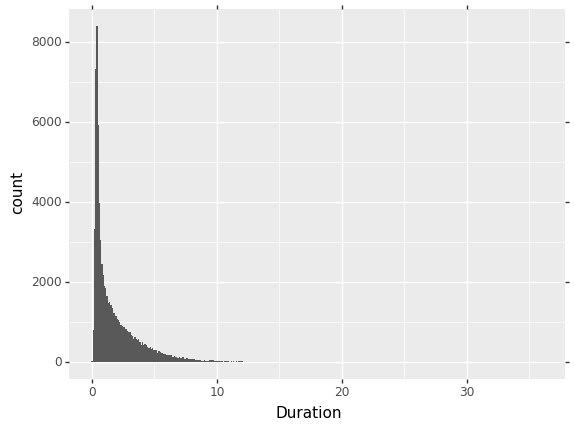

<ggplot: (8781475537145)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 195'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 44 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/pytho

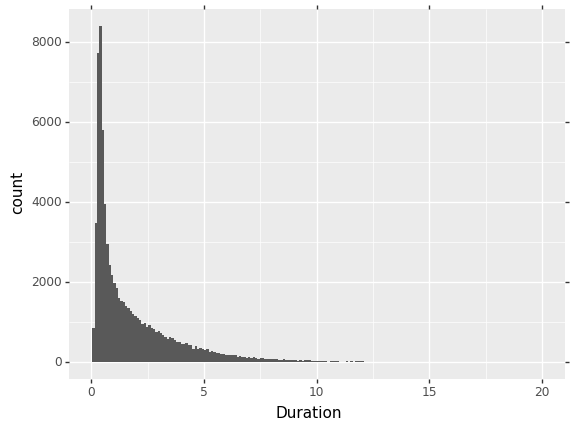

<ggplot: (8781241938725)>

In [365]:
ggplot(durations_df, aes(x="Duration")) + geom_histogram()
# ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
nxt_swbd_durations_plot = ggplot(durations_df, aes(x="Duration")) + geom_histogram() + xlim(0.0, 20.0)
nxt_swbd_durations_plot

In [366]:
lengths_df.sort_values(by='Length', ascending=False)

,Length
22456,123
20418,119
22459,117
43006,116
10753,113
...,...
5400,1
13969,1
30750,1
53150,1


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 290'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


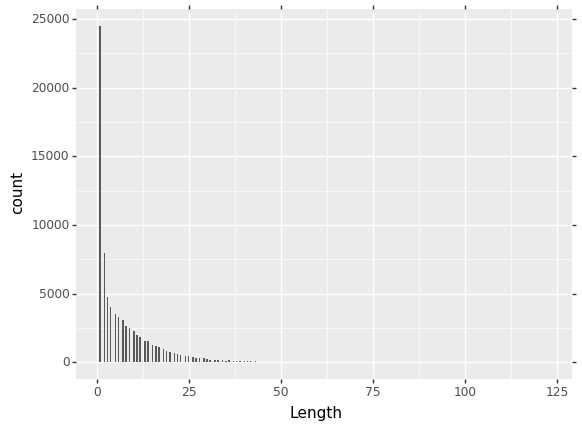

<ggplot: (8781242374997)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 140'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:360: UserWarning: stat_bin : Removed 115 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/pyth

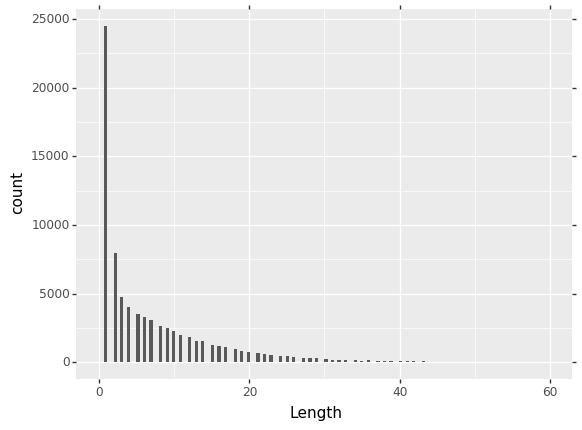

<ggplot: (8781251282777)>

In [367]:
ggplot(lengths_df, aes(x="Length")) + geom_histogram()
# ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
nxt_swbd_length_plot = ggplot(lengths_df, aes(x="Length")) + geom_histogram() + xlim(0.0, 60.0)
nxt_swbd_length_plot

## Speaker speech rates

We want to know, for each speaker,
 - the speaker's distribution over utterance speech rates
 - the mean and (multiples of) the standard deviation

In [368]:
speaker_ids = tuple(sorted(list(set(lpluck('speaker_id', nxt_swbd_utterance_relation)))))
len(speaker_ids)
speaker_ids[:5]

358

('spkr1000', 'spkr1001', 'spkr1002', 'spkr1004', 'spkr1005')

In [369]:
def get_speaker_utterances(speaker_id):
    return tuple([nur for nur in nxt_swbd_utterance_relation if nur['speaker_id'] == speaker_id])

def get_speech_rates(speaker_id):
    my_utts = get_speaker_utterances(speaker_id)
    return {u['speech_rate'] for u in my_utts}

nur_spkr1000 = get_speaker_utterances('spkr1000')
len(nur_spkr1000)
nur_spkr1000[0]
tuple(get_speech_rates('spkr1000'))[:10]

408

{'conversation_id': '2018',
 'speaker': 'A',
 'sex': 'F',
 'dob': 1954,
 'dialect': 'SOUTH',
 'speaker_id': 'spkr1000',
 'interlocutor_id': 'spkr1044',
 'topic': "WOMEN'S ROLES",
 'turn_id': 't2',
 'id': 't2_0',
 'distance_from_left_edge_of_turn': 0,
 'distance_from_right_edge_of_turn': 0,
 'num_phonwords': 1,
 'num_syllables': 2,
 'start': 1.17125,
 'end': 1.73725,
 'duration': 0.5660000000000001,
 'speech_rate': 3.5335689045936394,
 'orth': 'hello',
 'speech': 'hello',
 'phonword_sequence': [{'conversation_id': '2018',
   'speaker': 'A',
   'type': 'phonword',
   'tag': 'phonword',
   'id': 'ms1A_pw1',
   'start': 1.17125,
   'end': 1.73725,
   'duration': 0.5660000000000001,
   'msstate': 'sw2018A-ms98-a-0001',
   'orth': 'hello',
   'stress': 'np',
   'child_type': 'syllable',
   'missing_syllable_info': False,
   'child_fn': 'sw2018.A.syllables.xml',
   'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2018.A.syllables.xml',
   'chil

(0.9941593140300702,
 1.7933198834342026,
 2.9723202675088345,
 3.8222646918299095,
 3.6052275799909834,
 5.7208237986269985,
 4.8596768314907095,
 4.193290734824285,
 3.3233805011034674,
 4.34016004340164)

In [370]:
speech_rate_dl = [{'speaker_id':si,
                   'speaker_dob':nur['dob'],
                   'speaker_age': 1991 - nur['dob'], #corpus was collected in 1990-1991 (see Calhoun et al 2010, Sec. 3)
                   'speaker_sex':nur['sex'],
                   'speech_rate':nur['speech_rate']}
                   for si in speaker_ids for nur in get_speaker_utterances(si)]
speech_rate_df = pd.DataFrame(speech_rate_dl)
speech_rate_df.info()
speech_rate_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77734 entries, 0 to 77733
Data columns (total 5 columns):
speaker_id     77734 non-null object
speaker_dob    77734 non-null int64
speaker_age    77734 non-null int64
speaker_sex    77734 non-null object
speech_rate    77602 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.0+ MB


,speaker_id,speaker_dob,speaker_age,speaker_sex,speech_rate
0,spkr1000,1954,37,F,3.533569
1,spkr1000,1954,37,F,3.822265
2,spkr1000,1954,37,F,5.720824
3,spkr1000,1954,37,F,3.605228
4,spkr1000,1954,37,F,2.803247


In [371]:
speech_rate_df_grouped = speech_rate_df.groupby(['speaker_id'])
# speech_rate_df_grouped.head()
speech_rate_df_grouped_agged = speech_rate_df_grouped.agg(mean_sr=pd.NamedAgg(column='speech_rate', aggfunc='mean'),
                                                            var_sr=pd.NamedAgg(column='speech_rate', aggfunc='var'),
                                                            std_sr=pd.NamedAgg(column='speech_rate', aggfunc='std'))
# speech_rate_df_grouped_agged.head()
speech_rate_df_grouped_agged = speech_rate_df_grouped_agged.reset_index()
speech_rate_df_grouped_agged['2𝛔'] = 2 * speech_rate_df_grouped_agged['std_sr']
speech_rate_df_grouped_agged['2.5𝛔'] = 2.5 * speech_rate_df_grouped_agged['std_sr']
speech_rate_df_grouped_agged['3𝛔'] = 3 * speech_rate_df_grouped_agged['std_sr']
speech_rate_df_grouped_agged.head()

,speaker_id,mean_sr,var_sr,std_sr,2𝛔,2.5𝛔,3𝛔
0,spkr1000,3.982085,2.094041,1.447080,2.894160,3.617701,4.341241
1,spkr1001,4.252498,1.986719,1.409510,2.819021,3.523776,4.228531
2,spkr1002,4.772581,3.368393,1.835318,3.670636,4.588296,5.505955
3,spkr1004,4.161121,2.230411,1.493456,2.986912,3.733641,4.480369
4,spkr1005,4.345169,2.704988,1.644685,3.289370,4.111712,4.934055


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


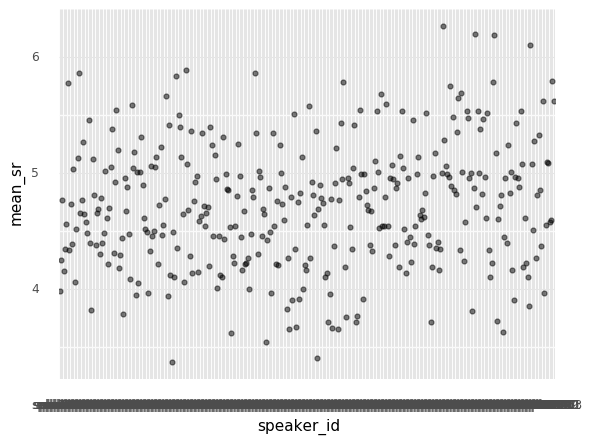

<ggplot: (8781356373637)>

In [372]:
ggplot(speech_rate_df_grouped_agged, aes(x='speaker_id', y='mean_sr')) + geom_point(alpha=0.5) + theme_minimal()

In [373]:
speech_rate_agg_info = speech_rate_df_grouped_agged.to_dict()
set(speech_rate_agg_info.keys())
print(speech_rate_agg_info['speaker_id'])
# speech_rate_agg_info['speaker_id'].values()

{'2.5𝛔', '2𝛔', '3𝛔', 'mean_sr', 'speaker_id', 'std_sr', 'var_sr'}

{0: 'spkr1000', 1: 'spkr1001', 2: 'spkr1002', 3: 'spkr1004', 4: 'spkr1005', 5: 'spkr1008', 6: 'spkr1010', 7: 'spkr1011', 8: 'spkr1013', 9: 'spkr1014', 10: 'spkr1015', 11: 'spkr1016', 12: 'spkr1018', 13: 'spkr1019', 14: 'spkr1021', 15: 'spkr1024', 16: 'spkr1025', 17: 'spkr1026', 18: 'spkr1027', 19: 'spkr1031', 20: 'spkr1033', 21: 'spkr1034', 22: 'spkr1035', 23: 'spkr1038', 24: 'spkr1039', 25: 'spkr1042', 26: 'spkr1044', 27: 'spkr1045', 28: 'spkr1047', 29: 'spkr1050', 30: 'spkr1051', 31: 'spkr1052', 32: 'spkr1053', 33: 'spkr1054', 34: 'spkr1055', 35: 'spkr1056', 36: 'spkr1057', 37: 'spkr1059', 38: 'spkr1061', 39: 'spkr1064', 40: 'spkr1068', 41: 'spkr1069', 42: 'spkr1071', 43: 'spkr1072', 44: 'spkr1073', 45: 'spkr1075', 46: 'spkr1076', 47: 'spkr1078', 48: 'spkr1083', 49: 'spkr1084', 50: 'spkr1085', 51: 'spkr1086', 52: 'spkr1087', 53: 'spkr1089', 54: 'spkr1090', 55: 'spkr1091', 56: 'spkr1092', 57: 'spkr1093', 58: 'spkr1094', 59: 'spkr1095', 60: 'spkr1096', 61: 'spkr1098', 62: 'spkr1100', 6

In [374]:
num_rows = len(speech_rate_agg_info['speaker_id'])
speech_rate_info = [{k:speech_rate_agg_info[k][r]
                     for k in ('speaker_id', 'mean_sr', 'var_sr', 'std_sr', '2𝛔', '2.5𝛔', '3𝛔')}
                    for r in range(num_rows)]
speech_rate_info[0]

{'speaker_id': 'spkr1000',
 'mean_sr': 3.9820851795736516,
 'var_sr': 2.0940412085192737,
 'std_sr': 1.4470802356881507,
 '2𝛔': 2.8941604713763014,
 '2.5𝛔': 3.6177005892203766,
 '3𝛔': 4.341240707064452}

In [375]:
#FIXME export

## Word type duration distributions

We want to know, for each word type,
 - the word's distribution over durations

In [379]:
orth_words = tuple(sorted(list( normalized_orthographic_vocabulary - {'', '<rem>', '<laughter>', '<noise>'} )))
len(orth_words)

12957

In [382]:
def orth_word_to_instances(orth_word):
    return tuple(nwr for nwr in annotated_phonwords if nwr['speech'] == orth_word)

accident_nwrs = orth_word_to_instances('accident')
len(accident_nwrs)
accident_nwrs[0]

def my_nwr_filter(nwr):
    return project(nwr, ('conversation_id', 'speaker',
                         'speech',
                         'transcription',
                         'duration', 'orth', 'stress', 'missing_syllable_info',
                         'POSs', 
                         'syllables', 'phones_length', 'orthography_length',
                         'is_non_speech', 'is_disfluent', 'is_filled_pause', 'has_clitic', 'is_unk', 'is_content_word'))
#     return omit(nwr, ('beg', 'end', 'phones', 'phonemes',
#                       'preceding_wordforms', 'preceding_4_wordforms', 'preceding_3_wordforms', 'preceding_2_wordforms', 'preceding_1_wordforms',
#                       'following_wordforms', 'following_4_wordforms', 'following_3_wordforms', 'following_2_wordforms', 'following_1_wordforms',
#                       'bidirectional_context',
#                       'speaker_interviewer', 'track_name'))
my_nwr_filter(accident_nwrs[0])

21

{'conversation_id': '2109',
 'speaker': 'A',
 'type': 'phonword',
 'tag': 'phonword',
 'id': 'ms46A_pw308',
 'start': 286.11225,
 'end': 286.871125,
 'duration': 0.7588749999999891,
 'msstate': 'sw2109A-ms98-a-0046',
 'orth': 'accident',
 'stress': 'pnn',
 'child_type': 'syllable',
 'missing_syllable_info': False,
 'child_fn': 'sw2109.A.syllables.xml',
 'child_fp': '/mnt/truffle/corpora/switchboard_NXT_annotations/nxt_switchboard_ann/xml/syllables/sw2109.A.syllables.xml',
 'child_id_span': ['ms308A_sy1', 'ms308A_sy3'],
 'child_id_range': ['ms308A_sy1', 'ms308A_sy2', 'ms308A_sy3'],
 'parent_type': 'terminal',
 'parent_ids': ['s106_25'],
 'POSs': ['NN'],
 'isAdj': False,
 'isAdv': False,
 'isV': False,
 'isN': True,
 'syllables': 3,
 'phone_ids': ['ms464A_ph1',
  'ms464A_ph2',
  'ms464A_ph3',
  'ms464A_ph4',
  'ms464A_ph5',
  'ms464A_ph6',
  'ms464A_ph7',
  'ms464A_ph8'],
 'phones': ['ae', 'k', 's', 'ih', 'd', 'eh', 'n', 't'],
 'phone_durations': [0.16999999999995907,
  0.090000000000031

{'conversation_id': '2109',
 'speaker': 'A',
 'speech': 'accident',
 'transcription': 'æ.k.s.ɪ.d.ɛ.n.t',
 'duration': 0.7588749999999891,
 'orth': 'accident',
 'stress': 'pnn',
 'missing_syllable_info': False,
 'POSs': ['NN'],
 'syllables': 3,
 'phones_length': 8,
 'orthography_length': 8,
 'is_non_speech': False,
 'is_disfluent': False,
 'is_filled_pause': False,
 'has_clitic': False,
 'is_unk': False,
 'is_content_word': True}

In [390]:
nwr_filtered = lfilter(lambda nwr: not nwr['is_unk'] and not nwr['is_disfluent'] and not nwr['is_non_speech'], 
                       lmap(my_nwr_filter, annotated_phonwords))
nwr_filtered_df = pd.DataFrame(nwr_filtered)
nwr_filtered_df.info()
nwr_filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790197 entries, 0 to 790196
Data columns (total 18 columns):
conversation_id          790197 non-null object
speaker                  790197 non-null object
speech                   790197 non-null object
transcription            788810 non-null object
duration                 790197 non-null float64
orth                     790197 non-null object
stress                   774071 non-null object
missing_syllable_info    790197 non-null bool
POSs                     790197 non-null object
syllables                788810 non-null float64
phones_length            788810 non-null float64
orthography_length       790197 non-null int64
is_non_speech            790197 non-null bool
is_disfluent             790197 non-null bool
is_filled_pause          790197 non-null bool
has_clitic               790197 non-null bool
is_unk                   790197 non-null bool
is_content_word          790197 non-null bool
dtypes: bool(7), float64(3), int64(1)

,conversation_id,speaker,speech,transcription,duration,orth,stress,missing_syllable_info,POSs,syllables,phones_length,orthography_length,is_non_speech,is_disfluent,is_filled_pause,has_clitic,is_unk,is_content_word
0,2005,A,okay,oʊ.k.eɪ,0.48000,okay,pp,False,[UH],2.0,3.0,4,False,False,False,False,False,False
1,2005,A,uh,ʌ,0.22000,uh,p,False,[UH],1.0,1.0,2,False,False,True,False,False,True
2,2005,A,first,f.ɚ.s.t,0.48500,first,p,False,[RB],1.0,4.0,5,False,False,False,False,False,False
3,2005,A,um,ʌ.m,0.49725,um,p,False,[UH],1.0,2.0,2,False,False,True,False,False,True
4,2005,A,i,aɪ,0.11675,i,p,False,[PRP],1.0,1.0,1,False,False,False,False,False,False


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 1387 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


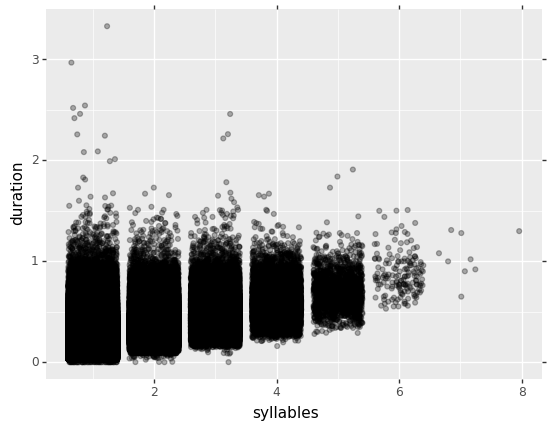

<ggplot: (8781565036869)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 168355 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


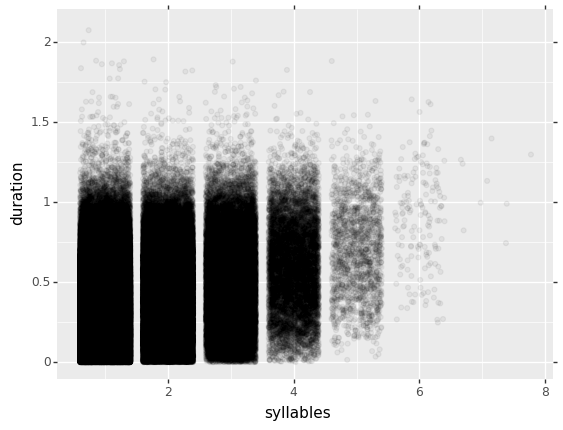

<ggplot: (8781802015665)>

In [392]:
#100s on wittgenstein

# ~60s
ggplot(nwr_filtered_df, aes(x='syllables', y='duration')) + geom_jitter(alpha=0.3, height=None)


ggplot(nwr_filtered_df, aes(x='syllables', y='duration')) + geom_jitter(alpha=0.05, height=None) + ylim(0,2.1)

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


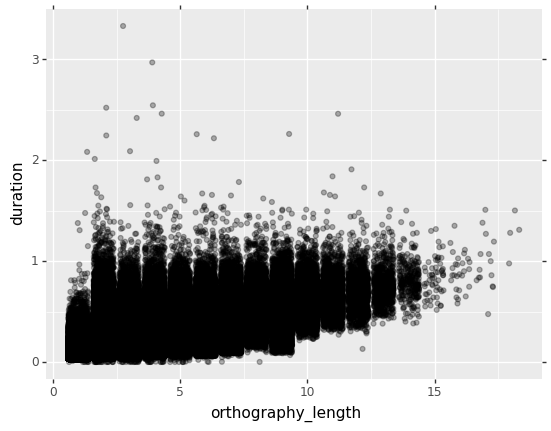

<ggplot: (8781691395541)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


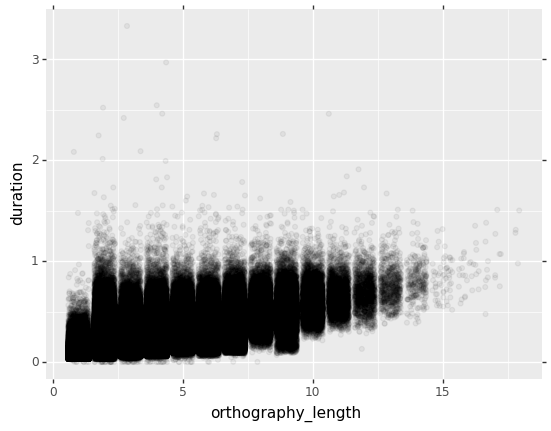

<ggplot: (8781837418961)>

In [393]:
# 110s on wittgenstein
ggplot(nwr_filtered_df, aes(x='orthography_length', y='duration')) + geom_jitter(alpha=0.3, height=None)
ggplot(nwr_filtered_df, aes(x='orthography_length', y='duration')) + geom_jitter(alpha=0.05, height=None)

In [394]:
orthographic_lengths = lpluck('orthography_length', nwr_filtered)
ol_freqs = Counter(orthographic_lengths)
ol_freqs.most_common()

[(4, 189698),
 (3, 165873),
 (2, 150919),
 (5, 84623),
 (6, 63754),
 (1, 50556),
 (7, 37574),
 (8, 19947),
 (9, 13708),
 (10, 7545),
 (11, 3357),
 (12, 1530),
 (13, 729),
 (14, 281),
 (15, 57),
 (16, 27),
 (17, 15),
 (18, 4)]

In [246]:
withAngleBrackets = lfilter(lambda nwr: '<' in nwr['speech'] or '>' in nwr['speech'],
                            nwr_filtered)
set(lpluck('speech', withAngleBrackets))

{'<laughter>', '<noise>', '<rem>'}

In [241]:
hasLengthTen = lambda nwr: nwr['orthography_length'] == 10
hasDurationGT1dot5 = lambda nwr: nwr['duration'] > 1.5
weird_nwrs = lfilter(lambda nwr: hasLengthTen(nwr) and hasDurationGT1dot5(nwr),
                     nwr_filtered)

In [243]:
weird_wfs = set(lpluck('speech', weird_nwrs))
len(weird_wfs)
weird_wfs

2

{'<laughter>', 'situations'}

In [244]:
weird_nwrs[0]

{'conversation_id': '2010',
 'speaker': 'A',
 'duration': 1.755625000000009,
 'orth': '<LAUGHTER>',
 'orthography_length': 10,
 'is_disfluent': False,
 'is_filled_pause': False,
 'has_clitic': False,
 'speech': '<laughter>'}

In [238]:
nwr_filtered_df_olten = nwr_filtered_df.loc[nwr_filtered_df['orthography_length'] == 10]
nwr_filtered_df_olten.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13804 entries, 133 to 813864
Data columns (total 15 columns):
conversation_id          13804 non-null object
speaker                  13804 non-null object
duration                 13804 non-null float64
orth                     13804 non-null object
stress                   6925 non-null object
missing_syllable_info    8021 non-null object
POSs                     8021 non-null object
syllables                8010 non-null float64
phones_length            8010 non-null float64
orthography_length       13804 non-null int64
transcription            8010 non-null object
is_disfluent             13804 non-null bool
is_filled_pause          13804 non-null bool
has_clitic               13804 non-null bool
speech                   13804 non-null object
dtypes: bool(3), float64(3), int64(1), object(8)
memory usage: 1.4+ MB


In [395]:
nwr_filtered_df_noNaNs = deepcopy(nwr_filtered_df)
nwr_filtered_df_noNaNs = nwr_filtered_df_noNaNs.dropna()

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/hom

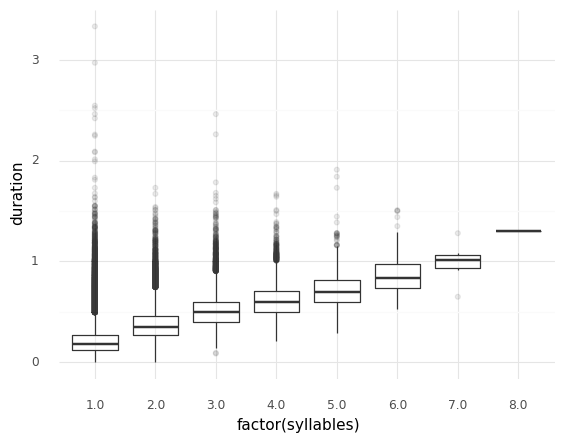

<ggplot: (8781352404661)>

/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/stats/stat.py:310: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  stats = pd.concat(stats, axis=0, ignore_index=True)
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:69: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/hom

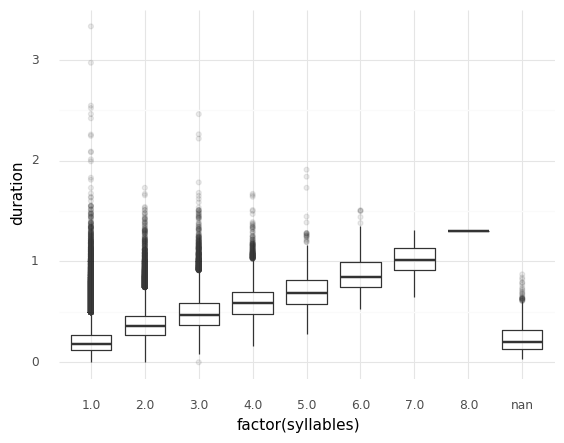

<ggplot: (8781321614453)>

In [396]:
ggplot(nwr_filtered_df_noNaNs, aes(x='factor(syllables)', y='duration')) + geom_boxplot(alpha=0.3, outlier_alpha=0.1, na_rm=True) + theme_minimal()

ggplot(nwr_filtered_df, aes(x='factor(syllables)', y='duration')) + geom_boxplot(alpha=0.3, outlier_alpha=0.1) + theme_minimal()

# plot4 <- ggplot(cal1020, aes(x=sex, fill=sex, color=sex, y=speed.mph))+
#   geom_boxplot(alpha=0.5, outlier.alpha = 0.1)+
#   scale_y_continuous('Speed (mph)', breaks = seq(0, 15, by=1))+
#   ggtitle('Boxplot')+
#   theme_minimal()+
#   theme(legend.position = 'none')

In [397]:
nwr_filtered_df_groupped = nwr_filtered_df.groupby(['speech'])
nwr_filtered_df_groupped_agged = nwr_filtered_df_groupped.agg(mean_dur=pd.NamedAgg(column='duration', aggfunc='mean'),
                                                              var_dur=pd.NamedAgg(column='duration', aggfunc='var'),
                                                              std_dur=pd.NamedAgg(column='duration', aggfunc='std'))
nwr_filtered_df_groupped_agged = nwr_filtered_df_groupped_agged.reset_index()
nwr_filtered_df_groupped_agged['2𝛔'] = 2 * nwr_filtered_df_groupped_agged['std_dur']
nwr_filtered_df_groupped_agged['2.5𝛔'] = 2.5 * nwr_filtered_df_groupped_agged['std_dur']
nwr_filtered_df_groupped_agged['3𝛔'] = 3 * nwr_filtered_df_groupped_agged['std_dur']
nwr_filtered_df_groupped_agged.head()
nwr_filtered_df_groupped_agged.tail()

,speech,mean_dur,var_dur,std_dur,2𝛔,2.5𝛔,3𝛔
0,007,0.655500,NaN,NaN,NaN,NaN,NaN
1,1,0.502500,NaN,NaN,NaN,NaN,NaN
2,101,0.790000,NaN,NaN,NaN,NaN,NaN
3,128,0.821875,NaN,NaN,NaN,NaN,NaN
4,2,0.386625,NaN,NaN,NaN,NaN,NaN


,speech,mean_dur,var_dur,std_dur,2𝛔,2.5𝛔,3𝛔
15812,zones,0.478250,NaN,NaN,NaN,NaN,NaN
15813,zoo,0.300000,0.020850,0.144395,0.288791,0.360988,0.433186
15814,zooming,0.320875,0.000002,0.001237,0.002475,0.003094,0.003712
15815,zoos,0.560000,NaN,NaN,NaN,NaN,NaN
15816,zucchini,0.523025,0.021345,0.146098,0.292197,0.365246,0.438295


/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/AD/emeinhar/anaconda3/envs/jax-gpu2/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


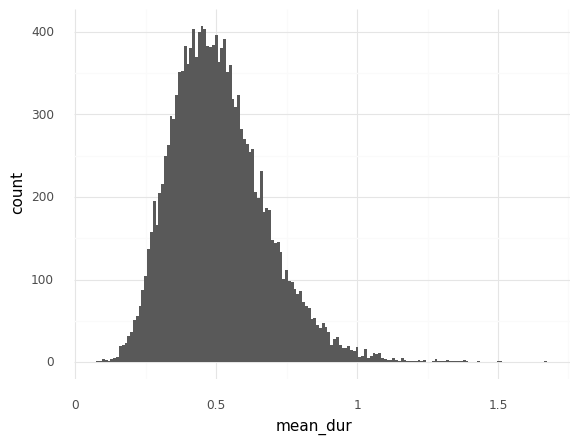

<ggplot: (8781344100337)>

In [398]:
ggplot(nwr_filtered_df_groupped_agged, aes(x='mean_dur')) + geom_histogram(binwidth=0.01) + theme_minimal()

In [399]:
nwr_filtered_df_agg_info = nwr_filtered_df_groupped_agged.to_dict()
set(nwr_filtered_df_agg_info.keys())
len(nwr_filtered_df_agg_info['speech'])

{'2.5𝛔', '2𝛔', '3𝛔', 'mean_dur', 'speech', 'std_dur', 'var_dur'}

15817

In [400]:
num_rows = len(nwr_filtered_df_agg_info['speech'])
nwr_filtered_agg_info = [{k:nwr_filtered_df_agg_info[k][r]
                          for k in ('speech', 'mean_dur', 'var_dur', 'std_dur', '2𝛔', '2.5𝛔', '3𝛔')}
                         for r in range(num_rows)]
nwr_filtered_agg_info[55]

{'speech': 'abrupt',
 'mean_dur': 0.6708749999999952,
 'var_dur': nan,
 'std_dur': nan,
 '2𝛔': nan,
 '2.5𝛔': nan,
 '3𝛔': nan}

In [ ]:
#FIXME export nwr_filtered_agg_info

## Add extreme speech rate annotation to utterance relations and extreme word duration annotation to word relations

# Adding utterance(-context) information and exclusion criteria information to the word relation

## n-gram contexts

## Exclusion criteria

# Exporting to file...